## Package Import


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

## DATA preprocessing
-Name for dataframe
1.   data_classification (Marco data)
2.   return_fund (monthly return)
3.   return_index (monthly return index)
4.   LargeCapFund (list of largeCapFund)






In [ ]:
# File path
file_path = '/content/drive/MyDrive/AFP project/Fund Universe.xlsx'

# Tab name
tab_name = 'Large Cap Fund List'

# Read the Excel file
LargeCapFund= pd.read_excel(file_path, sheet_name=tab_name,header=0)

LargeCapFund

Ticker\n                        Name\n Fund Geographical Focus\n  \
0   ALBAX US Equity       ALGER GROWTH & INCOME-A             United States   
1   ANCFX US Equity      AMER FND FNDMNTL INVST-A             United States   
2   BLPIX US Equity              BULL PROFUND-INV             United States   
3   DFELX US Equity  DFA ENHANCED US LRG CO PORTF             United States   
4   DFUSX US Equity     DFA US LARGE COMPANY PORT             United States   
..              ...                           ...                       ...   
86  VOLMX US Equity               VOLUMETRIC FUND             United States   
87  VQNPX US Equity  VANGUARD GROWTH & INCOME-INV             United States   
88  WFILX US Equity        ALLSPRING INDEX FUND-A             United States   
89  WFSPX US Equity       ISHARES S&P 500 INDEX-K             United States   
90  WTRCX US Equity        DELAWARE IVY CORE EQ-C             United States   

   FUND_INCEPT_DT FUND_BENCHMARK_PRIM  TRACKING_ERROR  FUND_TURNOVER  \
0      1996-12-31                 SPX        2.822650          29.27   
1      1978-08-01                 SPX        3.341730          26.00   
2      1997-12-01                 SPX        0.082809          26.00   
3      1996-07-02                 SPX        1.235090         109.00   
4      1999-09-23                 SPX        0.116449           3.00   
..            ...                 ...             ...            ...   
86     1979-01-01                 SPX        5.403030          34.00   
87     1986-12-10                 SPX        1.230990          62.00   
88     1998-11-04                 SPX        0.081530           3.00   
89     1992-12-09                 SPX        0.907515           5.00   
90     1992-09-21                 SPX        2.913780          66.00   

    STANDARD_DEVIATION_5YR  FUND_PCT_TOP_TEN_HOLD  
0                    17.85               40.93201  
1                    18.51               27.87486  
2                    18.96               20.85131  
3                    20.01               32.15413  
4                    18.97               30.47622  
..                     ...                    ...  
86                   15.36               44.22486  
87                   19.06               28.99003  
88                   18.99               30.69889  
89                   18.95               30.31047  
90                   19.07               40.58768  

[91 rows x 9 columns]

**Monthly return index**

In [ ]:
# File path
file_path = '/content/drive/MyDrive/AFP project/Fund Universe.xlsx'

# Tab name
tab_name = 'Monthly Total Return Index'

# Read the Excel file
return_index= pd.read_excel(file_path, sheet_name=tab_name,header=4)

#clean data
return_index = return_index.rename(columns={'Unnamed: 0': 'Date'})
return_index['Date']=pd.to_datetime(return_index['Date']).dt.to_period('M')
return_index = return_index.set_index('Date')

return_index

SPX Index  ALBAX US Equity  ANCFX US Equity  BLPIX US Equity  \
Date                                                                    
2002-12   879.8200        15.520000        22.230000            13.32   
2003-01   856.7710        15.280000        21.380000            12.95   
2003-02   843.9159        15.350000        20.909474            12.73   
2003-03   852.1016        15.530000        20.929570            12.85   
2003-04   922.2735        16.370000        22.828604            13.87   
...            ...              ...              ...              ...   
2023-05  6246.4479        98.190078       161.955389            64.80   
2023-06  6659.1745       103.366583       172.038536            68.97   
2023-07  6873.1005       106.687043       178.380269            71.10   
2023-08  6763.6692       105.147871       175.310870            69.87   
2023-09  6441.1879       100.723465       167.228940            66.46   

         DFELX US Equity  DFUSX US Equity  DLQAX US Equity  DREVX US Equity  \
Date                                                                          
2002-12             6.96             6.88            10.31             7.72   
2003-01             6.78             6.70            10.09             7.50   
2003-02             6.69             6.60             9.97             7.35   
2003-03             6.75             6.66            10.07             7.39   
2003-04             7.31             7.21            10.66             8.03   
...                  ...              ...              ...              ...   
2023-05            46.19            48.65            50.47            50.20   
2023-06            49.10            51.85            53.50            53.58   
2023-07            50.81            53.51            55.03            55.37   
2023-08            49.93            52.68            54.45            55.40   
2023-09            47.41            50.17            51.77            53.01   

         DRIPX US Equity  DRTHX US Equity  ...  ULPIX US Equity  \
Date                                       ...                    
2002-12             8.59             6.30  ...            10.21   
2003-01             8.22             6.13  ...             9.59   
2003-02             8.09             6.09  ...             9.26   
2003-03             8.18             6.14  ...             9.35   
2003-04             8.78             6.56  ...            10.87   
...                  ...              ...  ...              ...   
2023-05            45.19            36.20  ...           109.78   
2023-06            48.27            38.18  ...           123.81   
2023-07            49.89            39.01  ...           131.04   
2023-08            48.29            38.65  ...           125.89   
2023-09            45.98            36.69  ...           113.41   

         USSPX US Equity  VADAX US Equity  VFINX US Equity  VINIX US Equity  \
Date                                                                          
2002-12        13.230000            25.91            81.15            80.45   
2003-01        12.870000            25.23            79.02            78.34   
2003-02        12.680000            24.72            77.82            77.16   
2003-03        12.789789            24.82            78.56            77.91   
2003-04        13.843892            26.89            85.05            84.35   
...                  ...              ...              ...              ...   
2023-05        89.764028           188.36           562.56           568.41   
2023-06        95.643044           202.82           599.66           605.95   
2023-07        98.838433           209.75           618.86           625.39   
2023-08        97.223920           203.06           608.95           615.44   
2023-09        92.682376           192.65           579.85           586.08   

         VOLMX US Equity  VQNPX US Equity  WFILX US Equity  WFSPX US Equity  \
Date                                                

**Monthly total return**

In [ ]:
# File path
file_path = '/content/drive/MyDrive/AFP project/Fund Universe.xlsx'

# Tab name
tab_name = 'Monthly Total Return'

# Read the Excel file
return_fund= pd.read_excel(file_path, sheet_name=tab_name,header=4)

#clean data
return_fund = return_fund.rename(columns={'Unnamed: 0': 'Date'})
return_fund['Date']=pd.to_datetime(return_fund['Date']).dt.to_period('M')
return_fund = return_fund.set_index('Date')

return_fund

SPX Index  ALBAX US Equity  ANCFX US Equity  BLPIX US Equity  \
Date                                                                    
2002-12        NaN              NaN              NaN              NaN   
2003-01  -0.026197        -0.015464        -0.038237        -0.027778   
2003-02  -0.015004         0.004581        -0.022008        -0.016988   
2003-03   0.009700         0.011726         0.000961         0.009427   
2003-04   0.082352         0.054089         0.090734         0.079377   
...            ...              ...              ...              ...   
2023-05   0.004349         0.003876        -0.002470         0.002630   
2023-06   0.066074         0.052719         0.062259         0.064352   
2023-07   0.032125         0.032123         0.036862         0.030883   
2023-08  -0.015922        -0.014427        -0.017207        -0.017300   
2023-09  -0.047678        -0.042078        -0.046101        -0.048805   

         DFELX US Equity  DFUSX US Equity  DLQAX US Equity  DREVX US Equity  \
Date                                                                          
2002-12              NaN              NaN              NaN              NaN   
2003-01        -0.025862        -0.026163        -0.021339        -0.028497   
2003-02        -0.013274        -0.014925        -0.011893        -0.020000   
2003-03         0.008969         0.009091         0.010030         0.005442   
2003-04         0.082963         0.082583         0.058590         0.086604   
...                  ...              ...              ...              ...   
2023-05         0.001735         0.004335        -0.011168         0.016606   
2023-06         0.063001         0.065776         0.060036         0.067331   
2023-07         0.034827         0.032015         0.028598         0.033408   
2023-08        -0.017319        -0.015511        -0.010540         0.000542   
2023-09        -0.050471        -0.047646        -0.049219        -0.043141   

         DRIPX US Equity  DRTHX US Equity  ...  ULPIX US Equity  \
Date                                       ...                    
2002-12              NaN              NaN  ...              NaN   
2003-01        -0.043073        -0.026984  ...        -0.060725   
2003-02        -0.015815        -0.006525  ...        -0.034411   
2003-03         0.011125         0.008210  ...         0.009719   
2003-04         0.073350         0.068404  ...         0.162567   
...                  ...              ...  ...              ...   
2023-05        -0.052819         0.014290  ...         0.000729   
2023-06         0.068157         0.054696  ...         0.127801   
2023-07         0.033561         0.021739  ...         0.058396   
2023-08        -0.032071        -0.009228  ...        -0.039301   
2023-09        -0.047836        -0.050712  ...        -0.099134   

         USSPX US Equity  VADAX US Equity  VFINX US Equity  VINIX US Equity  \
Date                                                                          
2002-12              NaN              NaN              NaN              NaN   
2003-01        -0.027211        -0.026245        -0.026248        -0.026227   
2003-02        -0.014763        -0.020214        -0.015186        -0.015063   
2003-03         0.008658         0.004045         0.009509         0.009720   
2003-04         0.082418         0.083400         0.082612         0.082659   
...                  ...              ...              ...              ...   
2023-05         0.006958        -0.038293         0.004213         0.004329   
2023-06         0.065494         0.076768         0.065949         0.066044   
2023-07         0.033410         0.034168         0.032018         0.032082   
2023-08        -0.016335        -0.031895        -0.016013        -0.015910   
2023-09        -0.046712        -0.051266        -0.047787        -0.047706   

         VOLMX US Equity  VQNPX US Equity  WFILX US Equity  WFSPX US Equity  \
Date                                                

Plot SPX Index and all other funds

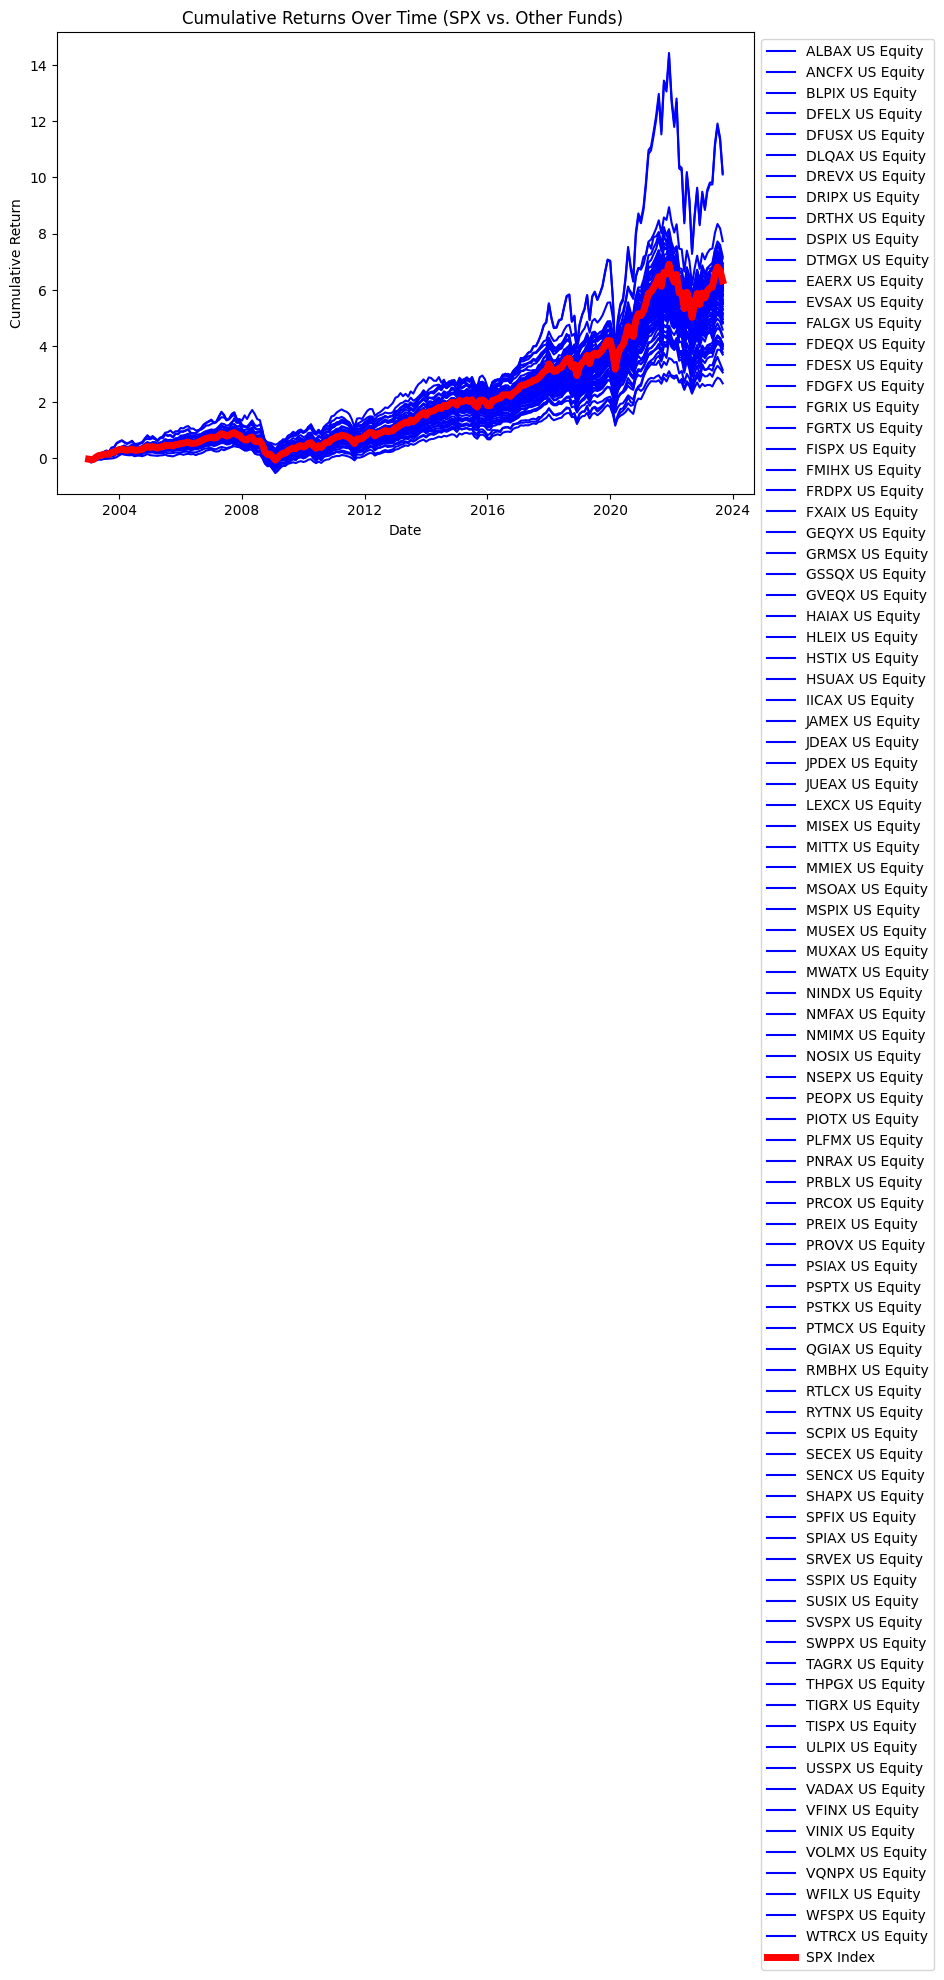

In [ ]:
df_cumulative_returns = (1 + return_fund).cumprod() - 1

df_ret =  df_cumulative_returns # Replace with your actual DataFrame

# Assuming df_ret is your DataFrame with cumulative returns
df_ret.index = df_ret.index.to_timestamp()

fund_color = 'blue'
spx_color = 'red'

plt.figure(figsize=(9, 6))
for column in df_ret.columns:
    if column != 'SPX Index':
        plt.plot(df_ret.index, df_ret[column], label=column, color=fund_color)

# Plot the SPX Index line last to make it more obvious
plt.plot(df_ret.index, df_ret['SPX Index'], label='SPX Index', color=spx_color, linewidth=5)

plt.title('Cumulative Returns Over Time (SPX vs. Other Funds) ')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure to a file
plt.savefig('cumulative_ret.png')

# Show the plot
plt.show()

# Download the file to your local machine
#files.download('cumulative_ret.png')


**Marco Data for classification**

In [ ]:
# File path
file_path = '/content/drive/MyDrive/AFP project/2023 09 30 Macro Data - VALUES.xlsx'

# Tab name
tab_name = 'Data for Classification'

# Read the Excel file
data_classification = pd.read_excel(file_path, sheet_name=tab_name,header=10)

#clean data
data_classification = data_classification.rename(columns={'Unnamed: 0': 'Date'})
data_classification=data_classification.dropna()
data_classification['Date']=pd.to_datetime(data_classification['Date']).dt.to_period('M')
data_classification = data_classification.set_index('Date')
# Inverting binary values in specified columns
columns_to_invert = ['Oil (Above Average)', 'Commodities (Growing)', 'Trade Volume (Growing)']
data_classification.loc[:, columns_to_invert] = 1 - data_classification[columns_to_invert]

data_classification

Rates (Rising)  Dollar (Strengthening)  GDP (Growing)  \
Date                                                             
1999-12             1.0                     1.0            0.0   
2000-01             1.0                     1.0            0.0   
2000-02             1.0                     1.0            0.0   
2000-03             1.0                     1.0            0.0   
2000-04             1.0                     1.0            0.0   
...                 ...                     ...            ...   
2023-05             1.0                     0.0            1.0   
2023-06             1.0                     0.0            1.0   
2023-07             1.0                     0.0            1.0   
2023-08             1.0                     0.0            1.0   
2023-09             1.0                     1.0            1.0   

         GDP (Positive)  CPI (Increasing)  Earnings (Above to LTA)  \
Date                                                                 
1999-12             1.0               1.0                      1.0   
2000-01             1.0               1.0                      1.0   
2000-02             1.0               1.0                      1.0   
2000-03             1.0               1.0                      1.0   
2000-04             1.0               1.0                      1.0   
...                 ...               ...                      ...   
2023-05             1.0               0.0                      0.0   
2023-06             1.0               0.0                      0.0   
2023-07             1.0               0.0                      0.0   
2023-08             1.0               0.0                      0.0   
2023-09             1.0               0.0                      0.0   

         Earnings (Growing)  Earnings (Positive)  Oil (Above Average)  \
Date                                                                    
1999-12                 1.0                  1.0                  0.0   
2000-01                 1.0                  1.0                  0.0   
2000-02                 1.0                  1.0                  0.0   
2000-03                 0.0                  1.0                  0.0   
2000-04                 0.0                  0.0                  0.0   
...                     ...                  ...                  ...   
2023-05                 0.0                  0.0                  0.0   
2023-06                 1.0                  1.0                  0.0   
2023-07                 0.0                  0.0                  1.0   
2023-08                 0.0                  0.0                  1.0   
2023-09                 1.0                  1.0                  1.0   

         Commodities (Growing)  Wages (Growing)  Strong Pricing Power  \
Date                                                                    
1999-12                    0.0              1.0                   0.0   
2000-01                    0.0              1.0                   1.0   
2000-02                    0.0              1.0                   0.0   
2000-03                    0.0              1.0                   0.0   
2000-04                    0.0              1.0                   0.0   
...                        ...              ...                   ...   
2023-05                    1.0              0.0                   1.0   
2023-06                    1.0              0.0                   1.0   
2023-07                    1.0              0.0                   1.0   
2023-08                    1.0              0.0                   1.0   
2023-09                    1.0              0.0                   1.0   

         Trade Volume (Growing)  Fed Balance Sheet (Expanding)  \
Date                                                             
1999-12                     1.0                            0.0   
2000-01                     1.0                            0.0   
2000-02                     1.0                            0.0   
2000-03  

Return Binary Data

In [ ]:
return_fund_binary = (return_fund.iloc[:, 1:] > 0).astype(int)
return_fund_binary

ALBAX US Equity  ANCFX US Equity  BLPIX US Equity  DFELX US Equity  \
Date                                                                          
2002-12                0                0                0                0   
2003-01                0                0                0                0   
2003-02                1                0                0                0   
2003-03                1                1                1                1   
2003-04                1                1                1                1   
...                  ...              ...              ...              ...   
2023-05                1                0                1                1   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                0                0                0                0   
2023-09                0                0                0                0   

         DFUSX US Equity  DLQAX US Equity  DREVX US Equity  DRIPX US Equity  \
Date                                                                          
2002-12                0                0                0                0   
2003-01                0                0                0                0   
2003-02                0                0                0                0   
2003-03                1                1                1                1   
2003-04                1                1                1                1   
...                  ...              ...              ...              ...   
2023-05                1                0                1                0   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                0                0                1                0   
2023-09                0                0                0                0   

         DRTHX US Equity  DSPIX US Equity  ...  ULPIX US Equity  \
Date                                       ...                    
2002-12                0                0  ...                0   
2003-01                0                0  ...                0   
2003-02                0                0  ...                0   
2003-03                1                1  ...                1   
2003-04                1                1  ...                1   
...                  ...              ...  ...              ...   
2023-05                1                1  ...                1   
2023-06                1                1  ...                1   
2023-07                1                1  ...                1   
2023-08                0                0  ...                0   
2023-09                0                0  ...                0   

         USSPX US Equity  VADAX US Equity  VFINX US Equity  VINIX US Equity  \
Date                                                                          
2002-12                0                0                0                0   
2003-01                0                0                0                0   
2003-02                0                0                0                0   
2003-03                1                1                1                1   
2003-04                1                1                1                1   
...                  ...              ...              ...              ...   
2023-05                1                0                1                1   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                0                0                0                0   
2023-09                0                0                0                0   

         VOLMX US Equity  VQNPX US Equity  WFILX US E

Live Macro Data


In [ ]:
# # File path
# file_path = '/content/drive/MyDrive/AFP project/2023 09 30 Macro Data - LIVE.xlsx'

# # Tab name
# tab_name = 'Cycles'

# # Read the Excel file
# macroLive= pd.read_excel(file_path, sheet_name=tab_name,header=10)

# #clean data
# macroLive = macroLive.rename(columns={'Unnamed: 0': 'Date'})
# macroLive=macroLive.dropna()
# macroLive['Dates']=pd.to_datetime(macroLive['Dates']).dt.to_period('M')
# macroLive = macroLive.set_index('Dates')

# macroLive

# Description

In [ ]:
LargeCapFund['TRACKING_ERROR'].describe()

count    91.000000
mean      2.796129
std       3.119352
min       0.038517
25%       0.151374
50%       2.077820
75%       3.866800
max      15.032000
Name: TRACKING_ERROR, dtype: float64

## Summary of monthly return


**Mean, Volatility, Sharp ratio**

In [ ]:
# Calculate mean and standard deviation
mean_returns = return_fund.mean()
std_deviation = return_fund.std()

# Define the risk-free rate
risk_free_rate = 0 # in this case we assume it is zero

# Calculate Sharpe Ratio
sharpe_ratio = (mean_returns - risk_free_rate) / std_deviation

# Create a new DataFrame
fund_performance = pd.DataFrame({
    'Fund Name': return_fund.columns,
    'Mean Return': mean_returns.values,
    'Standard Deviation': std_deviation.values,
    'Sharpe Ratio': sharpe_ratio.values
})

fund_performance

Fund Name  Mean Return  Standard Deviation  Sharpe Ratio
0         SPX Index     0.008933            0.042421      0.210588
1   ALBAX US Equity     0.008206            0.036429      0.225260
2   ANCFX US Equity     0.009092            0.043460      0.209201
3   BLPIX US Equity     0.007380            0.042325      0.174369
4   DFELX US Equity     0.008695            0.043621      0.199329
..              ...          ...                 ...           ...
87  VOLMX US Equity     0.005884            0.035808      0.164312
88  VQNPX US Equity     0.008654            0.042956      0.201469
89  WFILX US Equity     0.008502            0.042425      0.200397
90  WFSPX US Equity     0.008867            0.042388      0.209194
91  WTRCX US Equity     0.007869            0.043248      0.181944

[92 rows x 4 columns]

**correlation:**

In [ ]:
correlation_matrix = return_fund.corr()
correlation_matrix

SPX Index  ALBAX US Equity  ANCFX US Equity  BLPIX US Equity  \
SPX Index         1.000000         0.957541         0.973884         0.999734   
ALBAX US Equity   0.957541         1.000000         0.942364         0.957730   
ANCFX US Equity   0.973884         0.942364         1.000000         0.973507   
BLPIX US Equity   0.999734         0.957730         0.973507         1.000000   
DFELX US Equity   0.998354         0.959027         0.972976         0.998151   
...                    ...              ...              ...              ...   
VOLMX US Equity   0.951020         0.922032         0.948229         0.951921   
VQNPX US Equity   0.995046         0.954202         0.970909         0.994838   
WFILX US Equity   0.999982         0.957798         0.973819         0.999760   
WFSPX US Equity   0.999992         0.957560         0.973825         0.999704   
WTRCX US Equity   0.968166         0.931105         0.962729         0.968761   

                 DFELX US Equity  DFUSX US Equity  DLQAX US Equity  \
SPX Index               0.998354         0.999933         0.981261   
ALBAX US Equity         0.959027         0.957851         0.943211   
ANCFX US Equity         0.972976         0.974061         0.965978   
BLPIX US Equity         0.998151         0.999675         0.981513   
DFELX US Equity         1.000000         0.998318         0.980243   
...                          ...              ...              ...   
VOLMX US Equity         0.947141         0.950896         0.939275   
VQNPX US Equity         0.992991         0.994957         0.976986   
WFILX US Equity         0.998403         0.999918         0.981285   
WFSPX US Equity         0.998330         0.999926         0.981222   
WTRCX US Equity         0.965433         0.968105         0.965768   

                 DREVX US Equity  DRIPX US Equity  DRTHX US Equity  ...  \
SPX Index               0.984569         0.957390         0.978618  ...   
ALBAX US Equity         0.938384         0.911985         0.947437  ...   
ANCFX US Equity         0.962112         0.932186         0.951004  ...   
BLPIX US Equity         0.984487         0.956848         0.978773  ...   
DFELX US Equity         0.982008         0.954893         0.977624  ...   
...                          ...              ...              ...  ...   
VOLMX US Equity         0.937532         0.930216         0.942364  ...   
VQNPX US Equity         0.979581         0.953561         0.973369  ...   
WFILX US Equity         0.984389         0.957454         0.978660  ...   
WFSPX US Equity         0.984611         0.957222         0.978701  ...   
WTRCX US Equity         0.967847         0.916650         0.951360  ...   

                 ULPIX US Equity  USSPX US Equity  VADAX US Equity  \
SPX Index               0.998671         0.999639         0.963602   
ALBAX US Equity         0.957035         0.956268         0.924490   
ANCFX US Equity         0.973896         0.972532         0.959202   
BLPIX US Equity         0.998559         0.999350         0.962750   
DFELX US Equity         0.997210         0.998024         0.962476   
...                          ...              ...              ...   
VOLMX US Equity         0.953124         0.949043         0.957625   
VQNPX US Equity         0.993913         0.994446         0.963550   
WFILX US Equity         0.998736         0.999614         0.963627   
WFSPX US Equity         0.998641         0.999638         0.963472   
WTRCX US Equity         0.967803         0.967776         0.931391   

                 VFINX US Equity  VINIX US Equity  VOLMX US Equity  \
SPX Index               0.999998         0.999977         0.951020   
ALBAX US Equity         0.957531         0.957423         0.922032   
ANCFX US Equity         0.973898         0.973772         0.948229   
BLPIX US Equity         0.999734         0.999710         0.951921   
DFELX US Equity         0.998358         0.998332         0.947141   
...                          ...         

# Cluster

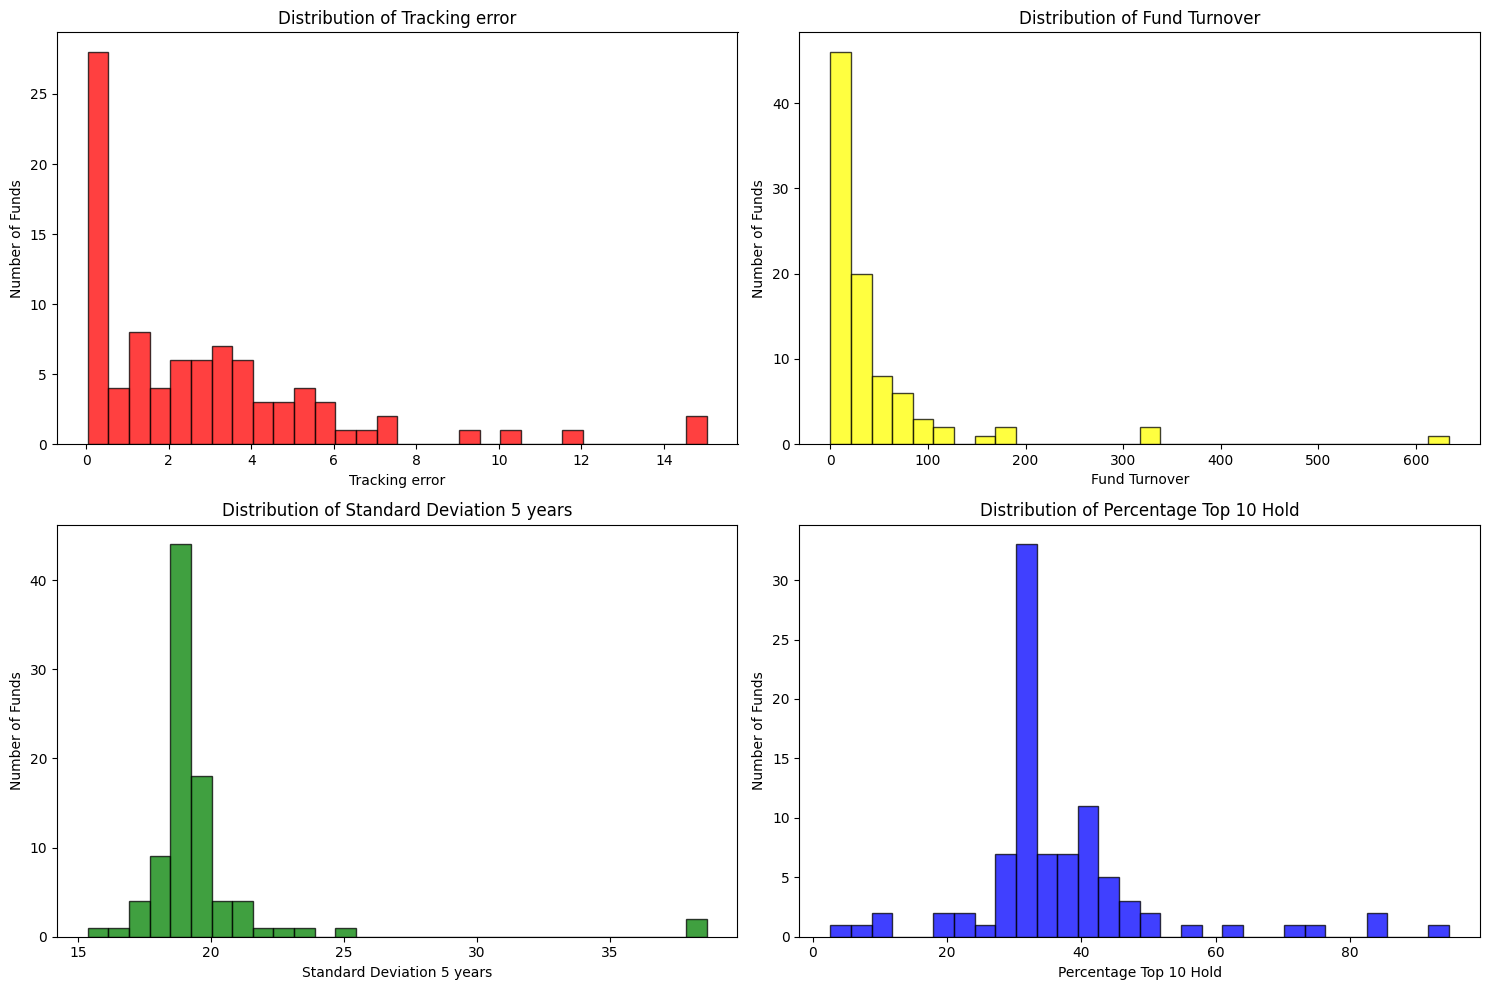

In [ ]:
# Plotting the clusters for each feature
plt.figure(figsize=(15, 10))

# Plot a histogram of the 'TRACKING_ERROR' values
plt.subplot(2, 2, 1)
plt.hist(LargeCapFund['TRACKING_ERROR'], bins=30, alpha=0.75, color='red', edgecolor='black')
plt.title('Distribution of Tracking error')
plt.xlabel('Tracking error')
plt.ylabel('Number of Funds')

# Plot a histogram of the 'FUND_TURNOVER' values
plt.subplot(2, 2, 2)
plt.hist(LargeCapFund['FUND_TURNOVER'], bins=30, alpha=0.75, color='yellow', edgecolor='black')
plt.title('Distribution of Fund Turnover')
plt.xlabel('Fund Turnover')
plt.ylabel('Number of Funds')

# Plot a histogram of the 'STANDARD_DEVIATION_5YR' values
plt.subplot(2, 2, 3)
plt.hist(LargeCapFund['STANDARD_DEVIATION_5YR'], bins=30, alpha=0.75, color='green', edgecolor='black')
plt.title('Distribution of Standard Deviation 5 years')
plt.xlabel('Standard Deviation 5 years')
plt.ylabel('Number of Funds')

# Plot a histogram of the 'FUND_PCT_TOP_TEN_HOLD' values
plt.subplot(2, 2, 4)
plt.hist(LargeCapFund['FUND_PCT_TOP_TEN_HOLD'], bins=30, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Percentage Top 10 Hold')
plt.xlabel('Percentage Top 10 Hold')
plt.ylabel('Number of Funds')

plt.tight_layout()

# # Save the plot to a file
# plt.savefig('distribution_plot.png')

# Show the plot
plt.show()

# from google.colab import files
# # Download the file to your local machine
# files.download('distribution_plot.png')

In [ ]:
LargeCapFund
# required_columns

Ticker\n                        Name\n Fund Geographical Focus\n  \
0   ALBAX US Equity       ALGER GROWTH & INCOME-A             United States   
1   ANCFX US Equity      AMER FND FNDMNTL INVST-A             United States   
2   BLPIX US Equity              BULL PROFUND-INV             United States   
3   DFELX US Equity  DFA ENHANCED US LRG CO PORTF             United States   
4   DFUSX US Equity     DFA US LARGE COMPANY PORT             United States   
..              ...                           ...                       ...   
86  VOLMX US Equity               VOLUMETRIC FUND             United States   
87  VQNPX US Equity  VANGUARD GROWTH & INCOME-INV             United States   
88  WFILX US Equity        ALLSPRING INDEX FUND-A             United States   
89  WFSPX US Equity       ISHARES S&P 500 INDEX-K             United States   
90  WTRCX US Equity        DELAWARE IVY CORE EQ-C             United States   

   FUND_INCEPT_DT FUND_BENCHMARK_PRIM  TRACKING_ERROR  FUND_TURNOVER  \
0      1996-12-31                 SPX        2.822650          29.27   
1      1978-08-01                 SPX        3.341730          26.00   
2      1997-12-01                 SPX        0.082809          26.00   
3      1996-07-02                 SPX        1.235090         109.00   
4      1999-09-23                 SPX        0.116449           3.00   
..            ...                 ...             ...            ...   
86     1979-01-01                 SPX        5.403030          34.00   
87     1986-12-10                 SPX        1.230990          62.00   
88     1998-11-04                 SPX        0.081530           3.00   
89     1992-12-09                 SPX        0.907515           5.00   
90     1992-09-21                 SPX        2.913780          66.00   

    STANDARD_DEVIATION_5YR  FUND_PCT_TOP_TEN_HOLD  
0                    17.85               40.93201  
1                    18.51               27.87486  
2                    18.96               20.85131  
3                    20.01               32.15413  
4                    18.97               30.47622  
..                     ...                    ...  
86                   15.36               44.22486  
87                   19.06               28.99003  
88                   18.99               30.69889  
89                   18.95               30.31047  
90                   19.07               40.58768  

[91 rows x 9 columns]

In [ ]:
# Perform k-means clustering for each feature with k=4
features = ['TRACKING_ERROR', 'FUND_TURNOVER', 'STANDARD_DEVIATION_5YR', 'FUND_PCT_TOP_TEN_HOLD']
cluster_labels = {}

for feature in features:
    kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
    data = LargeCapFund[[feature]].values.reshape(-1, 1)  # Reshaping for k-means
    kmeans.fit(data)
    labels = kmeans.labels_

    # Calculate the mean value for each cluster
    LargeCapFund[feature + '_Cluster'] = labels
    mean_values = LargeCapFund.groupby(feature + '_Cluster')[feature].mean()

    # Sort the clusters based on mean value
    sorted_clusters = mean_values.sort_values().index

    # Create a mapping from old labels to new labels
    new_labels = {old_label: i for i, old_label in enumerate(sorted_clusters)}

    # Apply the mapping to the DataFrame
    LargeCapFund[feature + '_Cluster'] = LargeCapFund[feature + '_Cluster'].map(new_labels)
    cluster_labels[feature] = new_labels

# Create a new DataFrame with the required columns
required_columns = ['Ticker\n', 'Name\n', 'Fund Geographical Focus\n', 'FUND_INCEPT_DT', 'FUND_BENCHMARK_PRIM']
for feature in features:
    required_columns.append(feature + '_Cluster')

Cluster = LargeCapFund[required_columns]

Cluster

Ticker\n                        Name\n Fund Geographical Focus\n  \
0   ALBAX US Equity       ALGER GROWTH & INCOME-A             United States   
1   ANCFX US Equity      AMER FND FNDMNTL INVST-A             United States   
2   BLPIX US Equity              BULL PROFUND-INV             United States   
3   DFELX US Equity  DFA ENHANCED US LRG CO PORTF             United States   
4   DFUSX US Equity     DFA US LARGE COMPANY PORT             United States   
..              ...                           ...                       ...   
86  VOLMX US Equity               VOLUMETRIC FUND             United States   
87  VQNPX US Equity  VANGUARD GROWTH & INCOME-INV             United States   
88  WFILX US Equity        ALLSPRING INDEX FUND-A             United States   
89  WFSPX US Equity       ISHARES S&P 500 INDEX-K             United States   
90  WTRCX US Equity        DELAWARE IVY CORE EQ-C             United States   

   FUND_INCEPT_DT FUND_BENCHMARK_PRIM  TRACKING_ERROR_Cluster  \
0      1996-12-31                 SPX                       1   
1      1978-08-01                 SPX                       1   
2      1997-12-01                 SPX                       0   
3      1996-07-02                 SPX                       0   
4      1999-09-23                 SPX                       0   
..            ...                 ...                     ...   
86     1979-01-01                 SPX                       2   
87     1986-12-10                 SPX                       0   
88     1998-11-04                 SPX                       0   
89     1992-12-09                 SPX                       0   
90     1992-09-21                 SPX                       1   

    FUND_TURNOVER_Cluster  STANDARD_DEVIATION_5YR_Cluster  \
0                       0                               0   
1                       0                               1   
2                       0                               1   
3                       1                               1   
4                       0                               1   
..                    ...                             ...   
86                      0                               0   
87                      1                               1   
88                      0                               1   
89                      0                               1   
90                      1                               1   

    FUND_PCT_TOP_TEN_HOLD_Cluster  
0                               2  
1                               1  
2                               1  
3                               1  
4                               1  
..                            ...  
86                              2  
87                              1  
88                              1  
89                              1  
90                              2  

[91 rows x 9 columns]

In [ ]:
# Calculate distribution and ranges for each feature
cluster_distributions = {}
feature_ranges = {}

for feature in features:
    cluster_label = feature + '_Cluster'

    # Distribution of funds across clusters
    cluster_distribution = LargeCapFund[cluster_label].value_counts().sort_index()
    cluster_distributions[feature] = cluster_distribution

    # Range (min and max) of the feature within each cluster
    feature_range = LargeCapFund.groupby(cluster_label)[feature].agg(['min', 'max']).reset_index()
    feature_ranges[feature] = feature_range


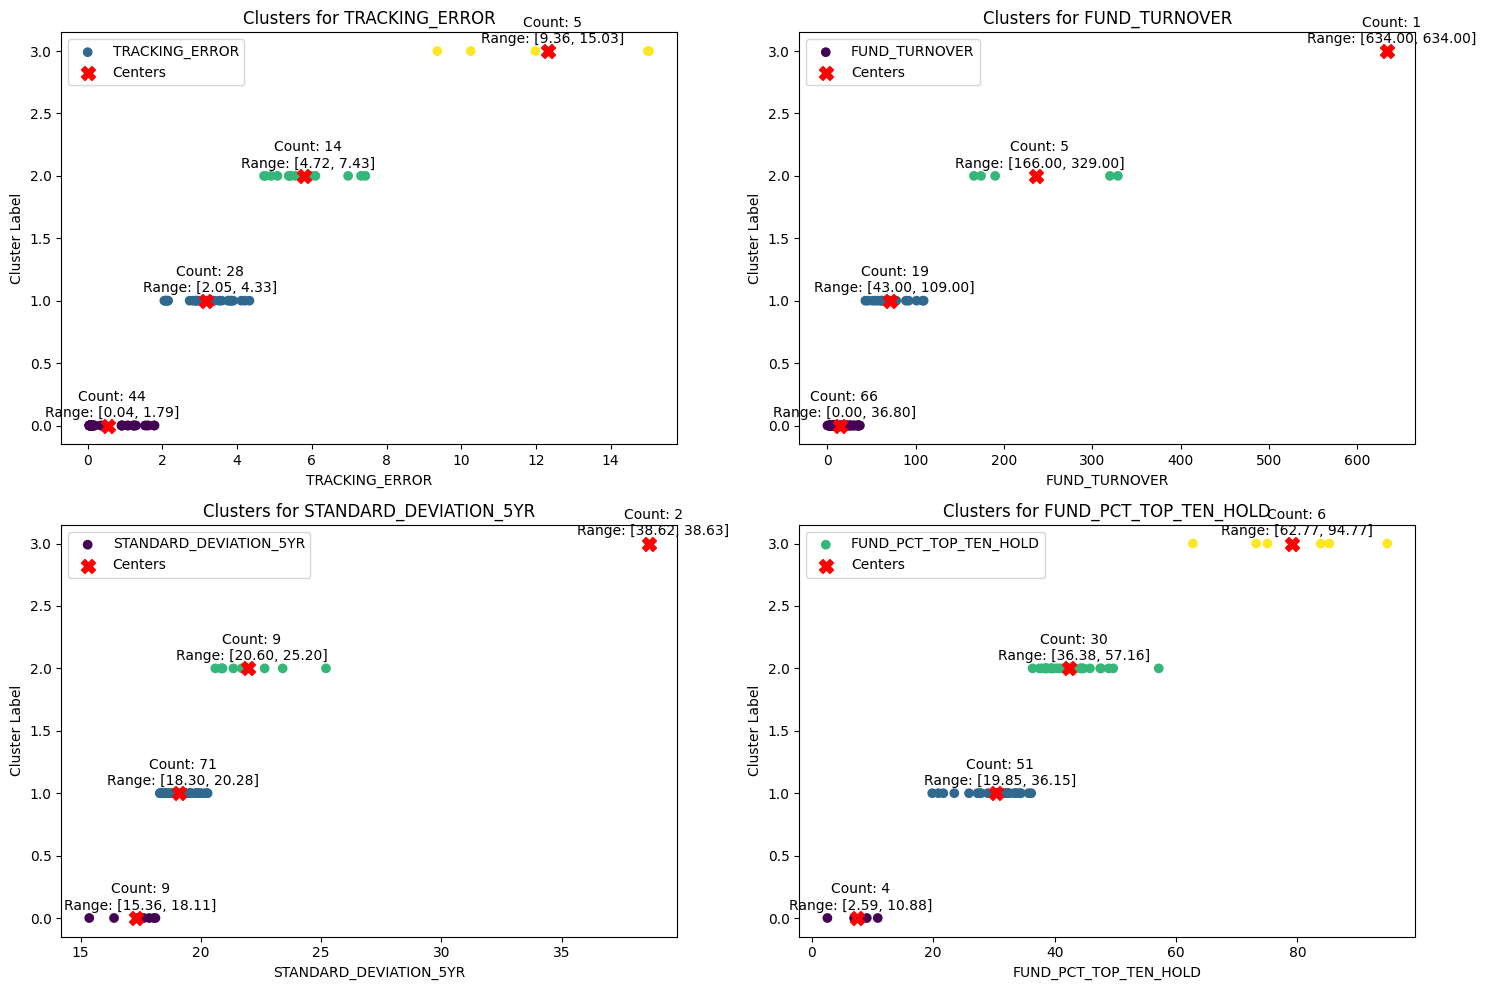

In [ ]:
# Number of rows and columns for the subplot grid
n_rows = 2
n_cols = 2

# Create a figure for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting each feature in a subplot
for i, feature in enumerate(features):
    ax = axes[i]

    # Prepare the data for plotting
    x = LargeCapFund[feature]
    y = LargeCapFund[feature + '_Cluster']
    cluster_centers = LargeCapFund.groupby(feature + '_Cluster')[feature].mean()
    cluster_counts = LargeCapFund[feature + '_Cluster'].value_counts()

    # Calculate range for each cluster
    cluster_ranges = LargeCapFund.groupby(feature + '_Cluster')[feature].agg(['min', 'max'])

    # Create a scatter plot on the subplot
    scatter = ax.scatter(x, y, c=y, cmap='viridis', label=feature)  # Color by cluster label

    # Optionally plot the cluster centers
    ax.scatter(cluster_centers, cluster_centers.index, color='red', marker='X', s=100, label='Centers')

    # Annotate each cluster center with the count of funds and the range
    for cluster_label in cluster_centers.index:
        count = cluster_counts[cluster_label]
        min_val, max_val = cluster_ranges.loc[cluster_label]
        ax.annotate(f'Count: {count}\nRange: [{min_val:.2f}, {max_val:.2f}]',
                    (cluster_centers[cluster_label], cluster_label),
                    textcoords="offset points",
                    xytext=(3,6),
                    ha='center')

    # Labeling the subplot
    ax.set_title(f'Clusters for {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Cluster Label')

    # Add legend to the subplot
    ax.legend()

# Adjust layout
plt.tight_layout()

# # Save the plot to a file
# plt.savefig('cluster_plots.png')

# Show the plot
plt.show()


# from google.colab import files
# # Download the file to your local machine
# files.download('cluster_plots.png')

In [ ]:
feature_ranges

{'TRACKING_ERROR':    TRACKING_ERROR_Cluster       min       max
 0                       0  0.038517   1.78683
 1                       1  2.049700   4.32923
 2                       2  4.719990   7.43221
 3                       3  9.361690  15.03200,
 'FUND_TURNOVER':    FUND_TURNOVER_Cluster    min    max
 0                      0    0.0   36.8
 1                      1   43.0  109.0
 2                      2  166.0  329.0
 3                      3  634.0  634.0,
 'STANDARD_DEVIATION_5YR':    STANDARD_DEVIATION_5YR_Cluster    min    max
 0                               0  15.36  18.11
 1                               1  18.30  20.28
 2                               2  20.60  25.20
 3                               3  38.62  38.63,
 'FUND_PCT_TOP_TEN_HOLD':    FUND_PCT_TOP_TEN_HOLD_Cluster       min       max
 0                              0   2.58724  10.87794
 1                              1  19.85139  36.15410
 2                              2  36.37645  57.15599
 3             

In [ ]:
cluster_distributions

{'TRACKING_ERROR': 0    44
 1    28
 2    14
 3     5
 Name: TRACKING_ERROR_Cluster, dtype: int64,
 'FUND_TURNOVER': 0    66
 1    19
 2     5
 3     1
 Name: FUND_TURNOVER_Cluster, dtype: int64,
 'STANDARD_DEVIATION_5YR': 0     9
 1    71
 2     9
 3     2
 Name: STANDARD_DEVIATION_5YR_Cluster, dtype: int64,
 'FUND_PCT_TOP_TEN_HOLD': 0     4
 1    51
 2    30
 3     6
 Name: FUND_PCT_TOP_TEN_HOLD_Cluster, dtype: int64}

Tracking Error
*   Cluster 0: 44 funds (Min: 0.0385, Max: 1.7868)

*   Cluster 1: 28 funds (Min: 2.0497, Max: 4.3292)

*   Cluster 2: 14 funds (Min: 4.7200, Max: 7.4322)

*   Cluster 3: 5 funds (Min: 9.3617, Max: 15.0320)

Fund Turnover
*   Cluster 0: 66 funds (Min: 0.0, Max: 36.8)

*   Cluster 1: 19 funds (Min: 43.0, Max: 109.0)

*   Cluster 2: 5 funds (Min: 166.0, Max: 329.0)

*   Cluster 3: 1 fund (Min: 634.0, Max: 634.0)

Standard Deviation (5 Years)
*   Cluster 0: 9 funds (Min: 15.36, Max: 18.11)

*   Cluster 1: 71 funds (Min: 18.30, Max: 20.28)

*   Cluster 2: 9 funds (Min: 20.60, Max: 25.20)

*   Cluster 3: 2 funds (Min: 38.62, Max: 38.63)

Percentage of Top 10 Holdings
*   Cluster 0: 4 funds (Min: 2.5872, Max: 10.8779)

*   Cluster 1: 51 funds (Min: 19.8514, Max: 36.1541)

*   Cluster 2: 30 funds (Min: 36.3764, Max: 57.1560)

*   Cluster 3: 6 funds (Min: 62.7750, Max: 94.7706)




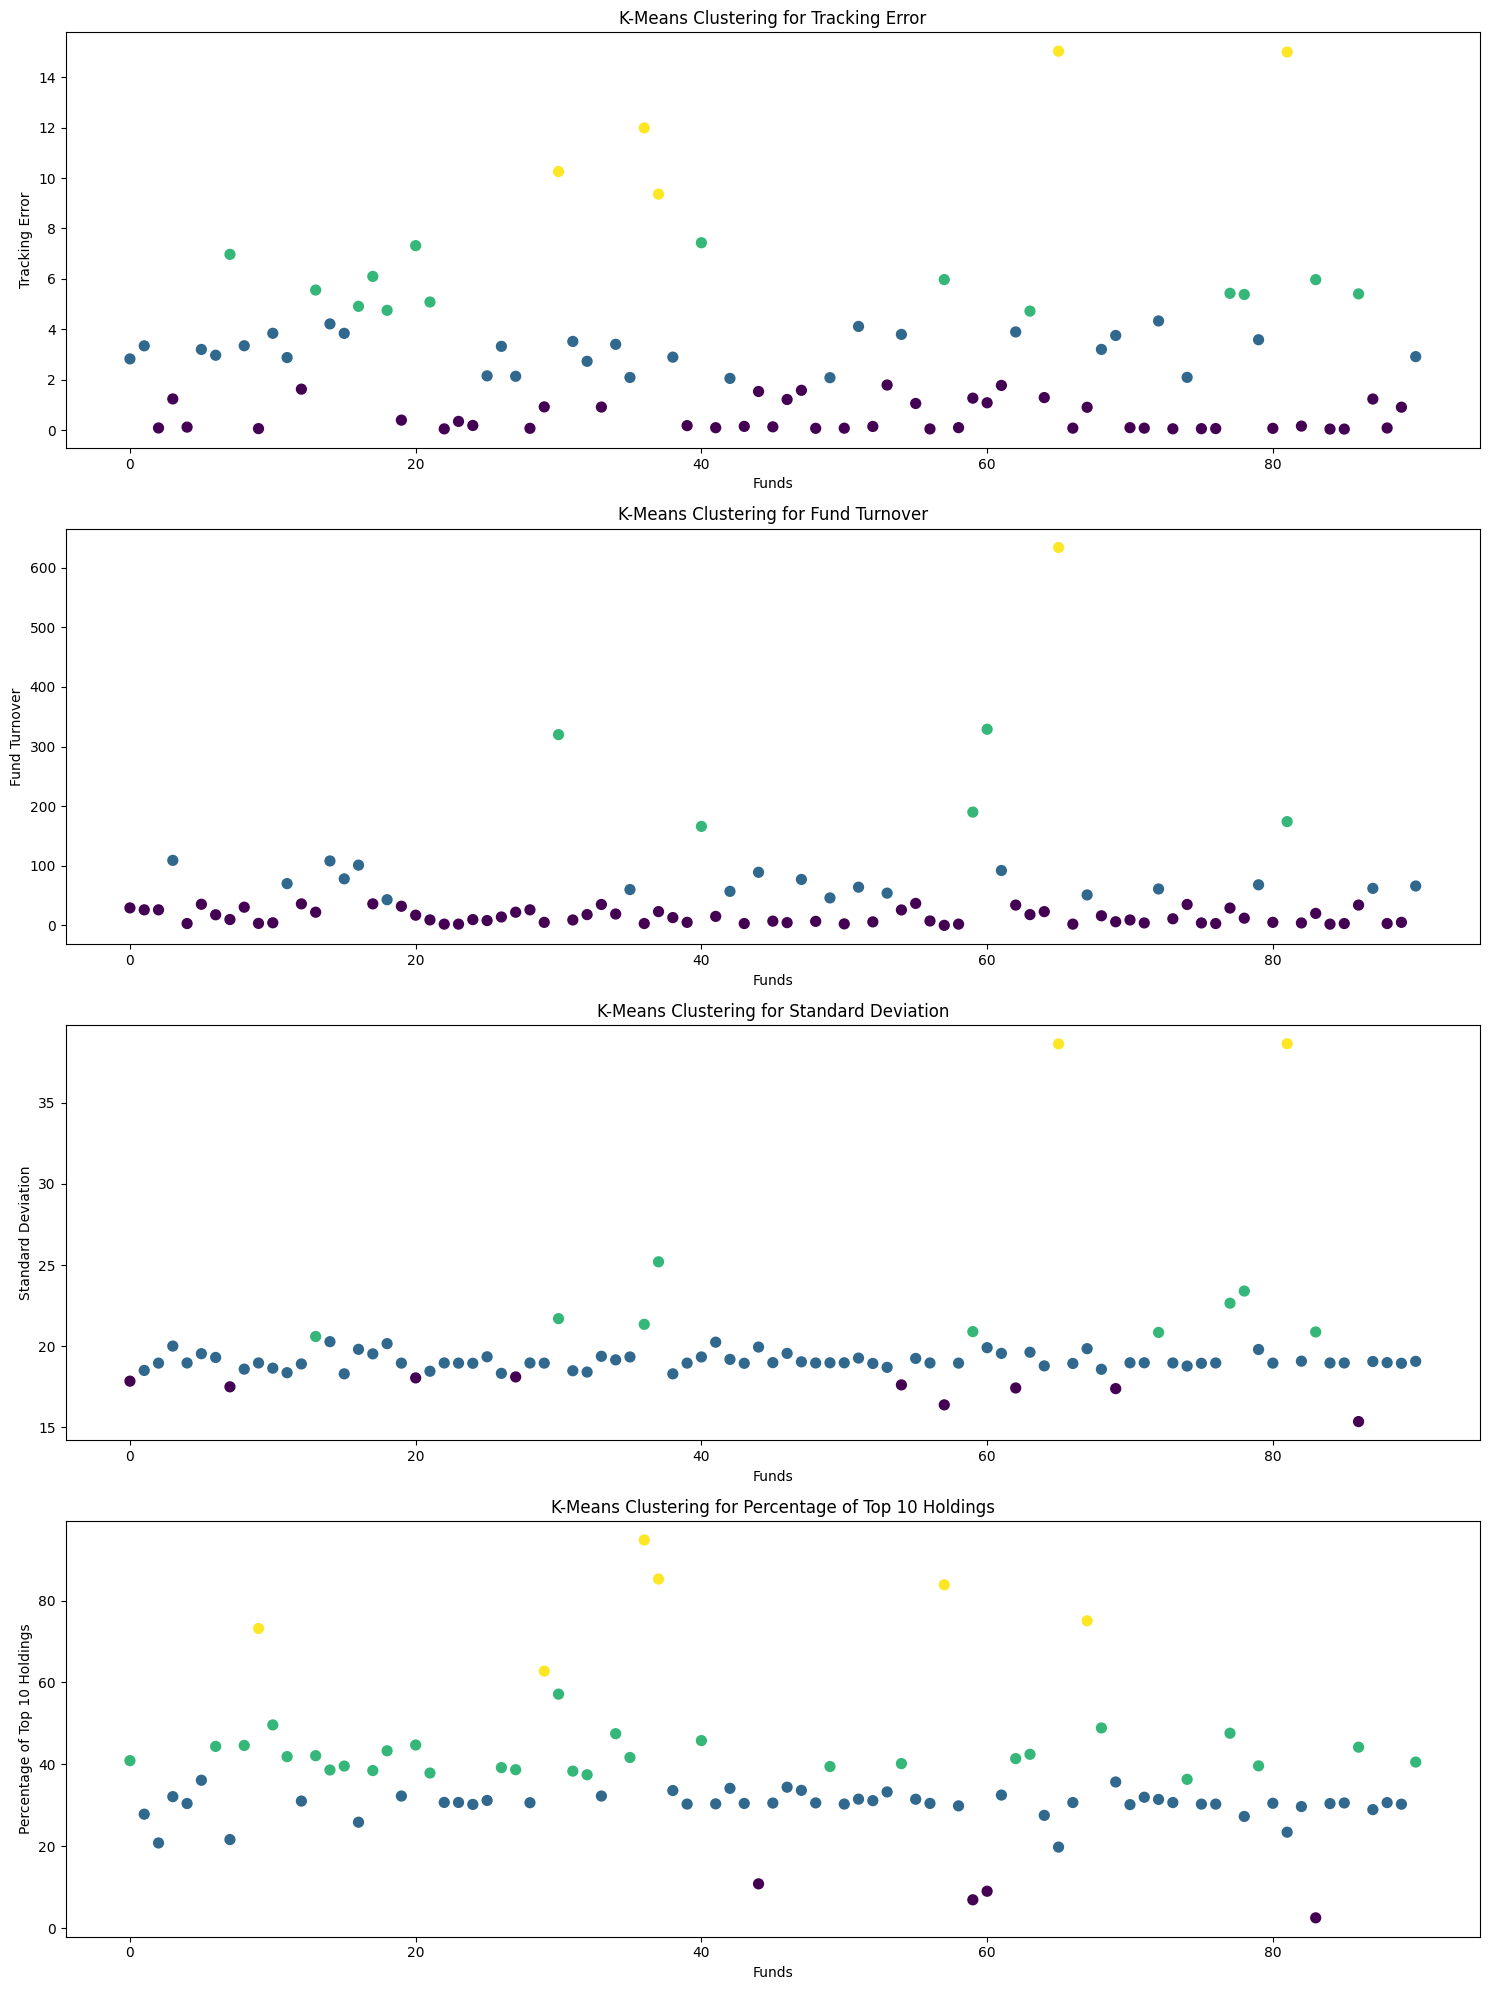

In [ ]:
# Plotting the clusters for each feature

plt.figure(figsize=(15, 20))

# Tracking Error
plt.subplot(4, 1, 1)
plt.scatter(range(len(LargeCapFund['TRACKING_ERROR'])), LargeCapFund['TRACKING_ERROR'], c=Cluster['TRACKING_ERROR_Cluster'], s=50, cmap='viridis')
plt.title('K-Means Clustering for Tracking Error')
plt.ylabel('Tracking Error')
plt.xlabel('Funds')

# Fund Turnover
plt.subplot(4, 1, 2)
plt.scatter(range(len(LargeCapFund['FUND_TURNOVER'])), LargeCapFund['FUND_TURNOVER'], c=Cluster['FUND_TURNOVER_Cluster'], s=50, cmap='viridis')
plt.title('K-Means Clustering for Fund Turnover')
plt.ylabel('Fund Turnover')
plt.xlabel('Funds')

# Standard Deviation
plt.subplot(4, 1, 3)
plt.scatter(range(len(LargeCapFund['STANDARD_DEVIATION_5YR'])), LargeCapFund['STANDARD_DEVIATION_5YR'], c=Cluster['STANDARD_DEVIATION_5YR_Cluster'], s=50, cmap='viridis')
plt.title('K-Means Clustering for Standard Deviation')
plt.ylabel('Standard Deviation')
plt.xlabel('Funds')

# Percentage of Top 10 Holdings
plt.subplot(4, 1, 4)
plt.scatter(range(len(LargeCapFund['FUND_PCT_TOP_TEN_HOLD'])), LargeCapFund['FUND_PCT_TOP_TEN_HOLD'], c=Cluster['FUND_PCT_TOP_TEN_HOLD_Cluster'], s=50, cmap='viridis')
plt.title('K-Means Clustering for Percentage of Top 10 Holdings')
plt.ylabel('Percentage of Top 10 Holdings')
plt.xlabel('Funds')

# Display the plots
plt.tight_layout()
plt.show()


## Correlation

In [ ]:
#The function to plot correlation within each cluster group
def corr_map(name):
  #Plot cluster=0
  C0=return_fund[Cluster[Cluster[name]==0]['Ticker']]
  corr_C0= C0.corr()

  # Set up the matplotlib figure
  plt.figure(figsize=(30, 20))

  # Draw the heatmap
  sns.heatmap(corr_C0, annot=True, fmt=".2f", cmap='coolwarm',
              xticklabels=corr_C0.columns.values,
              yticklabels=corr_C0.columns.values)

  # Adjust layout for better readability
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  plt.title('cluster=0')
  plt.show()

  #Plot cluster=1
  C1=return_fund[Cluster[Cluster[name]==1]['Ticker']]
  corr_C1= C1.corr()

  # Set up the matplotlib figure
  plt.figure(figsize=(30, 20))

  # Draw the heatmap
  sns.heatmap(corr_C1, annot=True, fmt=".2f", cmap='coolwarm',
              xticklabels=corr_C1.columns.values,
              yticklabels=corr_C1.columns.values)

  # Adjust layout for better readability
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  plt.title('cluster=1')
  plt.show()

  #Plot cluster=2
  C2=return_fund[Cluster[Cluster[name]==2]['Ticker']]
  corr_C2= C2.corr()

  # Set up the matplotlib figure
  plt.figure(figsize=(20, 10))

  # Draw the heatmap
  sns.heatmap(corr_C2, annot=True, fmt=".2f", cmap='coolwarm',
              xticklabels=corr_C2.columns.values,
              yticklabels=corr_C2.columns.values)

  # Adjust layout for better readability
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  plt.title('cluster=2')
  plt.show()

  #Plot cluster=3
  C3=return_fund[Cluster[Cluster['TRACKING_ERROR_Cluster']==3]['Ticker']]
  corr_C3= C3.corr()

  # Set up the matplotlib figure
  plt.figure(figsize=(10, 5))

  # Draw the heatmap
  sns.heatmap(corr_C3, annot=True, fmt=".2f", cmap='coolwarm',
              xticklabels=corr_C3.columns.values,
              yticklabels=corr_C3.columns.values)

  # Adjust layout for better readability
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  plt.title('cluster=3')
  plt.show()

### Tracking error


In [ ]:
# tracking_error=pd.DataFrame()
# tracking_error=LargeCapFund.iloc[:,:6]

# # Extract the relevant features for k-means clustering
# features = tracking_error[['TRACKING_ERROR']]

# # Calculate WCSS for different values of k
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(features)
#     wcss.append(kmeans.inertia_)

# # Plotting the results onto a line graph to observe 'The elbow'
# plt.figure(figsize=(10, 5))
# plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
# plt.title('Elbow Method For Optimal k')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')  # Within-cluster sum of squares
# plt.show()

From WCSS method, K means clustering with 3 or 4 shows better relevant information.

In [ ]:
name=features[0]+'_Cluster'
corr_map(name)

KeyError: ignored

### Fund Turnover

In [ ]:
name=features[1]+'_Cluster'
corr_map(name)

### standard deviation 5 years

In [ ]:
name=features[2]+'_Cluster'
corr_map(name)

### PCT TOP 10 HOLD

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Mean-Variance Optimization function
def mean_variance_optimization(returns, target_return=None):
    # Ensure there are enough data points
    if len(returns) < 2:
        return np.array([1/len(returns.columns)] * len(returns.columns))

    num_assets = len(returns.columns)
    expected_returns = returns.mean()
    cov_matrix = returns.cov()

    def objective(weights):
        return weights.T @ cov_matrix @ weights

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]  # Weights sum to 1
    if target_return is not None:
        constraints.append({'type': 'eq', 'fun': lambda x: expected_returns @ x - target_return})
    bounds = tuple((0, 1) for _ in range(num_assets))

    initial_guess = np.array(num_assets * [1. / num_assets])
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x

# Function to select top funds based on some criteria
def select_top_funds(df, top_n, start_index, period_length):
    # Example: Select top funds based on average predicted performance over a period
    top_funds = df.iloc[start_index:start_index+period_length].mean().nlargest(top_n).index
    return df[top_funds]

# Revised Rebalancing Process
result_df = pd.DataFrame(index=range(1, 92), columns=['Monthly Rebalance', 'Quarterly Rebalance', 'Semi-Annual Rebalance'])

for top_n in range(1, 92):
    # Monthly Rebalance
    portfolio_returns_all_monthly = []
    for i in range(0, len(df_combined.index), 1):
        top_funds = select_top_funds(df_combined, top_n, i, 1)
        optimized_weights = mean_variance_optimization(top_funds)
        portfolio_returns_monthly = np.dot(optimized_weights, top_funds.values.T).sum(axis=0)
        cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod()
        portfolio_returns_all_monthly.append(cumulative_returns_monthly[-1])

    # Quarterly Rebalance
    portfolio_returns_all_quarterly = []
    for i in range(0, len(df_combined.index), 3):
        top_funds = select_top_funds(df_combined, top_n, i, 3)
        optimized_weights = mean_variance_optimization(top_funds)
        portfolio_returns_quarterly = np.dot(optimized_weights, top_funds.values.T).sum(axis=0)
        cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod()
        portfolio_returns_all_quarterly.append(cumulative_returns_quarterly[-1])

    # Semi-Annual Rebalance
    portfolio_returns_all_semi_annual = []
    for i in range(0, len(df_combined.index), 6):
        top_funds = select_top_funds(df_combined, top_n, i, 6)
        optimized_weights = mean_variance_optimization(top_funds)
        portfolio_returns_semi_annual = np.dot(optimized_weights, top_funds.values.T).sum(axis=0)
        cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod()
        portfolio_returns_all_semi_annual.append(cumulative_returns_semi_annual[-1])

    # Assign the results to the DataFrame
    result_df.loc[top_n, 'Monthly Rebalance'] = portfolio_returns_all_monthly[-1]
    result_df.loc[top_n, 'Quarterly Rebalance'] = portfolio_returns_all_quarterly[-1]
    result_df.loc[top_n, 'Semi-Annual Rebalance'] = portfolio_returns_all_semi_annual[-1]

# Display the result_df
print(result_df)name=features[3]+'_Cluster'
corr_map(name)

## Cluster Regression

In [ ]:
dates = return_index.index
fund_columns = return_index.columns[1:]  # Exclude the 'SPX Index' column

# Calculate the fund return for each fund
fund_returns = {}

for fund in fund_columns:
    initial_value = return_index[fund].iloc[0]
    final_value = return_index[fund].iloc[-1]
    return_percentage = ((final_value / initial_value) - 1)
    fund_returns[fund] = return_percentage

# Convert the result into a DataFrame
fund_returns_df = pd.DataFrame(list(fund_returns.items()), columns=['Fund', 'Fund Return'])

# Display the fund returns DataFrame

merged_df = pd.merge(LargeCapFund, fund_returns_df, how='left', left_on='Ticker\n', right_on='Fund')

# Drop the duplicate 'Fund' column from the merge
merged_df = merged_df.drop(columns=['Fund', 'Name\n', 'Fund Geographical Focus\n','FUND_INCEPT_DT','FUND_BENCHMARK_PRIM'])

# Display the merged DataFrame
merged_df

Ticker\n  TRACKING_ERROR  FUND_TURNOVER  STANDARD_DEVIATION_5YR  \
0   ALBAX US Equity        2.822650          29.27                   17.85   
1   ANCFX US Equity        3.341730          26.00                   18.51   
2   BLPIX US Equity        0.082809          26.00                   18.96   
3   DFELX US Equity        1.235090         109.00                   20.01   
4   DFUSX US Equity        0.116449           3.00                   18.97   
..              ...             ...            ...                     ...   
86  VOLMX US Equity        5.403030          34.00                   15.36   
87  VQNPX US Equity        1.230990          62.00                   19.06   
88  WFILX US Equity        0.081530           3.00                   18.99   
89  WFSPX US Equity        0.907515           5.00                   18.95   
90  WTRCX US Equity        2.913780          66.00                   19.07   

    FUND_PCT_TOP_TEN_HOLD  TRACKING_ERROR_Cluster  FUND_TURNOVER_Cluster  \
0                40.93201                       1                      0   
1                27.87486                       1                      0   
2                20.85131                       0                      0   
3                32.15413                       0                      1   
4                30.47622                       0                      0   
..                    ...                     ...                    ...   
86               44.22486                       2                      0   
87               28.99003                       0                      1   
88               30.69889                       0                      0   
89               30.31047                       0                      0   
90               40.58768                       1                      1   

    STANDARD_DEVIATION_5YR_Cluster  FUND_PCT_TOP_TEN_HOLD_Cluster  Fund Return  
0                                0                              2     5.489914  
1                                1                              1     6.522669  
2                                1                              1     3.989489  
3                                1                              1     5.811782  
4                                1                              1     6.292151  
..                             ...                            ...          ...  
86                               0                              2     2.672234  
87                               1                              1     5.788046  
88                               1                              1     5.579427  
89                               1                              1     6.205417  
90                               1                              2     4.585153  

[91 rows x 10 columns]

In [ ]:
# Assuming 'merged_df' is your DataFrame
# Define the independent variables (X) and the dependent variable (y)
X = merged_df[['TRACKING_ERROR', 'FUND_TURNOVER', 'STANDARD_DEVIATION_5YR', 'FUND_PCT_TOP_TEN_HOLD']]
y = merged_df['Fund Return']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Fund Return   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     9.916
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.21e-06
Time:                        17:24:46   Log-Likelihood:                -125.99
No. Observations:                  91   AIC:                             262.0
Df Residuals:                      86   BIC:                             274.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1


# Autocorrelation

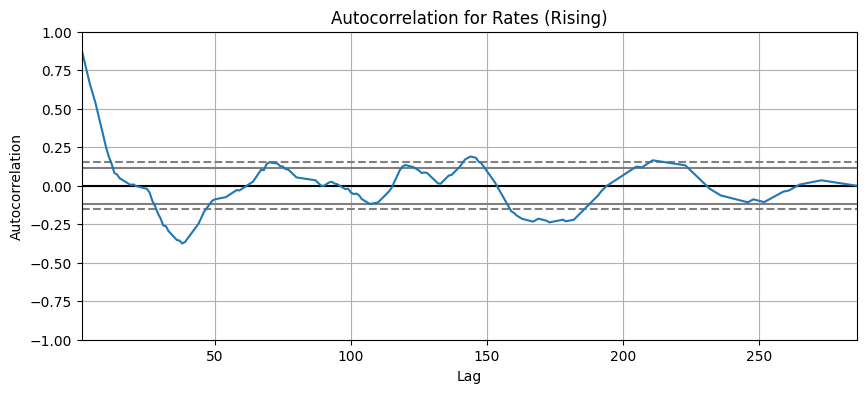

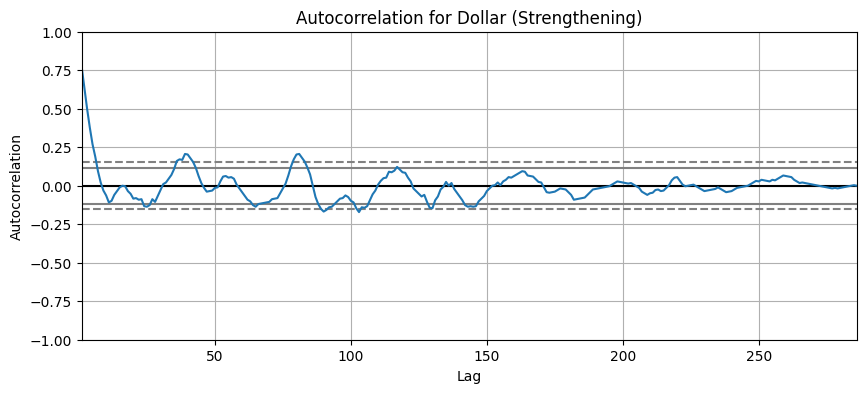

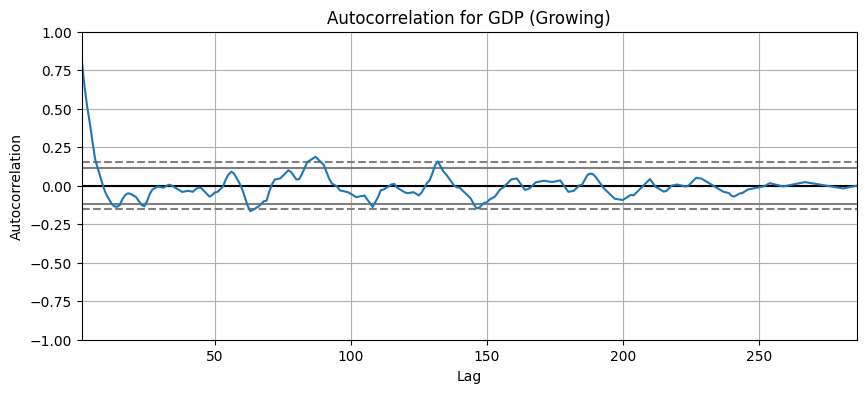

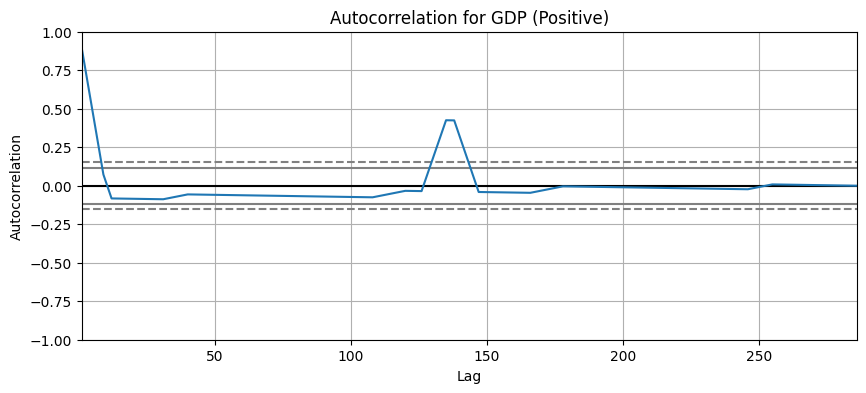

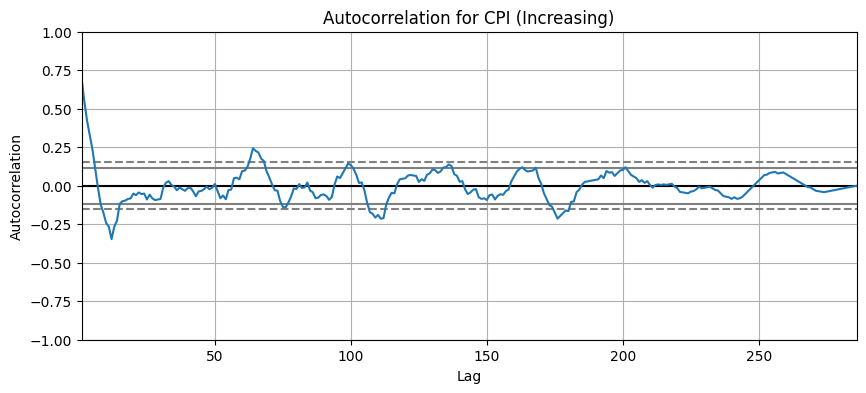

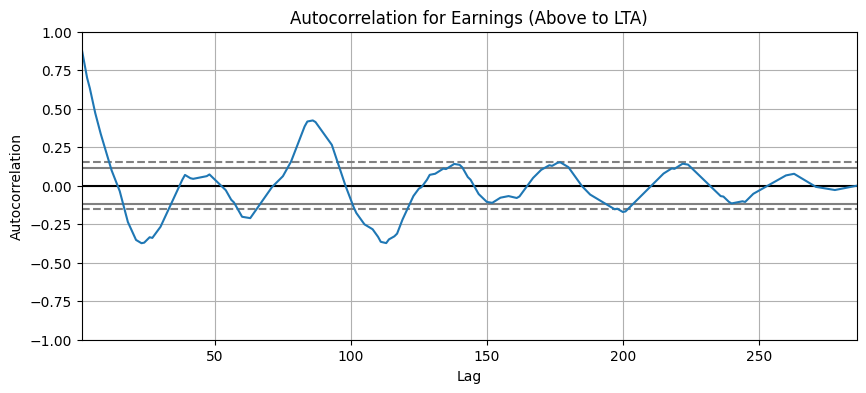

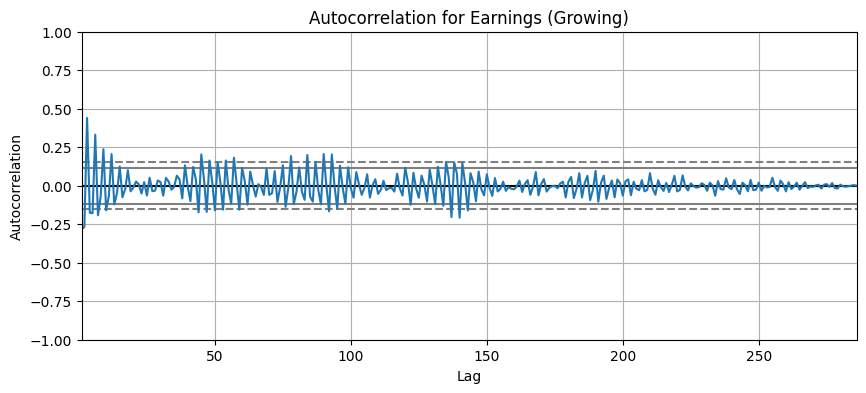

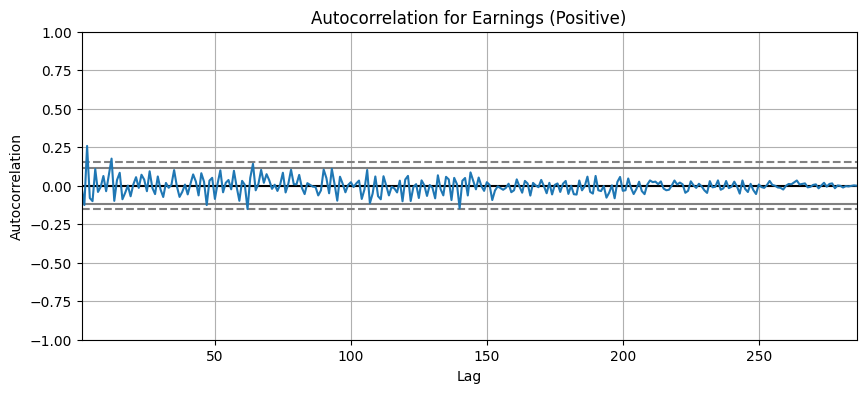

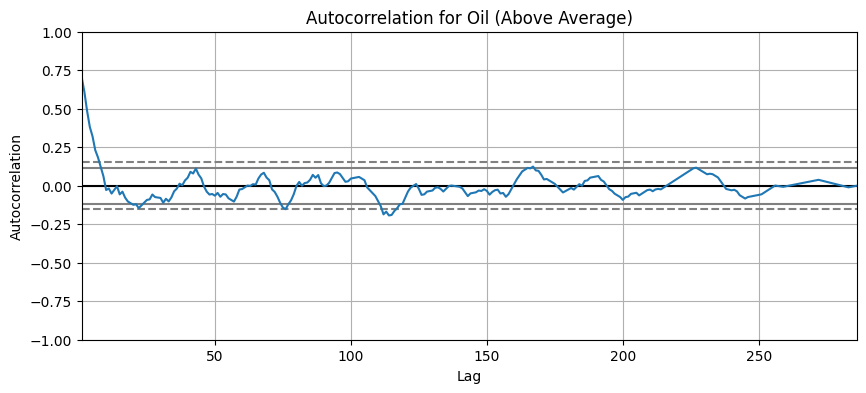

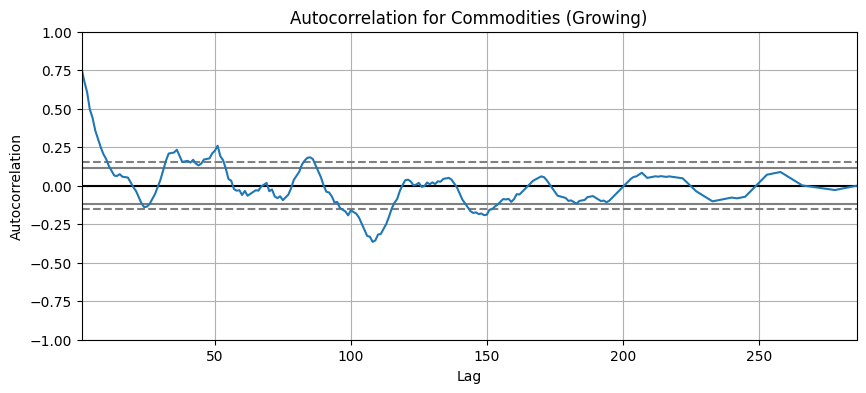

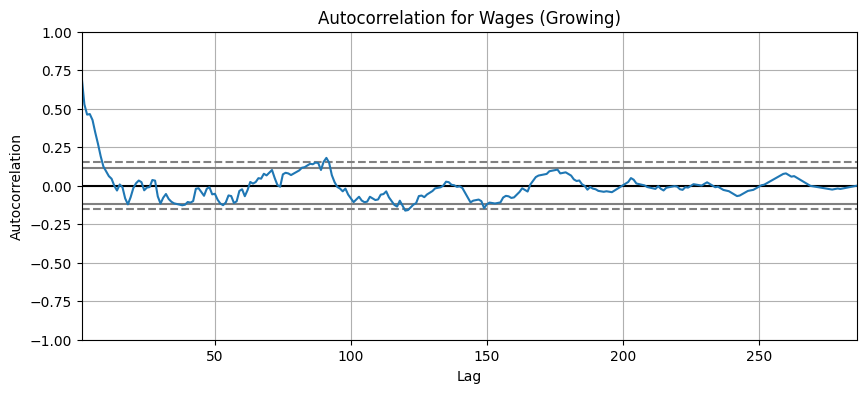

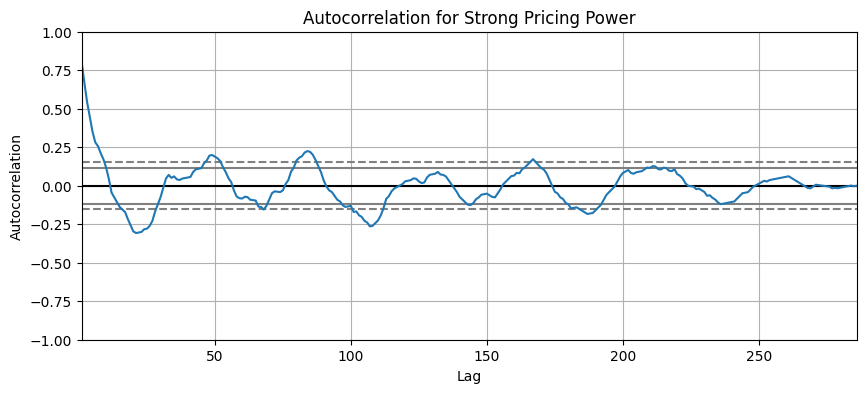

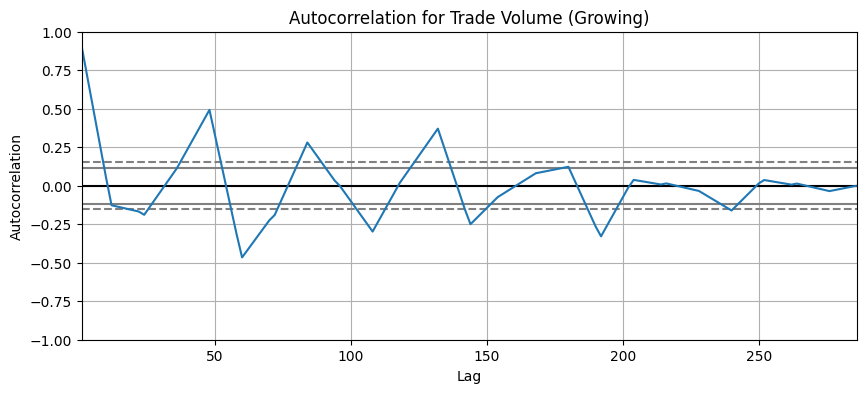

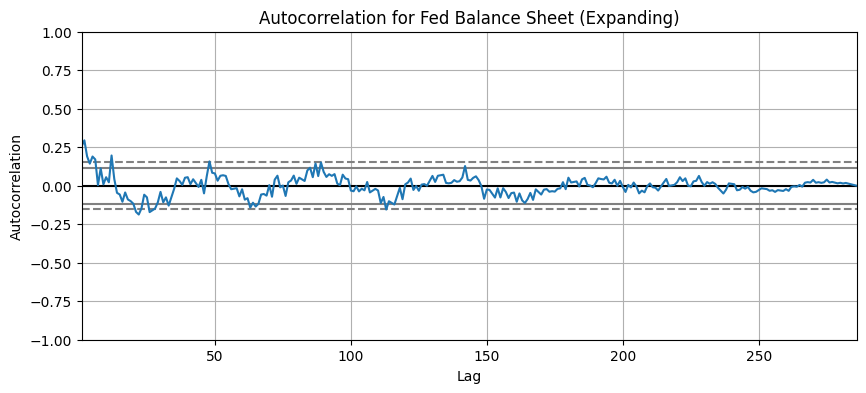

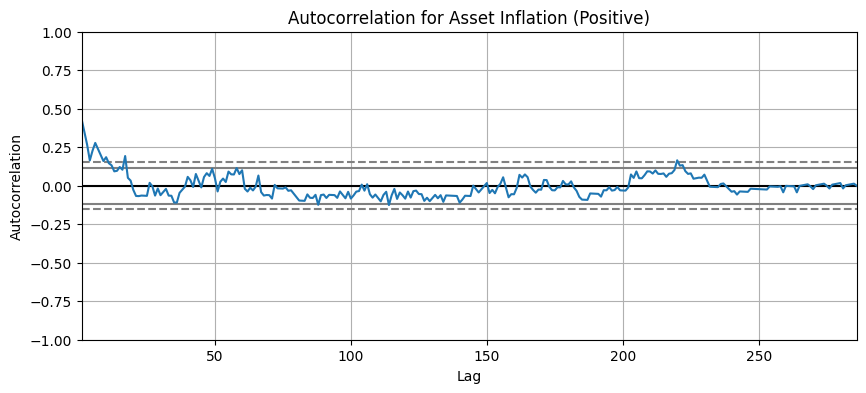

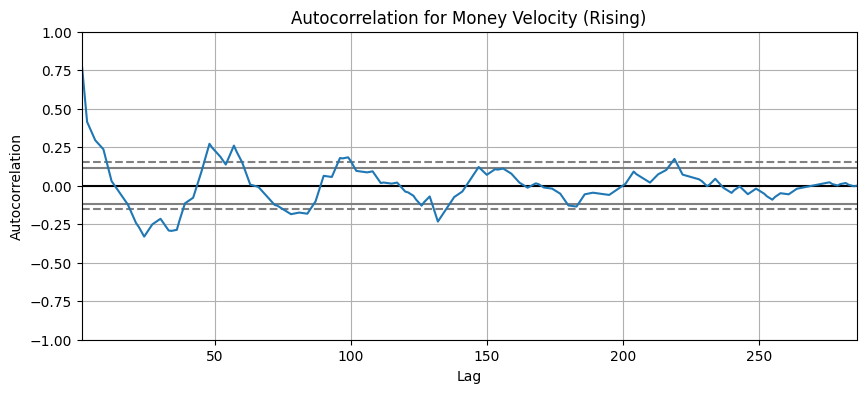

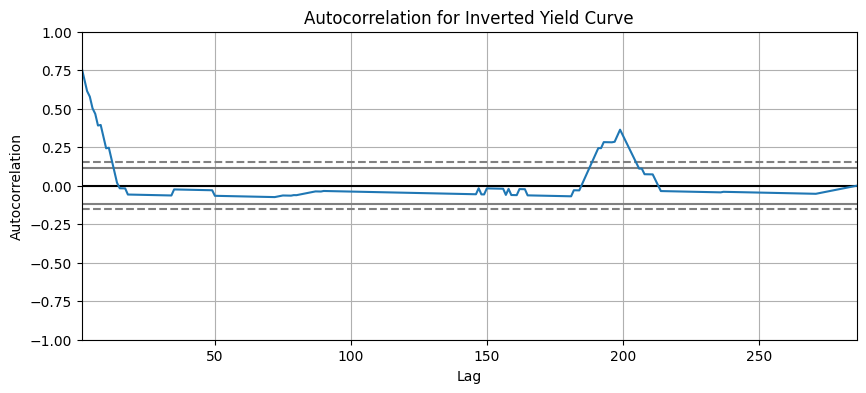

In [ ]:
# Plot the autocorrelation for each column
for column in data_classification.columns:
    plt.figure(figsize=(10, 4))
    pd.plotting.autocorrelation_plot(data_classification[column])
    plt.title(f'Autocorrelation for {column}')
    plt.show()

<Figure size 1000x400 with 0 Axes>

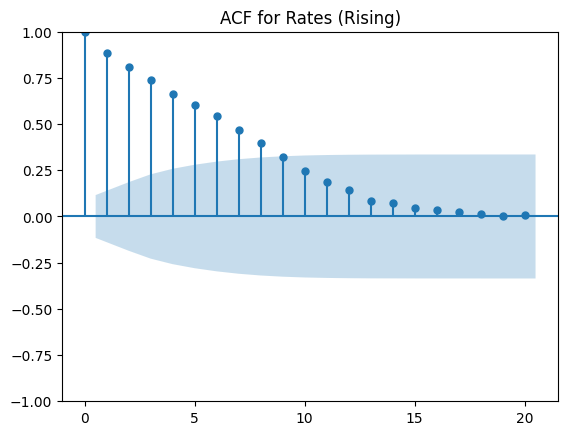

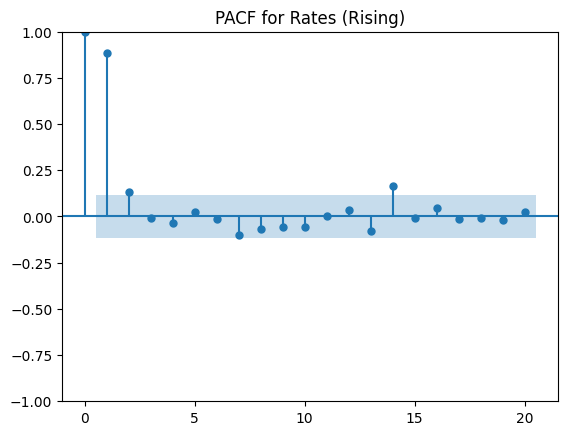

<Figure size 1000x400 with 0 Axes>

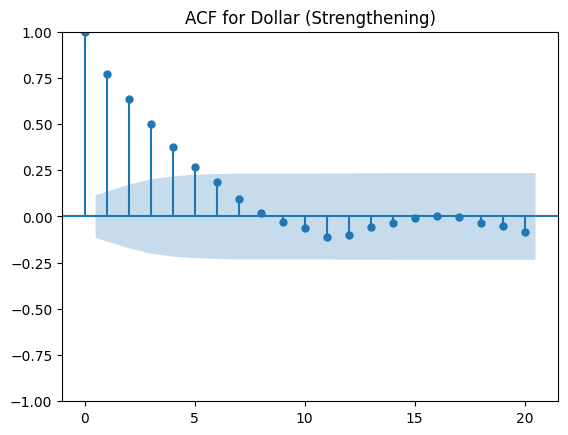

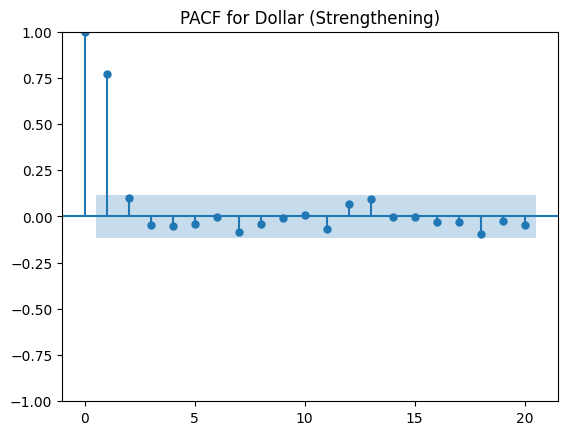

<Figure size 1000x400 with 0 Axes>

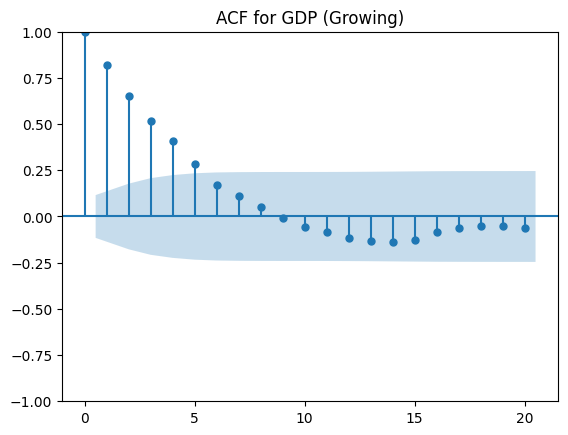

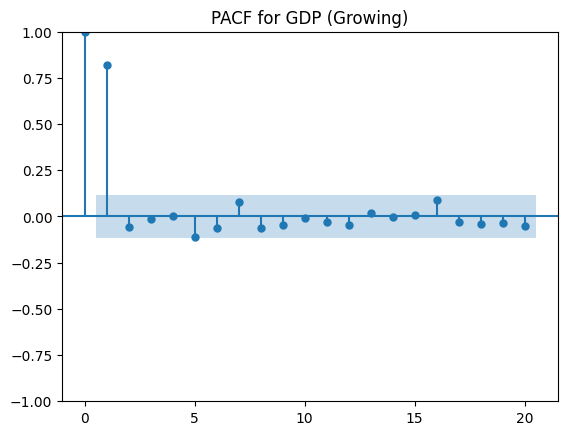

<Figure size 1000x400 with 0 Axes>

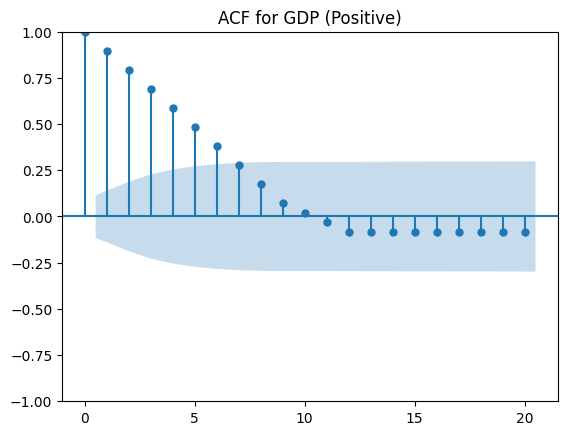

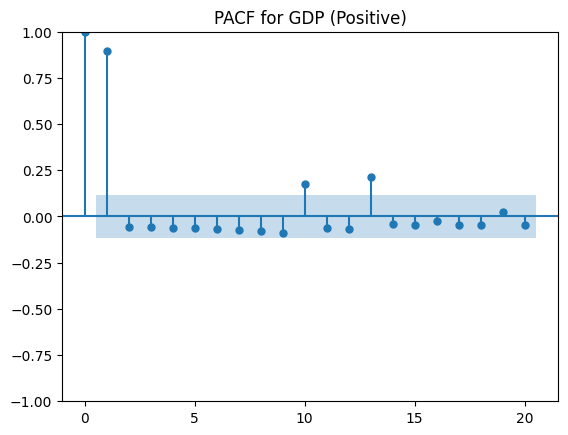

<Figure size 1000x400 with 0 Axes>

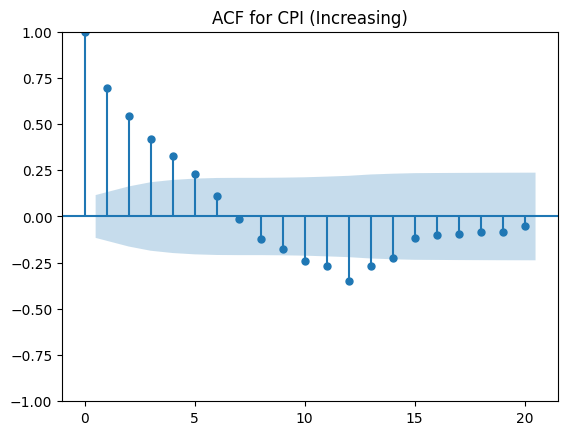

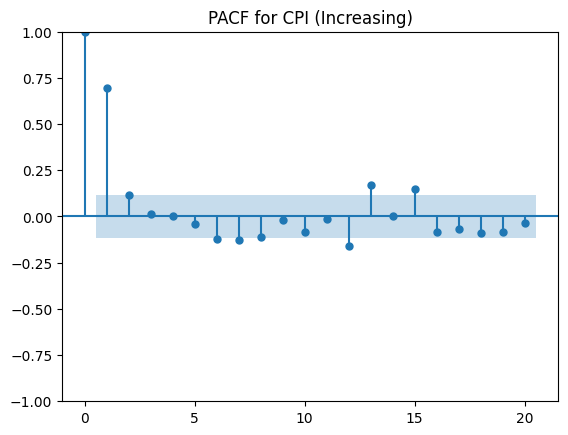

<Figure size 1000x400 with 0 Axes>

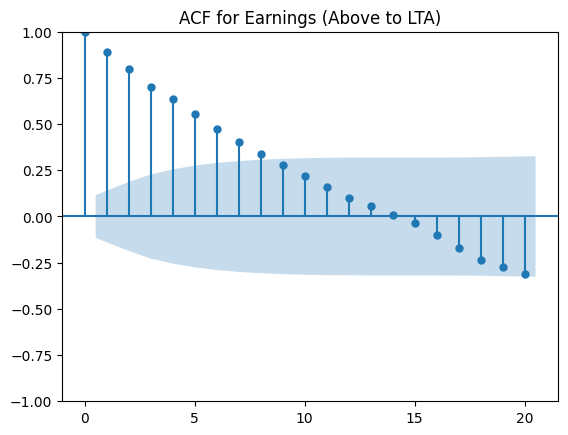

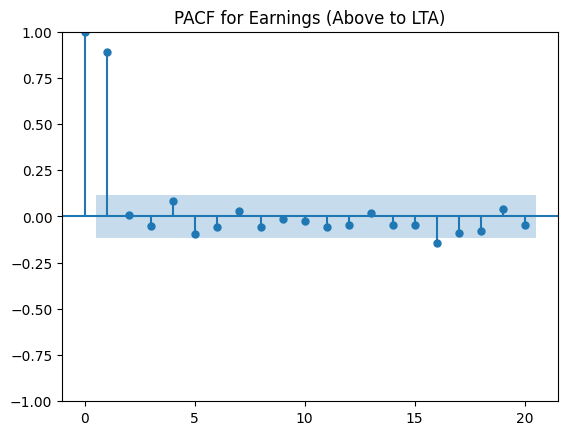

<Figure size 1000x400 with 0 Axes>

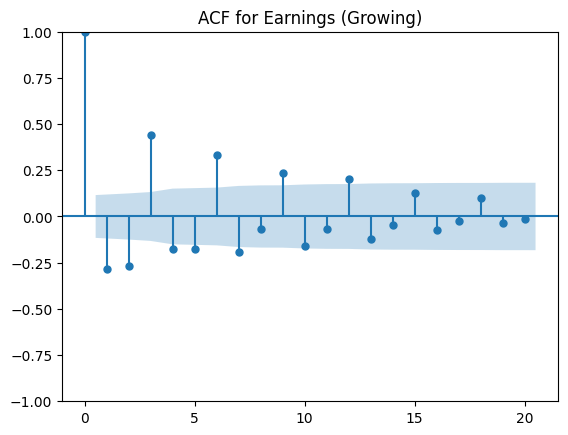

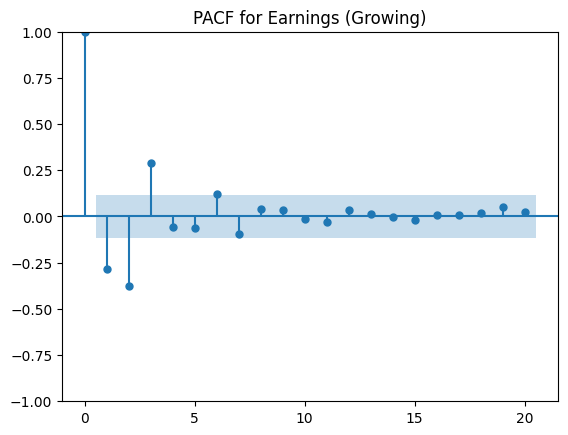

<Figure size 1000x400 with 0 Axes>

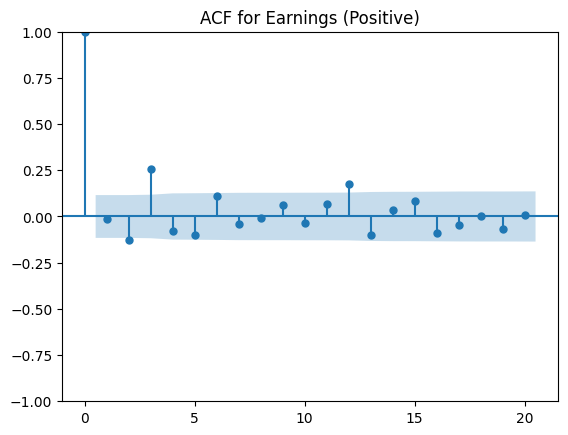

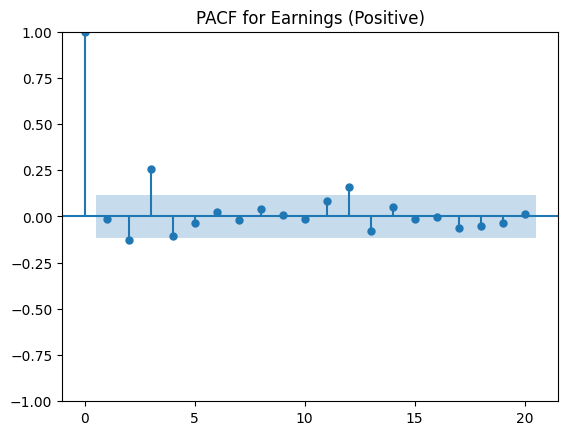

<Figure size 1000x400 with 0 Axes>

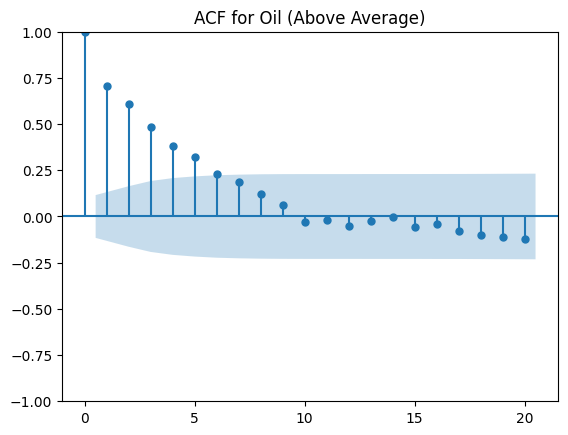

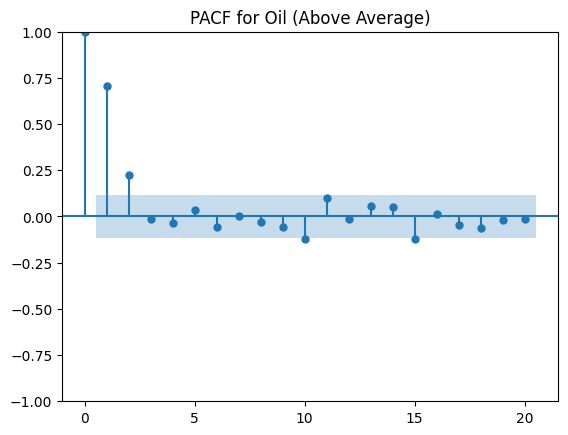

<Figure size 1000x400 with 0 Axes>

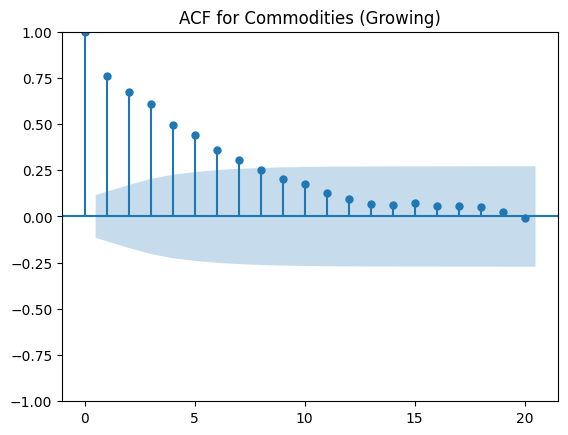

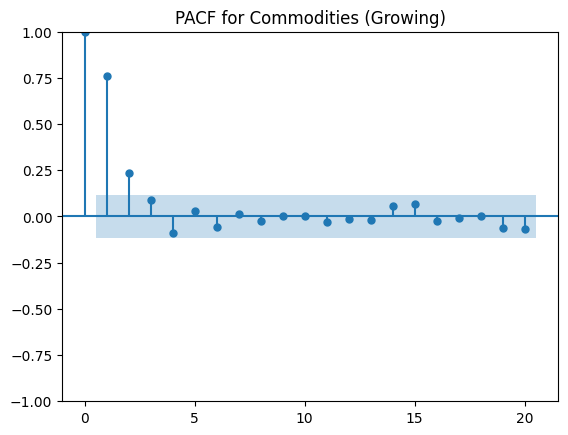

<Figure size 1000x400 with 0 Axes>

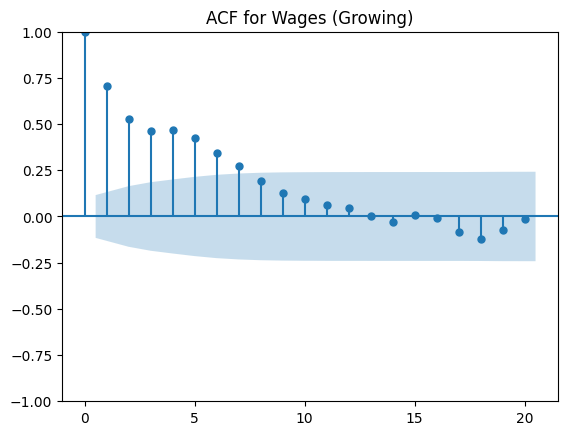

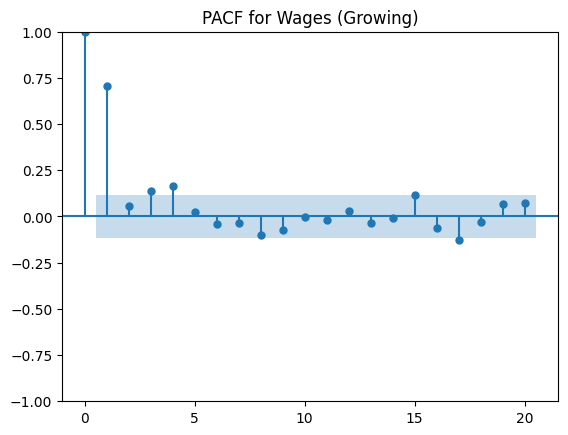

<Figure size 1000x400 with 0 Axes>

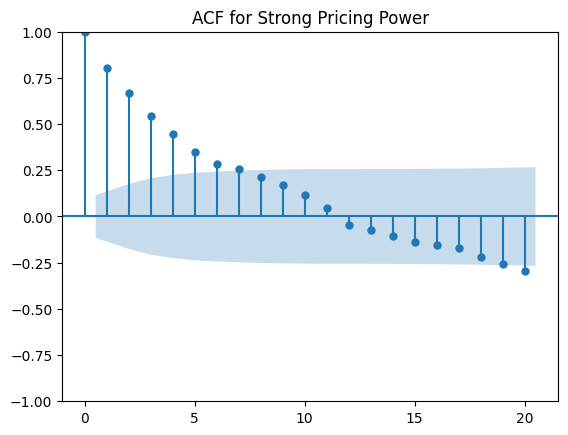

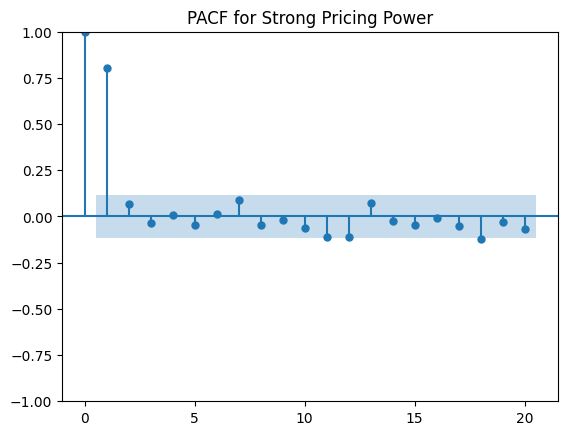

<Figure size 1000x400 with 0 Axes>

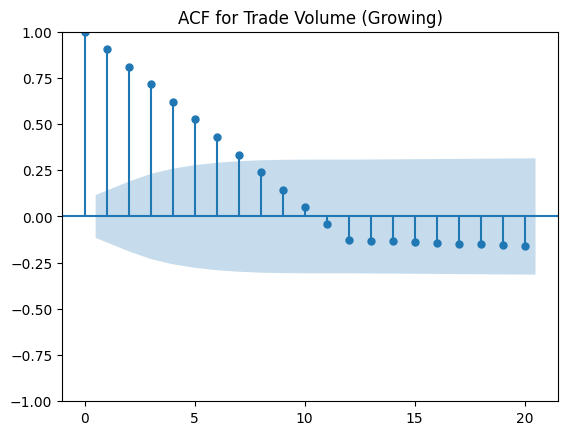

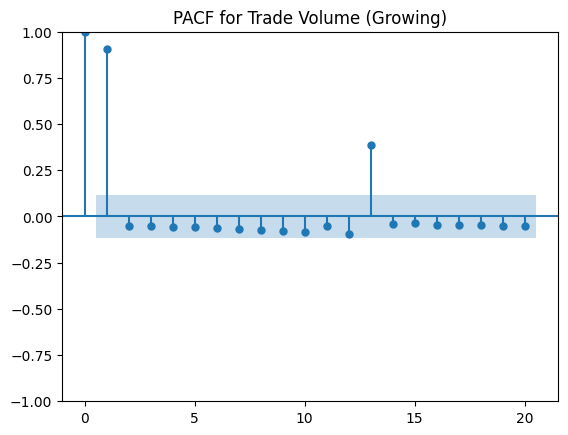

<Figure size 1000x400 with 0 Axes>

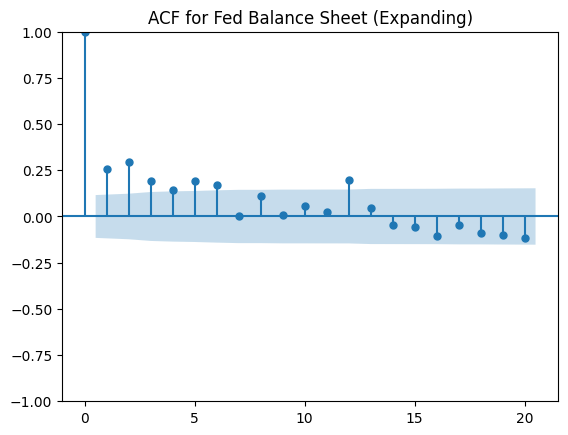

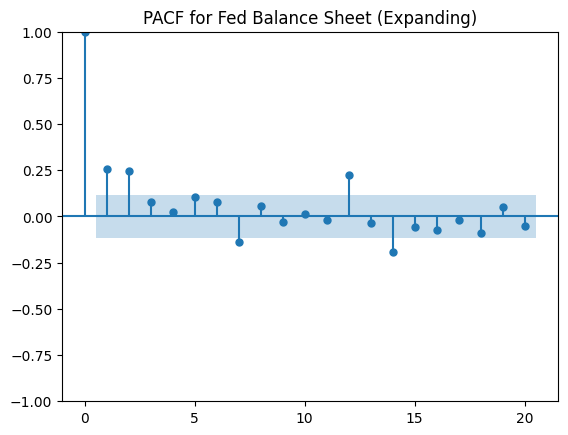

<Figure size 1000x400 with 0 Axes>

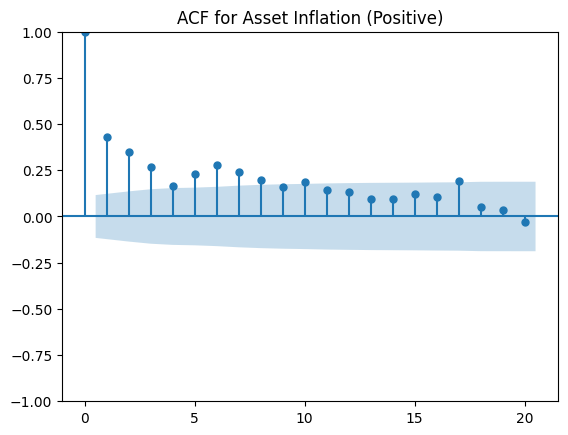

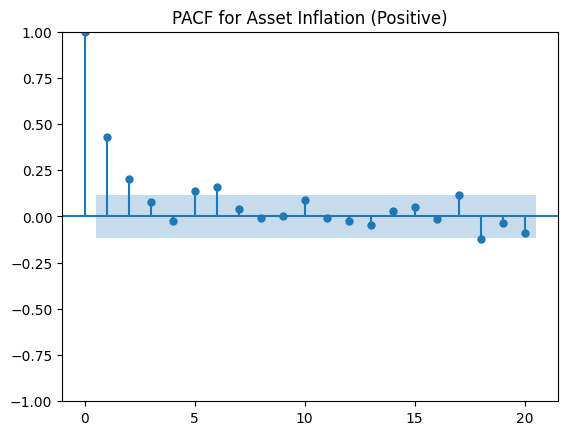

<Figure size 1000x400 with 0 Axes>

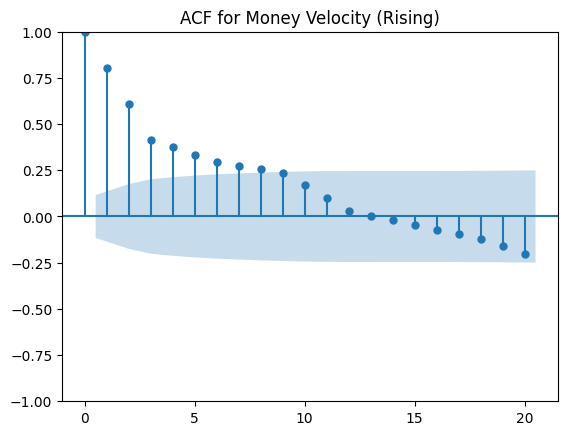

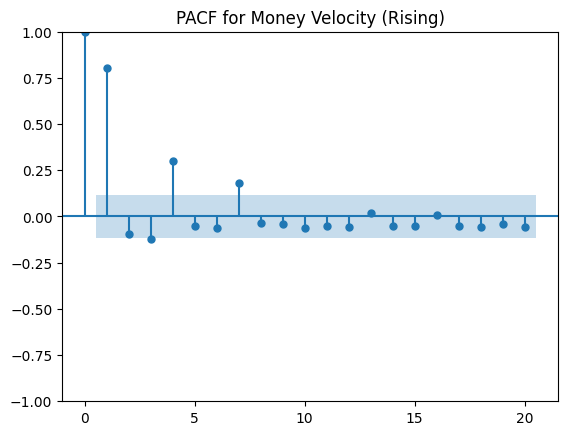

<Figure size 1000x400 with 0 Axes>

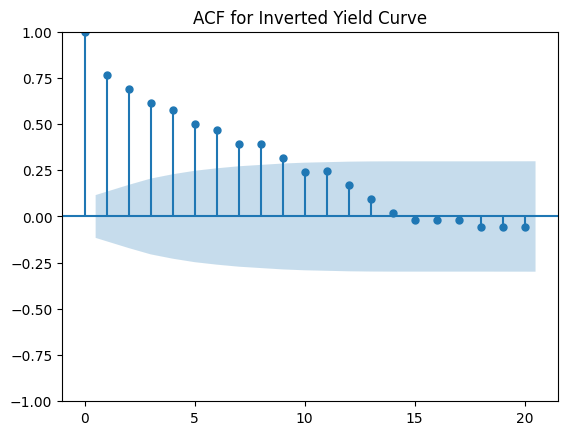

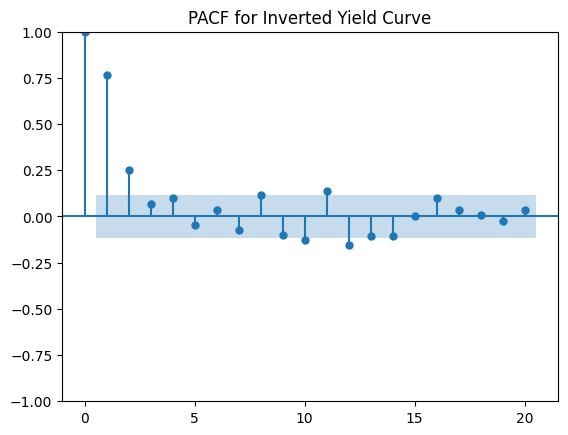

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for column in data_classification.columns:
    plt.figure(figsize=(10, 4))
    plot_acf(data_classification[column], lags=20, title=f'ACF for {column}')
    plot_pacf(data_classification[column], lags=20, title=f'PACF for {column}')
    plt.show()


Each spike that rises above or falls below the dashed lines is considered to be statistically significant. This means the spike has a value that is significantly different from zero. If a spike is significantly different from zero, that is evidence of autocorrelation. A spike that's close to zero is evidence against autocorrelation.

# ARMA （do not run this section!!）

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import traceback
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
def check_stationarity(series):

    result = adfuller(series.values)

#     print('ADF Statistic: %f' % result[0])
#     print('p-value: %f' % result[1])
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        return (True)
    else:
        return(False)


In [ ]:
def optimal_lag(data):
    aic_values = []
    bic_values = []
    pq_values = []

    for p in range(5):  # range for lag length
        for q in range(5):
            try:
                model = ARIMA(data, order=(p, 0, q)).fit()
                aic_values.append(model.aic)
                bic_values.append(model.bic)
                pq_values.append((p, q))
            except Exception as e:
                print(f"Error with ARMA({p}, {q}): {e}")

    # Proceed only if the list is not empty
    if aic_values and bic_values:
        min_aic = min(aic_values)
        min_bic = min(bic_values)

        if min_aic >= min_bic:
            return ( pq_values[bic_values.index(min_bic)])
        else:
            return (pq_values[aic_values.index(min_aic)])
    else:
        print("No suitable models were found.")


In [ ]:
def macro_arma(data,optimal_p,optimal_q):
    # Split the data into training and test sets
    train, test = data[:5], data[5:]
    history = [x for x in train]
    predictions = list()

    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(optimal_p, 0, optimal_q))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)#predict value
        obs = test[t]
        history.append(obs) #orignal value

    # evaluate forecasts
    rmse = np.sqrt(mean_squared_error(test, predictions))

    return(predictions,rmse)

## ARMA macro data

In [ ]:
# File path
file_path = '/content/drive/MyDrive/AFP project/2023 09 30 Macro Data - VALUES.xlsx'

# Tab name
tab_name = 'Data Calculation from Raw Data'

# Read the Excel file
data_classification_Raw = pd.read_excel(file_path, sheet_name=tab_name,header=10,usecols='A:U')

#clean data
data_classification_Raw=data_classification_Raw.drop(index=0)
data_classification_Raw = data_classification_Raw.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3'], axis=1)
data_classification_Raw=data_classification_Raw.dropna()
data_classification_Raw['Dates']=pd.to_datetime(data_classification_Raw['Dates']).dt.to_period('M')
data_classification_Raw = data_classification_Raw.set_index('Dates')
data_classification_Raw = data_classification_Raw.astype(float)

data_classification_Raw

Rates   Dollar  GDP  CPI  S&P Earnings    Oil  Commodities  Wage  \
Dates                                                                       
1999-12   5.30  101.870  4.8  2.7       48.7163  25.60     140.2570   5.0   
2000-01   5.45  105.130  4.8  2.7       49.0519  27.64     147.8610   4.9   
2000-02   5.73  105.920  4.8  3.2       51.5116  30.43     150.4460   4.8   
2000-03   5.85  105.440  4.2  3.8       52.5677  26.90     151.9040   4.8   
2000-04   6.02  110.140  4.2  3.1       52.5008  25.74     150.0390   4.9   
...        ...      ...  ...  ...           ...    ...          ...   ...   
2023-05   5.06  104.326  1.7  4.0      223.2170  68.09     217.9403   6.0   
2023-06   5.08  102.912  2.4  3.0      223.2369  70.64     226.7436   5.6   
2023-07   5.12  101.855  2.4  3.2      223.2369  81.80     240.9295   5.7   
2023-08   5.33  103.619  2.4  3.7      219.8964  83.63     239.0835   5.3   
2023-09   5.33  106.174  2.4  3.7      219.8974  90.79     237.4235   5.2   

         PPI Finished Goods  Pricing Power  Trade Volume  Fed Balance Sheet  \
Dates                                                                         
1999-12                 2.9           -0.2         5.149           668906.0   
2000-01                 2.5            0.2         5.149           595140.0   
2000-02                 4.0           -0.8         5.149           588665.0   
2000-03                 4.3           -0.5         5.149           579454.0   
2000-04                 3.6           -0.5         5.149           608139.0   
...                     ...            ...           ...                ...   
2023-05                -0.9            4.9         5.138          8385854.0   
2023-06                -3.1            6.1         5.138          8340914.0   
2023-07                -1.0            4.2         5.138          8243344.0   
2023-08                 2.1            1.6         5.138          8121316.0   
2023-09                 2.5            1.2         5.138          8002064.0   

         National Financial Conditions  M2 Money Supply  \
Dates                                                     
1999-12                       0.063513           4638.0   
2000-01                      -0.000956           4666.2   
2000-02                      -0.005328           4679.4   
2000-03                       0.060777           4710.2   
2000-04                       0.101871           4766.1   
...                                ...              ...   
2023-05                       0.148065          20841.7   
2023-06                       0.098341          20890.4   
2023-07                       0.063557          20905.3   
2023-08                       0.053017          20865.3   
2023-09                       0.037925          20865.3   

         Velocity of M2 Money Supply  10 Year Rates  2 Year Rates  
Dates                                                              
1999-12                       2.1518         6.4420        6.2140  
2000-01                       2.1518         6.6650        6.5910  
2000-02                       2.1518         6.4090        6.5210  
2000-03                       2.1399         6.0040        6.4790  
2000-04                       2.1399         6.2120        6.6760  
...                              ...            ...           ...  
2023-05                       1.2728         3.6426        4.4027  
2023-06                       1.3002         3.8367        4.8954  
2023-07                       1.3002         3.9588        4.8766  
2023-08                       1.3002         4.1081        4.8629  
2023-09                       1.3002         4.5711        5.0436  

[286 rows x 17 columns]

In [ ]:
predic_macro=pd.DataFrame(columns=data_classification_Raw.columns)
rmse_macro = {key: None for key in data_classification_Raw.columns}

non_stationarity=[]
for col in data_classification_Raw.columns:
    data=data_classification_Raw[col]
    stationarity=check_stationarity(data)
    if stationarity==1:
        optimal_p,optimal_q=optimal_lag(data)
        predictions,rmse=macro_arma(data,optimal_p,optimal_q)

        predic_macro[col]=predictions
        rmse_macro[col]=[round(rmse,4),optimal_p,optimal_q]
    else:
        non_stationarity.append(col)
        pass

predic_macro=predic_macro.dropna(axis=1)

In [ ]:
non_stationarity


['Dollar',
 'CPI',
 'S&P Earnings',
 'Oil',
 'Commodities',
 'Wage',
 'Fed Balance Sheet',
 'M2 Money Supply',
 'Velocity of M2 Money Supply',
 '10 Year Rates',
 '2 Year Rates']

In [ ]:
predic_macro

Rates       GDP  PPI Finished Goods  Pricing Power  Trade Volume  \
0    6.114024  4.200005            2.348850       0.327746      5.148995   
1    6.354245  4.799919            3.780049       0.384062      5.148995   
2    6.561559  4.624934            4.141372      -0.105920      5.148995   
3    6.379256  4.706836            3.240020      -0.175471      5.148995   
4    6.456681  4.090347            3.132417      -0.479522      5.148995   
..        ...       ...                 ...            ...           ...   
276  5.010915  1.700242            2.067171       2.159005      5.146902   
277  5.227940  1.883321           -2.681492       5.362778      5.169250   
278  5.111412  2.398380           -4.791439       5.821479      5.136443   
279  5.182026  2.398164            0.201858       3.233416      4.940027   
280  5.462749  2.320420            2.336542       0.884683      5.145340   

     National Financial Conditions  
0                         0.059566  
1                         0.077950  
2                         0.119798  
3                         0.135795  
4                         0.124822  
..                             ...  
276                       0.134011  
277                       0.165334  
278                       0.023889  
279                       0.082947  
280                       0.043231  

[281 rows x 6 columns]

In [ ]:
non_stationarity2=[]
non_stat_macro=pd.DataFrame(columns=non_stationarity)

for col in non_stationarity:
    data=data_classification_Raw[col].diff()
    data=data.dropna()
    stationarity=check_stationarity(data)
    if stationarity==1:
        optimal_p,optimal_q=optimal_lag(data)
        predictions,rmse=macro_arma(data,optimal_p,optimal_q)

        non_stat_macro[col]=predictions
        rmse_macro[col]=[round(rmse,4),optimal_p,optimal_q]

    else:
        non_stationarity2.append(col)
        pass

In [ ]:
non_stationarity2

In [ ]:
non_stat_macro

In [ ]:
data_classification_Raw2=pd.DataFrame()
for i in non_stationarity:
    data_classification_Raw2[i]=data_classification_Raw[i]
non_stat_macro=pd.concat([data_classification_Raw2.iloc[:6,:], non_stat_macro]).reset_index(drop=True).iloc[5:].cumsum().reset_index(drop=True)

In [ ]:
# # Extract the index from the 5th row onwards of df
new_index = data_classification_Raw.index[5:]
non_stat_macro['Dates']=new_index
non_stat_macro=non_stat_macro.set_index('Dates')
predic_macro['Dates']=new_index
predic_macro=predic_macro.set_index('Dates')
pred_data_classification = pd.merge(predic_macro, non_stat_macro, left_index=True, right_index=True, how='inner')
pred_data_classification

Rates       GDP  PPI Finished Goods  Pricing Power  Trade Volume  \
Dates                                                                          
2000-05  6.114024  4.200005            2.348850       0.327746      5.148995   
2000-06  6.354245  4.799919            3.780049       0.384062      5.148995   
2000-07  6.561559  4.624934            4.141372      -0.105920      5.148995   
2000-08  6.379256  4.706836            3.240020      -0.175471      5.148995   
2000-09  6.456681  4.090347            3.132417      -0.479522      5.148995   
...           ...       ...                 ...            ...           ...   
2023-05  5.010915  1.700242            2.067171       2.159005      5.146902   
2023-06  5.227940  1.883321           -2.681492       5.362778      5.169250   
2023-07  5.111412  2.398380           -4.791439       5.821479      5.136443   
2023-08  5.182026  2.398164            0.201858       3.233416      4.940027   
2023-09  5.462749  2.320420            2.336542       0.884683      5.145340   

         National Financial Conditions      Dollar       CPI  S&P Earnings  \
Dates                                                                        
2000-05                       0.059566  108.740000  3.200000     54.220500   
2000-06                       0.077950  110.295692  3.746421     56.228411   
2000-07                       0.119798  116.390485  4.298002     55.350349   
2000-08                       0.135795  117.644091  5.034641     57.437651   
2000-09                       0.124822  116.942581  5.349690     56.863193   
...                                ...         ...       ...           ...   
2023-05                       0.134011  137.555445  3.080319    174.852835   
2023-06                       0.165334  138.383525  2.615401    174.606232   
2023-07                       0.023889  137.837455  2.152139    174.470856   
2023-08                       0.082947  138.437390  2.453311    173.924369   
2023-09                       0.043231  138.499221  2.694496    174.006668   

               Oil  Commodities      Wage  Fed Balance Sheet  M2 Money Supply  \
Dates                                                                           
2000-05  29.010000   160.137000  4.900000       5.948960e+05      4753.900000   
2000-06  29.337808   157.880388  4.740009       5.801103e+05      4807.713866   
2000-07  30.824030   157.860618  4.815665       5.541037e+05      4881.458219   
2000-08  32.406666   169.309173  4.781320       5.517953e+05      4915.414196   
2000-09  30.717032   165.678621  4.767814       5.365952e+05      4953.976171   
...            ...          ...       ...                ...              ...   
2023-05  89.676177   458.314218  2.522219       5.992157e+06     19272.379098   
2023-06  88.053559   453.163802  2.439286       5.970115e+06     19432.899539   
2023-07  88.685146   449.765319  2.554678       5.967347e+06     19429.429851   
2023-08  91.074285   451.269855  2.530344       5.917814e+06     19431.219081   
2023-09  91.602443   456.683898  2.521922       5.870089e+06     19412.200492   

         Velocity of M2 Money Supply  10 Year Rates  2 Year Rates  
Dates                                                              
2000-05                     2.139900       6.272000      6.672000  
2000-06                     2.128190       5.757597      6.764246  
2000-07                     2.139415       5.507234      7.142423  
2000-08                     2.140925       5.470913      7.254750  
2000-09                     2.125696       5.354053      7.290129  
...                              ...            ...           ...  
2023-05                     1.097499      -6.194594     -0.876441  
2023-06                     1.102061      -6.207492     -0.833147  
2023-07                     1.099019      -6.236887     -0.740990  
2023-08                     1.095983      -6.243761     -0.670088  
2023-09                     1.098839      -6.278257     -0.615634  

[281 rows x 17 co

In [ ]:
rmse_macro

{'Rates': [0.1418, 2, 2],
 'Dollar': [2.3197, 2, 2],
 'GDP': [1.1057, 3, 2],
 'CPI': [0.4363, 4, 3],
 'S&P Earnings': [2.5368, 4, 4],
 'Oil': [6.3477, 1, 0],
 'Commodities': [13.7112, 4, 4],
 'Wage': [0.1537, 2, 4],
 'PPI Finished Goods': [1.1854, 4, 4],
 'Pricing Power': [0.8798, 4, 4],
 'Trade Volume': [2.3804, 4, 3],
 'Fed Balance Sheet': [129873.1495, 1, 1],
 'National Financial Conditions': [0.0884, 4, 2],
 'M2 Money Supply': [81.868, 3, 4],
 'Velocity of M2 Money Supply': [0.0235, 3, 0],
 '10 Year Rates': [0.2737, 2, 2],
 '2 Year Rates': [0.2514, 1, 1]}

In [ ]:
# import pandas as pd
# from google.colab import files



# # Save DataFrame to CSV
# pred_data_classification.to_excel('pred_data_classification.xlsx', index=False)

# # Download the file
# files.download('pred_data_classification.xlsx')

## plot & fix


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# File path
file_path = '/content/drive/MyDrive/AFP project/2023 09 30 Macro Data - VALUES.xlsx'

# Tab name
tab_name = 'Data Calculation from Raw Data'

# Read the Excel file
data_classification_Raw = pd.read_excel(file_path, sheet_name=tab_name,header=10,usecols='A:U')

#clean data
data_classification_Raw=data_classification_Raw.drop(index=0)
data_classification_Raw = data_classification_Raw.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3'], axis=1)
data_classification_Raw=data_classification_Raw.dropna()
data_classification_Raw['Dates']=pd.to_datetime(data_classification_Raw['Dates']).dt.to_period('M')
data_classification_Raw = data_classification_Raw.set_index('Dates')
data_classification_Raw = data_classification_Raw.astype(float)

data_classification_Raw

Rates   Dollar  GDP  CPI  S&P Earnings    Oil  Commodities  Wage  \
Dates                                                                       
1999-12   5.30  101.870  4.8  2.7       48.7163  25.60     140.2570   5.0   
2000-01   5.45  105.130  4.8  2.7       49.0519  27.64     147.8610   4.9   
2000-02   5.73  105.920  4.8  3.2       51.5116  30.43     150.4460   4.8   
2000-03   5.85  105.440  4.2  3.8       52.5677  26.90     151.9040   4.8   
2000-04   6.02  110.140  4.2  3.1       52.5008  25.74     150.0390   4.9   
...        ...      ...  ...  ...           ...    ...          ...   ...   
2023-05   5.06  104.326  1.7  4.0      223.2170  68.09     217.9403   6.0   
2023-06   5.08  102.912  2.4  3.0      223.2369  70.64     226.7436   5.6   
2023-07   5.12  101.855  2.4  3.2      223.2369  81.80     240.9295   5.7   
2023-08   5.33  103.619  2.4  3.7      219.8964  83.63     239.0835   5.3   
2023-09   5.33  106.174  2.4  3.7      219.8974  90.79     237.4235   5.2   

         PPI Finished Goods  Pricing Power  Trade Volume  Fed Balance Sheet  \
Dates                                                                         
1999-12                 2.9           -0.2         5.149           668906.0   
2000-01                 2.5            0.2         5.149           595140.0   
2000-02                 4.0           -0.8         5.149           588665.0   
2000-03                 4.3           -0.5         5.149           579454.0   
2000-04                 3.6           -0.5         5.149           608139.0   
...                     ...            ...           ...                ...   
2023-05                -0.9            4.9         5.138          8385854.0   
2023-06                -3.1            6.1         5.138          8340914.0   
2023-07                -1.0            4.2         5.138          8243344.0   
2023-08                 2.1            1.6         5.138          8121316.0   
2023-09                 2.5            1.2         5.138          8002064.0   

         National Financial Conditions  M2 Money Supply  \
Dates                                                     
1999-12                       0.063513           4638.0   
2000-01                      -0.000956           4666.2   
2000-02                      -0.005328           4679.4   
2000-03                       0.060777           4710.2   
2000-04                       0.101871           4766.1   
...                                ...              ...   
2023-05                       0.148065          20841.7   
2023-06                       0.098341          20890.4   
2023-07                       0.063557          20905.3   
2023-08                       0.053017          20865.3   
2023-09                       0.037925          20865.3   

         Velocity of M2 Money Supply  10 Year Rates  2 Year Rates  
Dates                                                              
1999-12                       2.1518         6.4420        6.2140  
2000-01                       2.1518         6.6650        6.5910  
2000-02                       2.1518         6.4090        6.5210  
2000-03                       2.1399         6.0040        6.4790  
2000-04                       2.1399         6.2120        6.6760  
...                              ...            ...           ...  
2023-05                       1.2728         3.6426        4.4027  
2023-06                       1.3002         3.8367        4.8954  
2023-07                       1.3002         3.9588        4.8766  
2023-08                       1.3002         4.1081        4.8629  
2023-09                       1.3002         4.5711        5.0436  

[286 rows x 17 columns]

In [ ]:
# File path
file_path = '/content/drive/MyDrive/AFP project/pred_data_classification.xlsx'

# Read the Excel file
pred_data_classification = pd.read_excel(file_path)

#clean data
new_index = data_classification_Raw.index[5:]
pred_data_classification['Dates']=new_index
pred_data_classification=pred_data_classification.set_index('Dates')
pred_data_classification

FileNotFoundError: ignored

In [ ]:
rmse_macro={'Rates': [0.1418, 2, 2],
 'Dollar': [2.3197, 2, 2],
 'GDP': [1.1057, 3, 2],
 'CPI': [0.4363, 4, 3],
 'S&P Earnings': [2.5368, 4, 4],
 'Oil': [6.3477, 1, 0],
 'Commodities': [13.7112, 4, 4],
 'Wage': [0.1537, 2, 4],
 'PPI Finished Goods': [1.1854, 4, 4],
 'Pricing Power': [0.8798, 4, 4],
 'Trade Volume': [2.3804, 4, 3],
 'Fed Balance Sheet': [129873.1495, 1, 1],
 'National Financial Conditions': [0.0884, 4, 2],
 'M2 Money Supply': [81.868, 3, 4],
 'Velocity of M2 Money Supply': [0.0235, 3, 0],
 '10 Year Rates': [0.2737, 2, 2],
 '2 Year Rates': [0.2514, 1, 1]}

In [ ]:
data_classification_Raw.index = data_classification_Raw.index.to_timestamp()
for col in pred_data_classification.columns:
  value=rmse_macro[col]
  # Plotting the training data, forecast, and actual test data
  plt.figure(figsize=(12, 6))
  # plt.plot(train, label='Training Data')
  plt.plot(data_classification_Raw[col], label='Actual Test Data')
  plt.plot(data_classification_Raw.index[5:],pred_data_classification[col], label='Forecasted Test Data', color='red')
  plt.title(f"ARMA({value[1]},{value[2]}) Forecast vs Actual Data for "+col)
  plt.xlabel('Date')
  plt.ylabel(col)
  plt.legend()
  plt.show()

In [ ]:
# sorted_rmse_macro = {k: v for k, v in sorted(rmse_macro.items(), key=lambda item: item[1][0])}
# sorted_rmse_macro

re-predicted some of Macro data with high rmse

In [ ]:
def macro_arma(data,optimal_p,optimal_q):
    # Split the data into training and test sets
    train, test = data[:5], data[5:]
    history = [x for x in train]
    predictions = list()

    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(optimal_p, 0, optimal_q))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)#predict value
        obs = test[t]
        history.append(obs) #orignal value

    # evaluate forecasts
    rmse = np.sqrt(mean_squared_error(test, predictions))

    return(predictions,rmse)

In [ ]:
def optimal_lag(data):
    aic_values = []
    bic_values = []
    pq_values = []

    for p in range(5):  # range for lag length
        for q in range(5):
            try:
                model = ARIMA(data, order=(p, 0, q)).fit()
                aic_values.append(model.aic)
                bic_values.append(model.bic)
                pq_values.append((p, q))
            except Exception as e:
                print(f"Error with ARMA({p}, {q}): {e}")

    # Proceed only if the list is not empty
    if aic_values and bic_values:
        min_aic = min(aic_values)
        min_bic = min(bic_values)

        if min_aic >= min_bic:
            return ( pq_values[bic_values.index(min_bic)])
        else:
            return (pq_values[aic_values.index(min_aic)])
    else:
        print("No suitable models were found.")


In [ ]:
def chooes_low_rmse(data,rmse_macro_data):
  p,q=optimal_lag(data)
  predict,e=macro_arma(data,rmse_macro_data[1],rmse_macro_data[2])
  predict2,e2=macro_arma(data,p,q)
  if e<e2:
    return (predict,e,rmse_macro_data[1],rmse_macro_data[2])
  else:
    return (predict2,e2,p,q)

In [ ]:
need_fix_macro=['Velocity of M2 Money Supply','Dollar','CPI','S&P Earnings','Oil','Commodities','Wage','10 Year Rates','2 Year Rates']

In [ ]:
for i in need_fix_macro:
  pred_data_classification[i],rmse_macro[i][0],rmse_macro[i][1],rmse_macro[i][2]=chooes_low_rmse(data_classification_Raw[i],rmse_macro[i])
  value=rmse_macro[i]
  # Plotting the training data, forecast, and actual test data
  plt.figure(figsize=(12, 6))
  # plt.plot(train, label='Training Data')
  plt.plot(data_classification_Raw[i], label='Actual Test Data')
  plt.plot(data_classification_Raw.index[5:],pred_data_classification[i], label='Forecasted Test Data', color='red')
  plt.title(f"ARMA({value[1]},{value[2]}) Forecast vs Actual Data for "+i)
  plt.xlabel('Date')
  plt.ylabel(i)
  plt.legend()
  plt.show()

'Fed Balance Sheet'  and ''M2 Money Supply'using Box-Cox transformation method to transform data from non-stationary to stationary

In [ ]:
# Box-Cox transformation (if all data is positive)
from scipy.stats import boxcox
from scipy.special import inv_boxcox

transformed_data, fitted_lambda = boxcox(data_classification_Raw['Fed Balance Sheet'])
transformed_data2, fitted_lambda2 = boxcox(data_classification_Raw['M2 Money Supply'])


In [ ]:
#Fed Balance Sheet
optimal_p,optimal_q=optimal_lag(transformed_data)
predictions,rmse=macro_arma(transformed_data,optimal_p,optimal_q)
#M2 Money Supply
optimal_p2,optimal_q2=optimal_lag(transformed_data2)
predictions2,rmse2=macro_arma(transformed_data2,optimal_p2,optimal_q2)
# predictions

In [ ]:
# convert transformed data to original data

#Fed Balance Sheet
reconstructed = inv_boxcox(predictions, fitted_lambda)

#M2 Money Supply
reconstructed2 = inv_boxcox(predictions2, fitted_lambda2)

In [ ]:
rmse_macro['Fed Balance Sheet']=[rmse,optimal_p,optimal_q]
pred_data_classification['Fed Balance Sheet']=reconstructed

rmse_macro['M2 Money Supply']=[rmse2,optimal_p2,optimal_q2]
pred_data_classification['M2 Money Supply']=reconstructed2

## Final Result

In [ ]:
rmse_macro


In [ ]:
pred_data_classification['Date']=data_classification_Raw.index[5:]

# Assume 'target_column' is the column to move to the first position
cols = ['Date'] + [col for col in pred_data_classification.columns if col != 'Date']

# Reorder DataFrame columns
pred_data_classification = pred_data_classification[cols]
pred_data_classification

Final check

In [ ]:
rmse_macro

In [ ]:
from google.colab import files

#Create a figure with a 4x5 grid of axes (subplots)
fig, axes = plt.subplots(4, 5, figsize=(30, 20))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Loop to create subplots for each column
for i, col in enumerate(pred_data_classification.columns[1:]):
    value=rmse_macro[col]
    ax = axes[i]
    ax.plot(data_classification_Raw[col], label='Actual Test Data')
    ax.plot(data_classification_Raw.index[5:],pred_data_classification[col], label='Forecasted Test Data', color='red')
    ax.set_title(f"ARMA({value[1]},{value[2]})for "+col+f" with rmse{round(value[0],4)}")
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.legend()
# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Save the figure if needed
plt.savefig('macro_plots.png')

# Show the plot
plt.show()

#download plot as png file
files.download('macro_plots.png')


In [ ]:
# import pandas as pd
# from google.colab import files



# # Save DataFrame to CSV
# pred_data_classification.to_excel('pred_data_classification2.xlsx', index=False)

# # Download the file
# files.download('pred_data_classification2.xlsx')

# Testing the conversion

In [ ]:
# File path
file_path = '/content/drive/MyDrive/AFP project/2023 09 30 Macro Data - VALUES.xlsx'

# Tab name
tab_name = 'Data Calculation from Raw Data'

# Read the Excel file
data_classification_Raw = pd.read_excel(file_path, sheet_name=tab_name,header=10,usecols='A:U')

#clean data
data_classification_Raw=data_classification_Raw.drop(index=0)
data_classification_Raw = data_classification_Raw.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3'], axis=1)
data_classification_Raw=data_classification_Raw.dropna()
data_classification_Raw['Dates']=pd.to_datetime(data_classification_Raw['Dates']).dt.to_period('M')
data_classification_Raw = data_classification_Raw.set_index('Dates')
data_classification_Raw = data_classification_Raw.astype(float)

data_classification_Raw

Rates   Dollar  GDP  CPI  S&P Earnings    Oil  Commodities  Wage  \
Dates                                                                       
1999-12   5.30  101.870  4.8  2.7       48.7163  25.60     140.2570   5.0   
2000-01   5.45  105.130  4.8  2.7       49.0519  27.64     147.8610   4.9   
2000-02   5.73  105.920  4.8  3.2       51.5116  30.43     150.4460   4.8   
2000-03   5.85  105.440  4.2  3.8       52.5677  26.90     151.9040   4.8   
2000-04   6.02  110.140  4.2  3.1       52.5008  25.74     150.0390   4.9   
...        ...      ...  ...  ...           ...    ...          ...   ...   
2023-05   5.06  104.326  1.7  4.0      223.2170  68.09     217.9403   6.0   
2023-06   5.08  102.912  2.4  3.0      223.2369  70.64     226.7436   5.6   
2023-07   5.12  101.855  2.4  3.2      223.2369  81.80     240.9295   5.7   
2023-08   5.33  103.619  2.4  3.7      219.8964  83.63     239.0835   5.3   
2023-09   5.33  106.174  2.4  3.7      219.8974  90.79     237.4235   5.2   

         PPI Finished Goods  Pricing Power  Trade Volume  Fed Balance Sheet  \
Dates                                                                         
1999-12                 2.9           -0.2         5.149           668906.0   
2000-01                 2.5            0.2         5.149           595140.0   
2000-02                 4.0           -0.8         5.149           588665.0   
2000-03                 4.3           -0.5         5.149           579454.0   
2000-04                 3.6           -0.5         5.149           608139.0   
...                     ...            ...           ...                ...   
2023-05                -0.9            4.9         5.138          8385854.0   
2023-06                -3.1            6.1         5.138          8340914.0   
2023-07                -1.0            4.2         5.138          8243344.0   
2023-08                 2.1            1.6         5.138          8121316.0   
2023-09                 2.5            1.2         5.138          8002064.0   

         National Financial Conditions  M2 Money Supply  \
Dates                                                     
1999-12                       0.063513           4638.0   
2000-01                      -0.000956           4666.2   
2000-02                      -0.005328           4679.4   
2000-03                       0.060777           4710.2   
2000-04                       0.101871           4766.1   
...                                ...              ...   
2023-05                       0.148065          20841.7   
2023-06                       0.098341          20890.4   
2023-07                       0.063557          20905.3   
2023-08                       0.053017          20865.3   
2023-09                       0.037925          20865.3   

         Velocity of M2 Money Supply  10 Year Rates  2 Year Rates  
Dates                                                              
1999-12                       2.1518         6.4420        6.2140  
2000-01                       2.1518         6.6650        6.5910  
2000-02                       2.1518         6.4090        6.5210  
2000-03                       2.1399         6.0040        6.4790  
2000-04                       2.1399         6.2120        6.6760  
...                              ...            ...           ...  
2023-05                       1.2728         3.6426        4.4027  
2023-06                       1.3002         3.8367        4.8954  
2023-07                       1.3002         3.9588        4.8766  
2023-08                       1.3002         4.1081        4.8629  
2023-09                       1.3002         4.5711        5.0436  

[286 rows x 17 columns]

In [ ]:
df = data_classification_Raw

# Define a function to calculate the 12-month average for a given column
def calculate_12m_average(column_name):
    return df[column_name].rolling(window=12).mean()

# Apply the function to the specified columns and create new binary columns based on the provided definitions
df['Rates_12M_Ave'] = calculate_12m_average('Rates')
df['Dollar_12M_Ave'] = calculate_12m_average('Dollar')
df['GDP_12M_Ave'] = calculate_12m_average('GDP')
df['CPI_12M_Ave'] = calculate_12m_average('CPI')
df['Earnings_12M_YOY'] = df['S&P Earnings'].pct_change(periods=12) * 100
df['Oil_12M_Ave'] = calculate_12m_average('Oil')
df['Commodities_12M_YOY'] = df['Commodities'].pct_change(periods=12)
df['Wages_12M_Ave'] = calculate_12m_average('Wage')
df['Trade_Volume_Ave'] = calculate_12m_average('Trade Volume')

# Add binary columns based on comparison with the 12-month average
df['Rates (Rising)'] = (df['Rates'] > df['Rates_12M_Ave']).astype(int)
df['Dollar (Strengthening)'] = (df['Dollar'] > df['Dollar_12M_Ave']).astype(int)
df['GDP (Growing)'] = (df['GDP'] > df['GDP_12M_Ave']).astype(int)
df['GDP (Positive)'] = (df['GDP'] > 0).astype(int)
df['CPI (Increasing)'] = (df['CPI'] > df['CPI_12M_Ave']).astype(int)
df['Earnings (Above to LTA)'] = (df['Earnings_12M_YOY'] > df['Earnings_12M_YOY'].mean()).astype(int)
df['Earnings (Growing)'] = (df['S&P Earnings'].pct_change() > df['S&P Earnings'].shift(1).pct_change(periods=1)).astype(int)
df['Earnings (Positive)'] = (df['S&P Earnings'].pct_change() > 0).astype(int)
df['Oil (Above Average)'] = (df['Oil'] > df['Oil_12M_Ave']).astype(int)
df['Commodities (Growing)'] = (df['Commodities'].pct_change() > df['Commodities_12M_YOY']).astype(int)
df['Wages (Growing)'] = (df['Wage'] > df['Wages_12M_Ave']).astype(int)
df['Strong Pricing Power'] = (df['CPI'] > df['PPI Finished Goods']).astype(int)
df['Trade Volume (Growing)'] = (df['Trade Volume'] > df['Trade_Volume_Ave']).astype(int)
df['Fed Balance Sheet (Expanding)'] = (df['Fed Balance Sheet'].pct_change() > 0).astype(int)
df['Asset Inflation (Positive)'] = (df['M2 Money Supply'].pct_change() * 1000 > df['CPI']).astype(int)
df['Money Velocity (Rising)'] = (df['Velocity of M2 Money Supply'] > df['Velocity of M2 Money Supply'].shift(3)).astype(int)
df['Inverted Yield Curve'] = (df['2 Year Rates'] > df['10 Year Rates']).astype(int)

In [ ]:
df

Rates   Dollar  GDP  CPI  S&P Earnings    Oil  Commodities  Wage  \
Dates                                                                       
1999-12   5.30  101.870  4.8  2.7       48.7163  25.60     140.2570   5.0   
2000-01   5.45  105.130  4.8  2.7       49.0519  27.64     147.8610   4.9   
2000-02   5.73  105.920  4.8  3.2       51.5116  30.43     150.4460   4.8   
2000-03   5.85  105.440  4.2  3.8       52.5677  26.90     151.9040   4.8   
2000-04   6.02  110.140  4.2  3.1       52.5008  25.74     150.0390   4.9   
...        ...      ...  ...  ...           ...    ...          ...   ...   
2023-05   5.06  104.326  1.7  4.0      223.2170  68.09     217.9403   6.0   
2023-06   5.08  102.912  2.4  3.0      223.2369  70.64     226.7436   5.6   
2023-07   5.12  101.855  2.4  3.2      223.2369  81.80     240.9295   5.7   
2023-08   5.33  103.619  2.4  3.7      219.8964  83.63     239.0835   5.3   
2023-09   5.33  106.174  2.4  3.7      219.8974  90.79     237.4235   5.2   

         PPI Finished Goods  Pricing Power  ...  Earnings (Positive)  \
Dates                                       ...                        
1999-12                 2.9           -0.2  ...                    0   
2000-01                 2.5            0.2  ...                    1   
2000-02                 4.0           -0.8  ...                    1   
2000-03                 4.3           -0.5  ...                    1   
2000-04                 3.6           -0.5  ...                    0   
...                     ...            ...  ...                  ...   
2023-05                -0.9            4.9  ...                    0   
2023-06                -3.1            6.1  ...                    1   
2023-07                -1.0            4.2  ...                    0   
2023-08                 2.1            1.6  ...                    0   
2023-09                 2.5            1.2  ...                    1   

         Oil (Above Average)  Commodities (Growing)  Wages (Growing)  \
Dates                                                                  
1999-12                    0                      0                0   
2000-01                    0                      0                0   
2000-02                    0                      0                0   
2000-03                    0                      0                0   
2000-04                    0                      0                0   
...                      ...                    ...              ...   
2023-05                    0                      1                0   
2023-06                    0                      1                0   
2023-07                    1                      1                0   
2023-08                    1                      1                0   
2023-09                    1                      1                0   

         Strong Pricing Power  Trade Volume (Growing)  \
Dates                                                   
1999-12                     0                       0   
2000-01                     1                       0   
2000-02                     0                       0   
2000-03                     0                       0   
2000-04                     0                       0   
...                       ...                     ...   
2023-05                     1                       0   
2023-06                     1                       0   
2023-07                     1                       0   
2023-08                     1                       0   
2023-09                     1                       0   

         Fed Balance Sheet (Expanding)  Asset Inflation (Positive)  \
Dates                                                                
1999-12                              0                           0   
2000-01                              0                           1   
2000-02                              0                           0   
2000-03                              0   

In [ ]:
df.reset_index(inplace=True)

In [ ]:
# List of all binary column names based on the provided definitions
binary_columns = [
    'Rates (Rising)', 'Dollar (Strengthening)', 'GDP (Growing)',
    'GDP (Positive)', 'CPI (Increasing)', 'Earnings (Above to LTA)',
    'Earnings (Growing)', 'Earnings (Positive)', 'Oil (Above Average)',
    'Commodities (Growing)', 'Wages (Growing)', 'Strong Pricing Power',
    'Trade Volume (Growing)', 'Fed Balance Sheet (Expanding)',
    'Asset Inflation (Positive)', 'Money Velocity (Rising)',
    'Inverted Yield Curve'
]

# Select only the 'Date' column and the binary columns
#df.reset_index(inplace=True)
df_binary_only = df[['Dates'] + binary_columns]

# Show the DataFrame with only the date and binary columns
df_binary_only[20:50]

Dates  Rates (Rising)  Dollar (Strengthening)  GDP (Growing)  \
20  2001-08               0                       0              0   
21  2001-09               0                       0              0   
22  2001-10               0                       1              0   
23  2001-11               0                       1              0   
24  2001-12               0                       1              0   
25  2002-01               0                       1              0   
26  2002-02               0                       1              0   
27  2002-03               0                       1              1   
28  2002-04               0                       0              1   
29  2002-05               0                       0              1   
30  2002-06               0                       0              1   
31  2002-07               0                       0              1   
32  2002-08               0                       0              1   
33  2002-09               0                       0              1   
34  2002-10               0                       0              1   
35  2002-11               0                       0              1   
36  2002-12               0                       0              1   
37  2003-01               0                       0              1   
38  2003-02               0                       0              1   
39  2003-03               0                       0              0   
40  2003-04               0                       0              0   
41  2003-05               0                       0              0   
42  2003-06               0                       0              1   
43  2003-07               0                       0              1   
44  2003-08               0                       0              1   
45  2003-09               0                       0              1   
46  2003-10               0                       0              1   
47  2003-11               0                       0              1   
48  2003-12               0                       0              1   
49  2004-01               0                       0              1   

    GDP (Positive)  CPI (Increasing)  Earnings (Above to LTA)  \
20               1                 0                        0   
21               1                 0                        0   
22               1                 0                        0   
23               1                 0                        0   
24               1                 0                        0   
25               1                 0                        0   
26               1                 0                        0   
27               1                 0                        0   
28               1                 0                        0   
29               1                 0                        0   
30               1                 0                        0   
31               1                 0                        0   
32               1                 1                        0   
33               1                 0                        0   
34               1                 1                        0   
35               1                 1                        0   
36               1                 1                        0   
37               1                 1                        0   
38               1                 1                        1   
39               1                 1                        1   
40               1                 1                        1   
41               1                 0                        0   
42               1                 0                        1   
43               1                 0                        1   
44               1                 0                        1   
45               1                 0                        1   
46               1                 0                        1   
47             

In [ ]:
# Filter the DataFrame based on the condition
df_macro_predict = df_binary_only[df['Dates'] >= '2002-12-01']
df_macro_predict = df_macro_predict.set_index('Dates')
# Display the filtered DataFrame
df_macro_predict

Rates (Rising)  Dollar (Strengthening)  GDP (Growing)  \
Dates                                                            
2002-12               0                       0              1   
2003-01               0                       0              1   
2003-02               0                       0              1   
2003-03               0                       0              0   
2003-04               0                       0              0   
...                 ...                     ...            ...   
2023-05               1                       0              1   
2023-06               1                       0              1   
2023-07               1                       0              1   
2023-08               1                       0              1   
2023-09               1                       1              1   

         GDP (Positive)  CPI (Increasing)  Earnings (Above to LTA)  \
Dates                                                                
2002-12               1                 1                        0   
2003-01               1                 1                        0   
2003-02               1                 1                        1   
2003-03               1                 1                        1   
2003-04               1                 1                        1   
...                 ...               ...                      ...   
2023-05               1                 0                        0   
2023-06               1                 0                        0   
2023-07               1                 0                        0   
2023-08               1                 0                        0   
2023-09               1                 0                        0   

         Earnings (Growing)  Earnings (Positive)  Oil (Above Average)  \
Dates                                                                   
2002-12                   0                    0                    1   
2003-01                   1                    1                    1   
2003-02                   1                    1                    1   
2003-03                   0                    0                    1   
2003-04                   1                    0                    0   
...                     ...                  ...                  ...   
2023-05                   0                    0                    0   
2023-06                   1                    1                    0   
2023-07                   0                    0                    1   
2023-08                   0                    0                    1   
2023-09                   1                    1                    1   

         Commodities (Growing)  Wages (Growing)  Strong Pricing Power  \
Dates                                                                   
2002-12                      0                0                     1   
2003-01                      0                0                     1   
2003-02                      0                0                     0   
2003-03                      0                0                     0   
2003-04                      0                0                     0   
...                        ...              ...                   ...   
2023-05                      1                0                     1   
2023-06                      1                0                     1   
2023-07                      1                0                     1   
2023-08                      1                0                     1   
2023-09                      1                0                     1   

         Trade Volume (Growing)  Fed Balance Sheet (Expanding)  \
Dates                                                            
2002-12                       1                              1   
2003-01                       1                              0   
2003-02                       1                              1   
2003-03  

In [ ]:
data_classification = data_classification[data_classification.index >= '2002-12-01']

accuracy_per_column = {}
for column in data_classification.columns:
    correct_predictions = (data_classification[column] == df_macro_predict[column]).sum()
    total_predictions = len(data_classification[column])
    accuracy = correct_predictions / total_predictions
    accuracy_per_column[column] = accuracy

# Displaying accuracy for each column
accuracy_per_column


{'Rates (Rising)': 0.984,
 'Dollar (Strengthening)': 0.984,
 'GDP (Growing)': 0.976,
 'GDP (Positive)': 1.0,
 'CPI (Increasing)': 0.968,
 'Earnings (Above to LTA)': 1.0,
 'Earnings (Growing)': 1.0,
 'Earnings (Positive)': 1.0,
 'Oil (Above Average)': 0.98,
 'Commodities (Growing)': 1.0,
 'Wages (Growing)': 0.964,
 'Strong Pricing Power': 0.98,
 'Trade Volume (Growing)': 0.964,
 'Fed Balance Sheet (Expanding)': 1.0,
 'Asset Inflation (Positive)': 0.968,
 'Money Velocity (Rising)': 1.0,
 'Inverted Yield Curve': 1.0}

# Predicted Macro Data-binary

In [ ]:
# File path
file_path = '/content/drive/My Drive/AFP project/pred_data_classification2.xlsx'


# Read the Excel file
pred_data_classification= pd.read_excel(file_path )

# #clean data
pred_data_classification['Date']=pd.to_datetime(pred_data_classification['Date']).dt.to_period('M')
pred_data_classification = pred_data_classification.set_index('Date')

pred_data_classification

Rates       GDP  PPI Finished Goods  Pricing Power  Trade Volume  \
Date                                                                           
2000-05  6.114024  4.200005            2.348850       0.327746      5.148995   
2000-06  6.354245  4.799919            3.780049       0.384062      5.148995   
2000-07  6.561559  4.624934            4.141372      -0.105920      5.148995   
2000-08  6.379256  4.706836            3.240020      -0.175471      5.148995   
2000-09  6.456681  4.090347            3.132417      -0.479522      5.148995   
...           ...       ...                 ...            ...           ...   
2023-05  5.010915  1.700242            2.067171       2.159005      5.146902   
2023-06  5.227940  1.883321           -2.681492       5.362778      5.169250   
2023-07  5.111412  2.398380           -4.791439       5.821479      5.136443   
2023-08  5.182026  2.398164            0.201858       3.233416      4.940027   
2023-09  5.462749  2.320420            2.336542       0.884683      5.145340   

         National Financial Conditions      Dollar       CPI  S&P Earnings  \
Date                                                                         
2000-05                       0.059566  106.232576  2.663778     50.116651   
2000-06                       0.077950  104.530399  2.072199     54.232121   
2000-07                       0.119798  106.735581  3.430202     53.258925   
2000-08                       0.135795  108.121864  3.025316     55.054633   
2000-09                       0.124822  111.548183  2.977874     53.873931   
...                                ...         ...       ...           ...   
2023-05                       0.134011  101.298867  4.898764    223.747918   
2023-06                       0.165334  104.150224  3.416370    223.100322   
2023-07                       0.023889  102.593005  2.453531    223.040806   
2023-08                       0.082947  101.585310  3.242856    222.662270   
2023-09                       0.043231  103.515810  3.736508    219.688224   

               Oil  Commodities      Wage  Fed Balance Sheet  M2 Money Supply  \
Date                                                                            
2000-05  29.919272   146.089599  5.000009       6.223943e+05      4753.900000   
2000-06  29.432610   152.654351  4.891787       6.143697e+05      4807.713866   
2000-07  27.009693   160.868273  4.917630       6.123972e+05      4881.458219   
2000-08  24.176432   145.657457  5.081858       6.019235e+05      4915.414196   
2000-09  28.021472   167.199881  5.056339       6.045958e+05      4953.976171   
...            ...          ...       ...                ...              ...   
2023-05  76.473304   229.536396  5.962271       8.471712e+06     19272.379098   
2023-06  65.920124   215.123296  5.897920       8.252143e+06     19432.899539   
2023-07  70.841740   227.013018  5.695703       8.278616e+06     19429.429851   
2023-08  83.518018   241.654917  5.656441       8.299291e+06     19431.219081   
2023-09  83.257230   239.541892  5.282912       8.011440e+06     19412.200492   

         Velocity of M2 Money Supply  10 Year Rates  2 Year Rates  
Date                                                               
2000-05                     2.139900       6.699784      6.317438  
2000-06                     2.128190       6.556457      6.470239  
2000-07                     2.139415       6.189517      6.530045  
2000-08                     2.140925       6.213598      6.453448  
2000-09                     2.125696       5.721214      6.248875  
...                              ...            ...           ...  
2023-05                     1.097499       3.484393      4.015315  
2023-06                     1.102061       3.636652      4.449051  
2023-07                     1.099019       3.837430      4.950413  
2023-08                     1.095983       3.949956      4.857072  
2023-09                     1.098839       4.107890      4.854815  

[281 rows x 17 co

In [ ]:
df = pred_data_classification

# Define a function to calculate the 12-month average for a given column
def calculate_12m_average(column_name):
    return df[column_name].rolling(window=12).mean()

# Apply the function to the specified columns and create new binary columns based on the provided definitions
df['Rates_12M_Ave'] = calculate_12m_average('Rates')
df['Dollar_12M_Ave'] = calculate_12m_average('Dollar')
df['GDP_12M_Ave'] = calculate_12m_average('GDP')
df['CPI_12M_Ave'] = calculate_12m_average('CPI')
df['Earnings_12M_YOY'] = df['S&P Earnings'].pct_change(periods=12) * 100
df['Oil_12M_Ave'] = calculate_12m_average('Oil')
df['Commodities_12M_YOY'] = df['Commodities'].pct_change(periods=12)
df['Wages_12M_Ave'] = calculate_12m_average('Wage')
df['Trade_Volume_Ave'] = calculate_12m_average('Trade Volume')

# Add binary columns based on comparison with the 12-month average
df['Rates (Rising)'] = (df['Rates'] > df['Rates_12M_Ave']).astype(int)
df['Dollar (Strengthening)'] = (df['Dollar'] > df['Dollar_12M_Ave']).astype(int)
df['GDP (Growing)'] = (df['GDP'] > df['GDP_12M_Ave']).astype(int)
df['GDP (Positive)'] = (df['GDP'] > 0).astype(int)
df['CPI (Increasing)'] = (df['CPI'] > df['CPI_12M_Ave']).astype(int)
df['Earnings (Above to LTA)'] = (df['Earnings_12M_YOY'] > df['Earnings_12M_YOY'].mean()).astype(int)
df['Earnings (Growing)'] = (df['S&P Earnings'].pct_change() > df['S&P Earnings'].shift(1).pct_change(periods=1)).astype(int)
df['Earnings (Positive)'] = (df['S&P Earnings'].pct_change() > 0).astype(int)
df['Oil (Above Average)'] = (df['Oil'] > df['Oil_12M_Ave']).astype(int)
df['Commodities (Growing)'] = (df['Commodities'].pct_change() > df['Commodities_12M_YOY']).astype(int)
df['Wages (Growing)'] = (df['Wage'] > df['Wages_12M_Ave']).astype(int)
df['Strong Pricing Power'] = (df['CPI'] > df['PPI Finished Goods']).astype(int)
df['Trade Volume (Growing)'] = (df['Trade Volume'] > df['Trade_Volume_Ave']).astype(int)
df['Fed Balance Sheet (Expanding)'] = (df['Fed Balance Sheet'].pct_change() > 0).astype(int)
df['Asset Inflation (Positive)'] = (df['M2 Money Supply'].pct_change() * 1000 > df['CPI']).astype(int)
df['Money Velocity (Rising)'] = (df['Velocity of M2 Money Supply'] > df['Velocity of M2 Money Supply'].shift(3)).astype(int)
df['Inverted Yield Curve'] = (df['2 Year Rates'] > df['10 Year Rates']).astype(int)


In [ ]:
df

Rates       GDP  PPI Finished Goods  Pricing Power  Trade Volume  \
Date                                                                           
2000-05  6.114024  4.200005            2.348850       0.327746      5.148995   
2000-06  6.354245  4.799919            3.780049       0.384062      5.148995   
2000-07  6.561559  4.624934            4.141372      -0.105920      5.148995   
2000-08  6.379256  4.706836            3.240020      -0.175471      5.148995   
2000-09  6.456681  4.090347            3.132417      -0.479522      5.148995   
...           ...       ...                 ...            ...           ...   
2023-05  5.010915  1.700242            2.067171       2.159005      5.146902   
2023-06  5.227940  1.883321           -2.681492       5.362778      5.169250   
2023-07  5.111412  2.398380           -4.791439       5.821479      5.136443   
2023-08  5.182026  2.398164            0.201858       3.233416      4.940027   
2023-09  5.462749  2.320420            2.336542       0.884683      5.145340   

         National Financial Conditions      Dollar       CPI  S&P Earnings  \
Date                                                                         
2000-05                       0.059566  106.232576  2.663778     50.116651   
2000-06                       0.077950  104.530399  2.072199     54.232121   
2000-07                       0.119798  106.735581  3.430202     53.258925   
2000-08                       0.135795  108.121864  3.025316     55.054633   
2000-09                       0.124822  111.548183  2.977874     53.873931   
...                                ...         ...       ...           ...   
2023-05                       0.134011  101.298867  4.898764    223.747918   
2023-06                       0.165334  104.150224  3.416370    223.100322   
2023-07                       0.023889  102.593005  2.453531    223.040806   
2023-08                       0.082947  101.585310  3.242856    222.662270   
2023-09                       0.043231  103.515810  3.736508    219.688224   

               Oil  ...  Earnings (Positive)  Oil (Above Average)  \
Date                ...                                             
2000-05  29.919272  ...                    0                    0   
2000-06  29.432610  ...                    1                    0   
2000-07  27.009693  ...                    0                    0   
2000-08  24.176432  ...                    1                    0   
2000-09  28.021472  ...                    0                    0   
...            ...  ...                  ...                  ...   
2023-05  76.473304  ...                    0                    0   
2023-06  65.920124  ...                    0                    0   
2023-07  70.841740  ...                    0                    0   
2023-08  83.518018  ...                    0                    1   
2023-09  83.257230  ...                    0                    1   

         Commodities (Growing)  Wages (Growing)  Strong Pricing Power  \
Date                                                                    
2000-05                      0                0                     1   
2000-06                      0                0                     0   
2000-07                      0                0                     0   
2000-08                      0                0                     0   
2000-09                      0                0                     0   
...                        ...              ...                   ...   
2023-05                      1                0                     1   
2023-06                      1                0                     1   
2023-07                      1                0                     1   
2023-08                      1                0                     1   
2023-09                      1                0                     1   

         Trade Volume (Growing)  Fed Balance Sheet (Expanding)  \
Date                                      

In [ ]:
# List of all binary column names based on the provided definitions
binary_columns = [
    'Rates (Rising)', 'Dollar (Strengthening)', 'GDP (Growing)',
    'GDP (Positive)', 'CPI (Increasing)', 'Earnings (Above to LTA)',
    'Earnings (Growing)', 'Earnings (Positive)', 'Oil (Above Average)',
    'Commodities (Growing)', 'Wages (Growing)', 'Strong Pricing Power',
    'Trade Volume (Growing)', 'Fed Balance Sheet (Expanding)',
    'Asset Inflation (Positive)', 'Money Velocity (Rising)',
    'Inverted Yield Curve'
]

# Select only the 'Date' column and the binary columns
df.reset_index(inplace=True)
df_binary_only = df[['Date'] + binary_columns]

# Show the DataFrame with only the date and binary columns
df_binary_only[20:50]


Date  Rates (Rising)  Dollar (Strengthening)  GDP (Growing)  \
20  2002-01               0                       1              0   
21  2002-02               0                       1              0   
22  2002-03               0                       1              0   
23  2002-04               0                       1              1   
24  2002-05               0                       0              1   
25  2002-06               0                       0              1   
26  2002-07               0                       0              1   
27  2002-08               0                       0              1   
28  2002-09               1                       0              1   
29  2002-10               0                       0              1   
30  2002-11               1                       0              1   
31  2002-12               0                       0              1   
32  2003-01               0                       0              1   
33  2003-02               0                       0              1   
34  2003-03               0                       0              1   
35  2003-04               0                       0              0   
36  2003-05               0                       0              0   
37  2003-06               0                       0              0   
38  2003-07               0                       0              1   
39  2003-08               0                       0              1   
40  2003-09               0                       0              0   
41  2003-10               0                       0              1   
42  2003-11               0                       0              1   
43  2003-12               0                       0              1   
44  2004-01               0                       0              1   
45  2004-02               0                       0              1   
46  2004-03               0                       0              1   
47  2004-04               0                       0              1   
48  2004-05               0                       0              1   
49  2004-06               0                       0              1   

    GDP (Positive)  CPI (Increasing)  Earnings (Above to LTA)  \
20               1                 0                        0   
21               1                 0                        0   
22               1                 0                        0   
23               1                 0                        0   
24               1                 0                        0   
25               1                 0                        0   
26               1                 0                        0   
27               1                 0                        0   
28               1                 1                        0   
29               1                 1                        0   
30               1                 1                        0   
31               1                 1                        0   
32               1                 1                        0   
33               1                 1                        0   
34               1                 1                        1   
35               1                 1                        1   
36               1                 1                        1   
37               1                 1                        1   
38               1                 0                        0   
39               1                 0                        1   
40               1                 1                        1   
41               1                 0                        1   
42               1                 0                        1   
43               1                 0                        1   
44               1                 0                        1   
45               1                 0                        1   
46               1                 0                        1   
47              

In [ ]:
# Filter the DataFrame based on the condition
df_macro_predict = df_binary_only[df['Date'] >= '2002-12-01']
df_macro_predict = df_macro_predict.set_index('Date')
# Display the filtered DataFrame
df_macro_predict

Rates (Rising)  Dollar (Strengthening)  GDP (Growing)  \
Date                                                             
2002-12               0                       0              1   
2003-01               0                       0              1   
2003-02               0                       0              1   
2003-03               0                       0              1   
2003-04               0                       0              0   
...                 ...                     ...            ...   
2023-05               1                       0              1   
2023-06               1                       0              1   
2023-07               1                       0              1   
2023-08               1                       0              1   
2023-09               1                       0              1   

         GDP (Positive)  CPI (Increasing)  Earnings (Above to LTA)  \
Date                                                                 
2002-12               1                 1                        0   
2003-01               1                 1                        0   
2003-02               1                 1                        0   
2003-03               1                 1                        1   
2003-04               1                 1                        1   
...                 ...               ...                      ...   
2023-05               1                 0                        0   
2023-06               1                 0                        0   
2023-07               1                 0                        0   
2023-08               1                 0                        0   
2023-09               1                 0                        0   

         Earnings (Growing)  Earnings (Positive)  Oil (Above Average)  \
Date                                                                    
2002-12                   0                    1                    1   
2003-01                   0                    0                    1   
2003-02                   1                    1                    1   
2003-03                   1                    1                    1   
2003-04                   0                    0                    1   
...                     ...                  ...                  ...   
2023-05                   0                    0                    0   
2023-06                   0                    0                    0   
2023-07                   1                    0                    0   
2023-08                   0                    0                    1   
2023-09                   0                    0                    1   

         Commodities (Growing)  Wages (Growing)  Strong Pricing Power  \
Date                                                                    
2002-12                      0                0                     1   
2003-01                      0                0                     1   
2003-02                      0                0                     0   
2003-03                      0                0                     1   
2003-04                      0                0                     0   
...                        ...              ...                   ...   
2023-05                      1                0                     1   
2023-06                      1                0                     1   
2023-07                      1                0                     1   
2023-08                      1                0                     1   
2023-09                      1                0                     1   

         Trade Volume (Growing)  Fed Balance Sheet (Expanding)  \
Date                                                             
2002-12                       1                              1   
2003-01                       1                              1   
2003-02                       1                              0   
2003-03  

Calculated accuracy for predicted macro data from 2002-12 to the end

In [ ]:
data_classification = data_classification[data_classification.index >= '2002-12-01']


accuracy_per_column = {}
for column in data_classification.columns:
    correct_predictions = (data_classification[column] == df_macro_predict[column]).sum()
    total_predictions = len(data_classification[column])
    accuracy = correct_predictions / total_predictions
    accuracy_per_column[column] = accuracy

# Displaying accuracy for each column
accuracy_per_column


{'Rates (Rising)': 0.888,
 'Dollar (Strengthening)': 0.888,
 'GDP (Growing)': 0.928,
 'GDP (Positive)': 0.984,
 'CPI (Increasing)': 0.88,
 'Earnings (Above to LTA)': 0.952,
 'Earnings (Growing)': 0.608,
 'Earnings (Positive)': 0.612,
 'Oil (Above Average)': 0.832,
 'Commodities (Growing)': 0.884,
 'Wages (Growing)': 0.848,
 'Strong Pricing Power': 0.896,
 'Trade Volume (Growing)': 0.908,
 'Fed Balance Sheet (Expanding)': 0.58,
 'Asset Inflation (Positive)': 0.796,
 'Money Velocity (Rising)': 0.652,
 'Inverted Yield Curve': 0.94}

# CART model



Binarize fund total return. If total return > benchmark, it is 1. otherwise is 0.

In [ ]:
# prepare data
# Determine the Threshold and Binarize y Variable
return_fund_binary = (return_fund.iloc[:, 1:] > 0).astype(int)
return_fund_binary

ALBAX US Equity  ANCFX US Equity  BLPIX US Equity  DFELX US Equity  \
Date                                                                          
2002-12                0                0                0                0   
2003-01                0                0                0                0   
2003-02                1                0                0                0   
2003-03                1                1                1                1   
2003-04                1                1                1                1   
...                  ...              ...              ...              ...   
2023-05                1                0                1                1   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                0                0                0                0   
2023-09                0                0                0                0   

         DFUSX US Equity  DLQAX US Equity  DREVX US Equity  DRIPX US Equity  \
Date                                                                          
2002-12                0                0                0                0   
2003-01                0                0                0                0   
2003-02                0                0                0                0   
2003-03                1                1                1                1   
2003-04                1                1                1                1   
...                  ...              ...              ...              ...   
2023-05                1                0                1                0   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                0                0                1                0   
2023-09                0                0                0                0   

         DRTHX US Equity  DSPIX US Equity  ...  ULPIX US Equity  \
Date                                       ...                    
2002-12                0                0  ...                0   
2003-01                0                0  ...                0   
2003-02                0                0  ...                0   
2003-03                1                1  ...                1   
2003-04                1                1  ...                1   
...                  ...              ...  ...              ...   
2023-05                1                1  ...                1   
2023-06                1                1  ...                1   
2023-07                1                1  ...                1   
2023-08                0                0  ...                0   
2023-09                0                0  ...                0   

         USSPX US Equity  VADAX US Equity  VFINX US Equity  VINIX US Equity  \
Date                                                                          
2002-12                0                0                0                0   
2003-01                0                0                0                0   
2003-02                0                0                0                0   
2003-03                1                1                1                1   
2003-04                1                1                1                1   
...                  ...              ...              ...              ...   
2023-05                1                0                1                1   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                0                0                0                0   
2023-09                0                0                0                0   

         VOLMX US Equity  VQNPX US Equity  WFILX US E

Get feature importance for each fund and Correlation and accuracy of monthly total return


In [ ]:
# Initialize an empty DataFrame to store feature importances
feature_importances_df = pd.DataFrame()

#accuracy for model performance
accuracy=[]

# correlation for model performance
correlation_scores = []

for col in range(len(return_fund_binary.columns)):

    # Merging based on index
    cart_data = data_classification.merge(return_fund_binary.iloc[:,col], left_index=True, right_index=True)
    cart_data=cart_data.dropna()

    # Load  dataset and Splitting the data into features (X) and target variable (y)
    X = cart_data.iloc[:,:-1]
    y = cart_data.iloc[:,-1]

    # Splitting the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initializing the Decision Tree Classifier(max_depth=)
    tree_classifier = DecisionTreeClassifier(max_depth = 6, random_state=42)

    # Training the model on the training data
    tree_classifier.fit(X_train, y_train)

    # Making predictions on the testing data
    y_pred = tree_classifier.predict(X_test)

    # Evaluating the model's performance using classification metrics
    accuracy.append(accuracy_score(y_test, y_pred))

    # Evaluating the model's performance using correlation
    correlation_score = np.corrcoef(y_test, y_pred)[0, 1]
    correlation_scores.append(correlation_score)

    # Feature Importances
    feature_importances = tree_classifier.feature_importances_
    feature_importances_series = pd.Series(feature_importances, index=X.columns, name=return_fund_binary.columns[col])

    # Store feature importances in the DataFrame
    feature_importances_df = pd.concat([feature_importances_df, feature_importances_series], axis=1)

# Assuming 'correlation_scores' is a list containing correlation scores for each fund
correlation_series = pd.Series(correlation_scores, index=feature_importances_df.columns, name='Correlation')

# Assuming 'accuracy' is a list containing accuracy scores for each fund
accuracy_series = pd.Series(accuracy, index=feature_importances_df.columns, name='Accuracy')

# Append the accuracy scores to the DataFrame
feature_importances_df = pd.concat([feature_importances_df, accuracy_series.to_frame().T, correlation_series.to_frame().T])

feature_importances_df

ALBAX US Equity  ANCFX US Equity  \
Rates (Rising)                        0.000000         0.066350   
Dollar (Strengthening)                0.066141         0.061650   
GDP (Growing)                         0.035364         0.163986   
GDP (Positive)                        0.028720         0.058211   
CPI (Increasing)                      0.031516         0.099404   
Earnings (Above to LTA)               0.138564         0.011461   
Earnings (Growing)                    0.064981         0.034769   
Earnings (Positive)                   0.025370         0.031808   
Oil (Above Average)                   0.095355         0.034152   
Commodities (Growing)                 0.064811         0.056482   
Wages (Growing)                       0.066976         0.004021   
Strong Pricing Power                  0.078028         0.044826   
Trade Volume (Growing)                0.014790         0.121801   
Fed Balance Sheet (Expanding)         0.100536         0.039061   
Asset Inflation (Positive)            0.082651         0.082460   
Money Velocity (Rising)               0.066738         0.051094   
Inverted Yield Curve                  0.039459         0.038464   
Accuracy                              0.620000         0.540000   
Correlation                           0.116599         0.017236   

                               BLPIX US Equity  DFELX US Equity  \
Rates (Rising)                        0.054324         0.044492   
Dollar (Strengthening)                0.107673         0.139809   
GDP (Growing)                         0.067857         0.041247   
GDP (Positive)                        0.028558         0.030096   
CPI (Increasing)                      0.087245         0.074910   
Earnings (Above to LTA)               0.037098         0.106807   
Earnings (Growing)                    0.000000         0.033441   
Earnings (Positive)                   0.146113         0.104502   
Oil (Above Average)                   0.069916         0.162576   
Commodities (Growing)                 0.077337         0.074517   
Wages (Growing)                       0.054886         0.000000   
Strong Pricing Power                  0.033749         0.014667   
Trade Volume (Growing)                0.058475         0.006449   
Fed Balance Sheet (Expanding)         0.017849         0.018810   
Asset Inflation (Positive)            0.111946         0.091556   
Money Velocity (Rising)               0.033615         0.028762   
Inverted Yield Curve                  0.013360         0.027358   
Accuracy                              0.580000         0.640000   
Correlation                           0.099577         0.181886   

                               DFUSX US Equity  DLQAX US Equity  \
Rates (Rising)                        0.037416         0.102952   
Dollar (Strengthening)                0.064679         0.113666   
GDP (Growing)                         0.107257         0.000000   
GDP (Positive)                        0.028742         0.027945   
CPI (Increasing)                      0.105065         0.078250   
Earnings (Above to LTA)               0.031947         0.049959   
Earnings (Growing)                    0.035928         0.058894   
Earnings (Positive)                   0.033122         0.039922   
Oil (Above Average)                   0.105665         0.137981   
Commodities (Growing)                 0.100015         0.119725   
Wages (Growing)                       0.026347         0.038401   
Strong Pricing Power                  0.025614         0.015103   
Trade Volume (Growing)                0.103000         0.020888   
Fed Balance Sheet (Expanding)         0.046547         0.053229   
Asset Inflation (Positive)            0.082241         0.051030   
Money Velocity (Rising)               0.066415         0.059427   
Inverted Yield Curve                  0.000000         0.032628   
Accuracy                              0.620000         0.640000   
Correlation                           0.116599         0.220935   

        

In [ ]:
#test wheather some features have no importances
number_of_zeros = (feature_importances_df == 0).sum().sum()
number_of_zeros

99

Sort the feature importances for each fund, replace some features which have zero importances with '0'.


In [ ]:
# # Initialize an empty DataFrame to store sorted indices
# sorted_indices_df = pd.DataFrame()
# feature_importances_df=feature_importances_df.drop('Accuracy',axis=0)
# feature_importances_df=feature_importances_df.drop('Correlation',axis=0)

# for col in range(len(feature_importances_df.columns)):
#     # Get the column name
#     col_name = feature_importances_df.columns[col]

#     # Sort the values in the specific column
#     sorted_series = feature_importances_df[col_name].sort_values(ascending=False)

#     # Replace index with 0 where the value is zero
#     sorted_indices = sorted_series.index.where(sorted_series != 0, 0)

#     # Add the sorted indices to the DataFrame
#     sorted_indices_df[col_name] = sorted_indices.tolist()

# # Now, sorted_indices_df contains the sorted indices for each column, with 0 where values were zero
# sorted_indices_df

In [ ]:
# (sorted_indices_df == 0).sum().sum()

Visualize

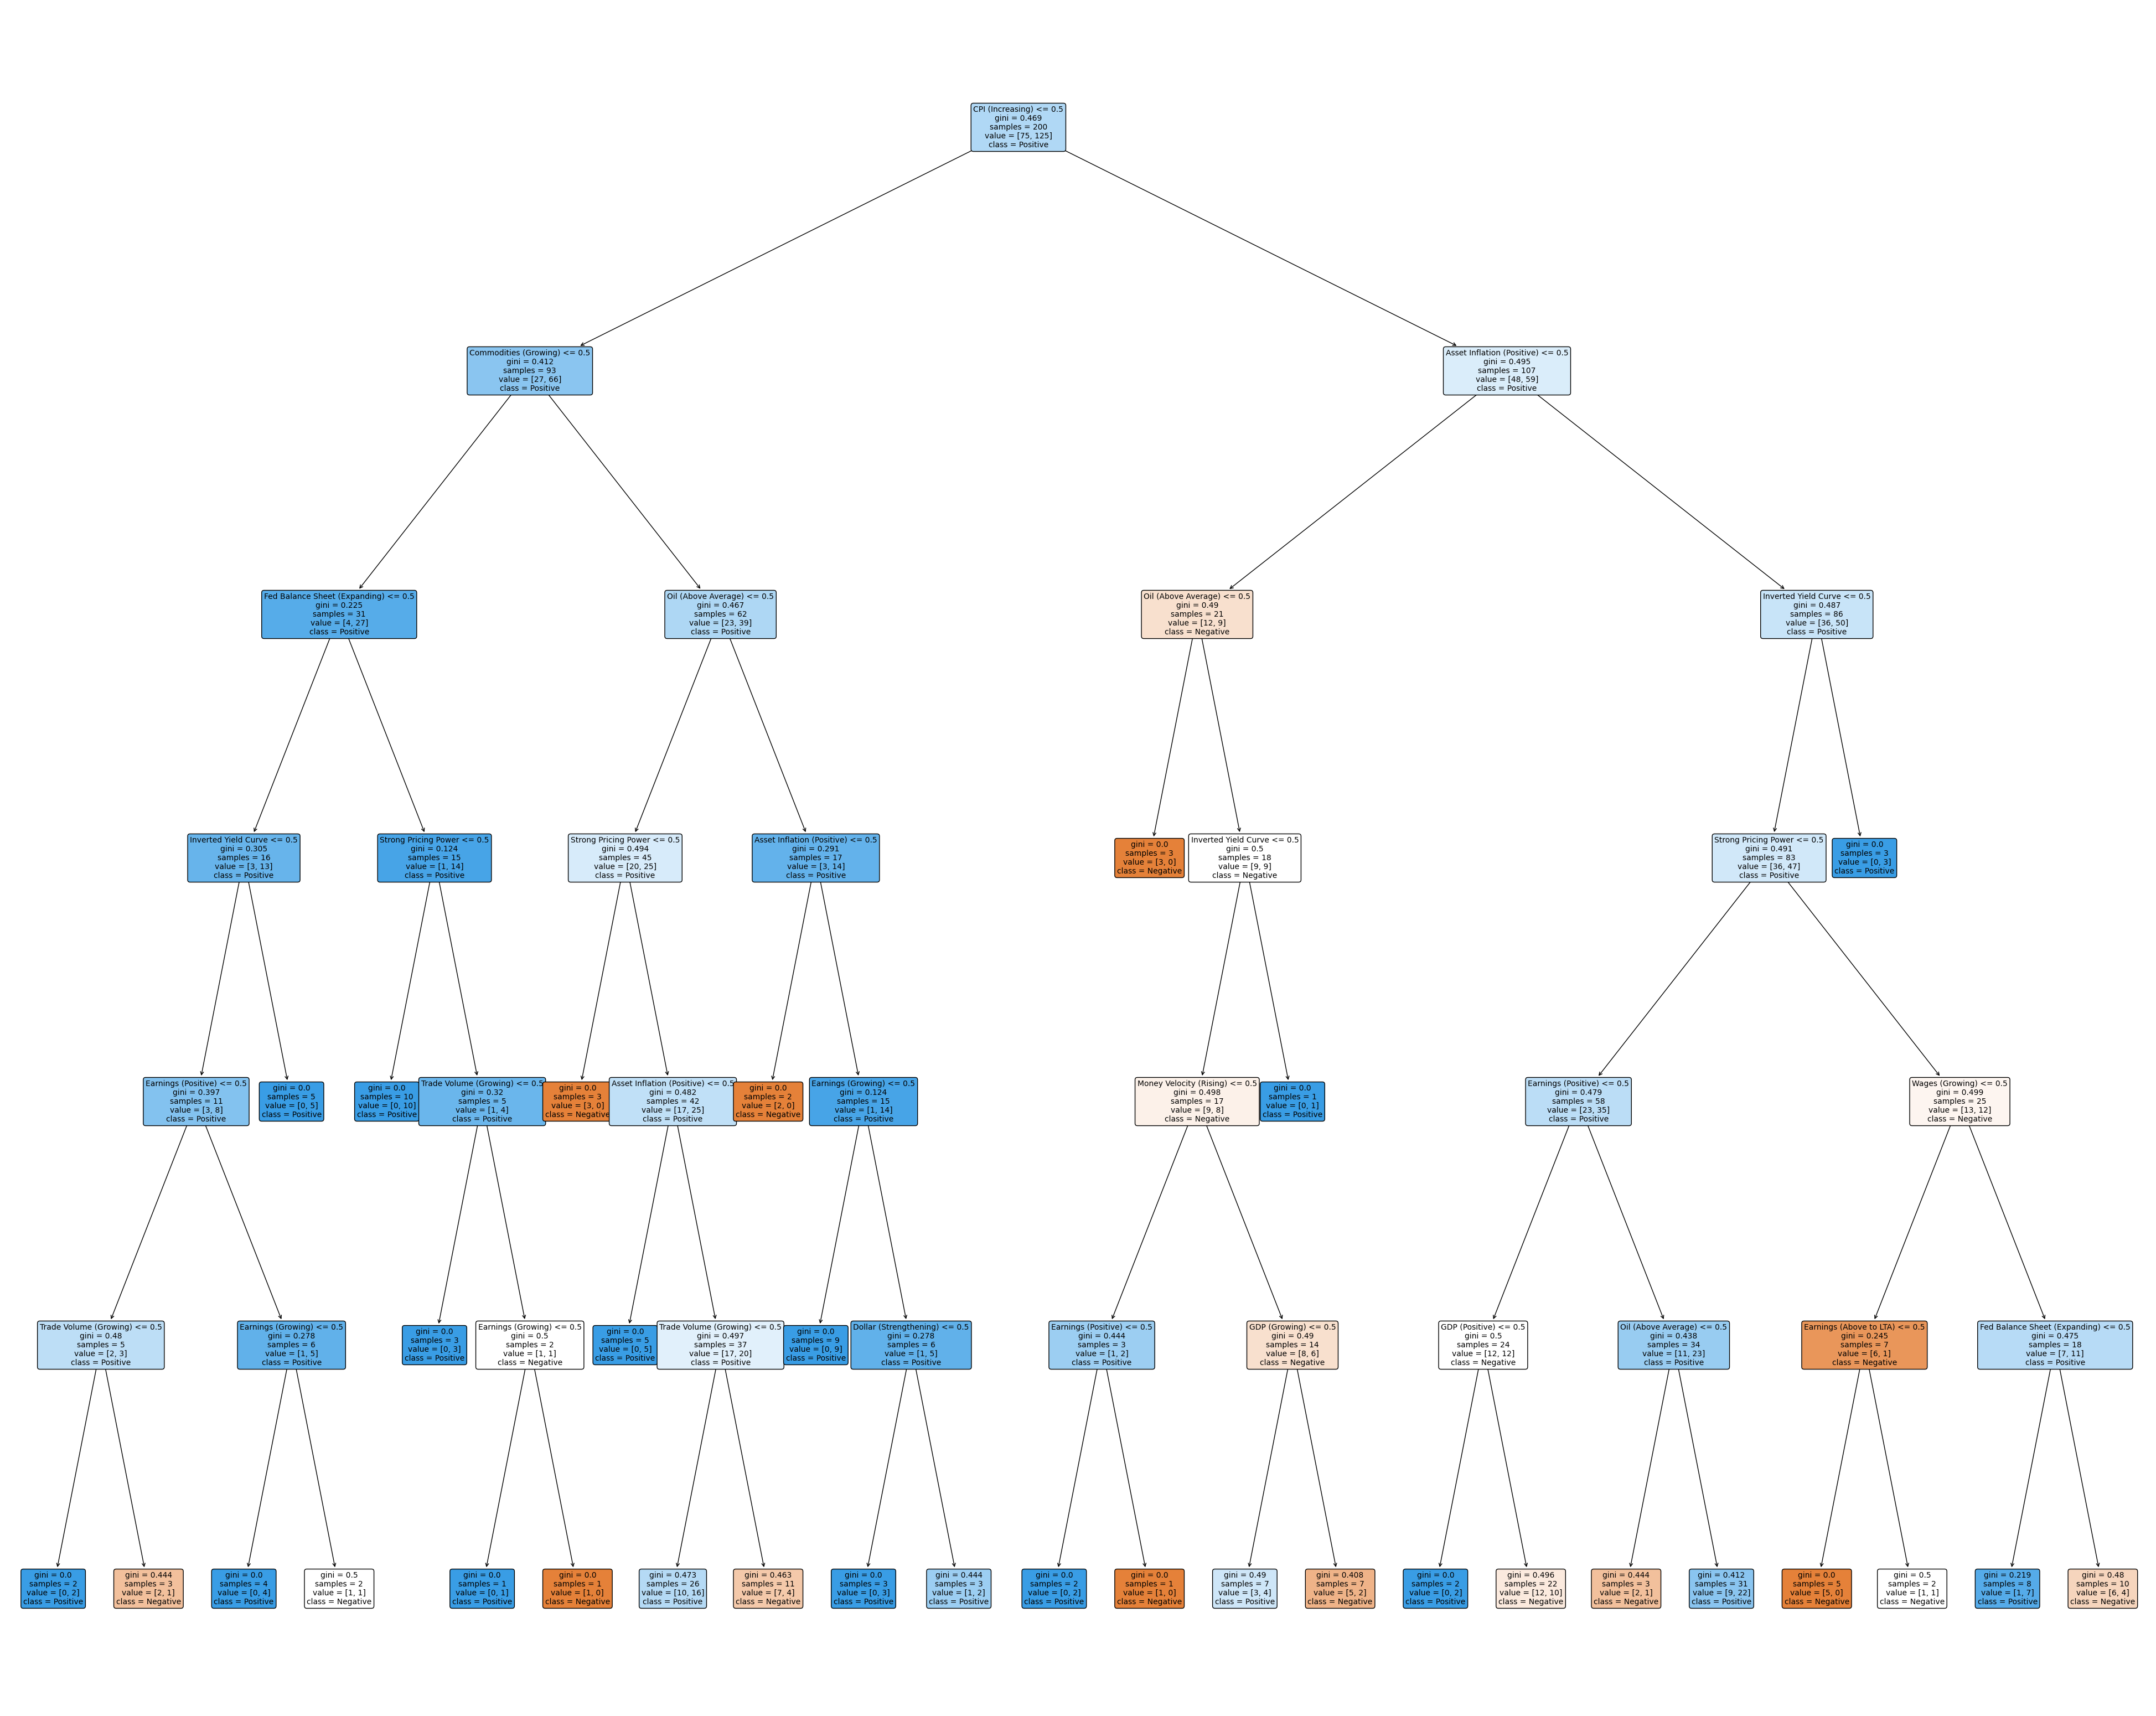

In [ ]:
# Set the size of the plot
plt.figure(figsize=(50, 40))

# Plot the decision tree
plot_tree(tree_classifier, feature_names=X.columns, class_names=['Negative', 'Positive'], filled=True, rounded=True, fontsize=10)

# plt.savefig("decision_tree.png", format='png', bbox_inches='tight')

# Show the plot
plt.show()


## predicted macro data-CART

In [ ]:
# Initialize an empty DataFrame to store feature importances
feature_importances_df2 = pd.DataFrame()

#accuracy for model performance
accuracy=[]

# correlation for model performance
correlation_scores = []

for col in range(len(return_fund_binary.columns)):

    # Merging based on index
    cart_data = df_macro_predict.merge(return_fund_binary.iloc[:,col], left_index=True, right_index=True)
    cart_data=cart_data.dropna()

    # Load  dataset and Splitting the data into features (X) and target variable (y)
    X = cart_data.iloc[:,:-1]
    y = cart_data.iloc[:,-1]

    # Splitting the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initializing the Decision Tree Classifier(max_depth=)
    tree_classifier = DecisionTreeClassifier(random_state=42)

    # Training the model on the training data
    tree_classifier.fit(X_train, y_train)

    # Making predictions on the testing data
    y_pred = tree_classifier.predict(X_test)

    # Evaluating the model's performance using classification metrics
    accuracy.append(accuracy_score(y_test, y_pred))

    # Evaluating the model's performance using correlation
    correlation_score = np.corrcoef(y_test, y_pred)[0, 1]
    correlation_scores.append(correlation_score)

    # Feature Importances
    feature_importances = tree_classifier.feature_importances_
    feature_importances_series = pd.Series(feature_importances, index=X.columns, name=return_fund_binary.columns[col])

    # Store feature importances in the DataFrame
    feature_importances_df2 = pd.concat([feature_importances_df2, feature_importances_series], axis=1)

# Assuming 'correlation_scores' is a list containing correlation scores for each fund
correlation_series = pd.Series(correlation_scores, index=feature_importances_df.columns, name='Correlation')

# Assuming 'accuracy' is a list containing accuracy scores for each fund
accuracy_series = pd.Series(accuracy, index=feature_importances_df2.columns, name='Accuracy')

# Append the accuracy scores to the DataFrame
feature_importances_df2 = pd.concat([feature_importances_df2, accuracy_series.to_frame().T, correlation_series.to_frame().T])

feature_importances_df2

ALBAX US Equity  ANCFX US Equity  \
Rates (Rising)                        0.047142         0.102707   
Dollar (Strengthening)                0.073232         0.058123   
GDP (Growing)                         0.068561         0.026741   
GDP (Positive)                        0.007308         0.023830   
CPI (Increasing)                      0.012321         0.123019   
Earnings (Above to LTA)               0.092543         0.080489   
Earnings (Growing)                    0.075266         0.121220   
Earnings (Positive)                   0.072775         0.050086   
Oil (Above Average)                   0.043218         0.029100   
Commodities (Growing)                 0.131180         0.022645   
Wages (Growing)                       0.063843         0.016780   
Strong Pricing Power                  0.056204         0.071867   
Trade Volume (Growing)                0.073704         0.080432   
Fed Balance Sheet (Expanding)         0.090533         0.115679   
Asset Inflation (Positive)            0.029385         0.019745   
Money Velocity (Rising)               0.024359         0.020399   
Inverted Yield Curve                  0.038426         0.037139   
Accuracy                              0.520000         0.620000   
Correlation                          -0.011976         0.214338   

                               BLPIX US Equity  DFELX US Equity  \
Rates (Rising)                        0.062383         0.059931   
Dollar (Strengthening)                0.060920         0.045687   
GDP (Growing)                         0.097276         0.086904   
GDP (Positive)                        0.006147         0.006165   
CPI (Increasing)                      0.038006         0.030489   
Earnings (Above to LTA)               0.044109         0.059933   
Earnings (Growing)                    0.093431         0.108577   
Earnings (Positive)                   0.083518         0.118483   
Oil (Above Average)                   0.091115         0.081074   
Commodities (Growing)                 0.076855         0.058080   
Wages (Growing)                       0.076091         0.080459   
Strong Pricing Power                  0.038574         0.040683   
Trade Volume (Growing)                0.084800         0.074670   
Fed Balance Sheet (Expanding)         0.038645         0.035960   
Asset Inflation (Positive)            0.039244         0.038470   
Money Velocity (Rising)               0.030051         0.045606   
Inverted Yield Curve                  0.038834         0.028829   
Accuracy                              0.580000         0.580000   
Correlation                           0.099577         0.121566   

                               DFUSX US Equity  DLQAX US Equity  \
Rates (Rising)                        0.062070         0.065136   
Dollar (Strengthening)                0.071699         0.055725   
GDP (Growing)                         0.101177         0.076121   
GDP (Positive)                        0.022667         0.012339   
CPI (Increasing)                      0.031836         0.032987   
Earnings (Above to LTA)               0.055754         0.049187   
Earnings (Growing)                    0.090902         0.108300   
Earnings (Positive)                   0.111470         0.145841   
Oil (Above Average)                   0.074611         0.048070   
Commodities (Growing)                 0.035479         0.036971   
Wages (Growing)                       0.048189         0.057599   
Strong Pricing Power                  0.062396         0.035636   
Trade Volume (Growing)                0.085978         0.102774   
Fed Balance Sheet (Expanding)         0.082023         0.039880   
Asset Inflation (Positive)            0.038543         0.095203   
Money Velocity (Rising)               0.021097         0.030552   
Inverted Yield Curve                  0.004110         0.007677   
Accuracy                              0.520000         0.500000   
Correlation                           0.042220        -0.013521   

        

Pie chart

In [ ]:
#predicted
feature_importances_df2=feature_importances_df2.drop(['Accuracy','Correlation'],axis=0)
# actual
feature_importances_df=feature_importances_df.drop(['Accuracy','Correlation'],axis=0)

In [ ]:
#total weight for each feature importance
sum_feature2=feature_importances_df2.sum(axis=1).sort_values(ascending=False)
sum_feature=feature_importances_df.sum(axis=1).sort_values(ascending=False)
sum_feature,sum_feature2

(Oil (Above Average)              9.784202
 Dollar (Strengthening)           8.521850
 CPI (Increasing)                 7.730697
 Commodities (Growing)            7.369349
 Earnings (Positive)              6.940351
 Asset Inflation (Positive)       6.422785
 GDP (Growing)                    5.400128
 Earnings (Above to LTA)          4.990737
 Rates (Rising)                   4.854080
 Strong Pricing Power             4.788026
 Trade Volume (Growing)           4.213507
 Wages (Growing)                  4.133415
 Money Velocity (Rising)          4.098441
 Fed Balance Sheet (Expanding)    4.041478
 Inverted Yield Curve             3.067177
 Earnings (Growing)               2.529765
 GDP (Positive)                   2.114012
 dtype: float64,
 Earnings (Positive)              9.149683
 GDP (Growing)                    8.388279
 Earnings (Growing)               8.025600
 Trade Volume (Growing)           7.945255
 Oil (Above Average)              6.553830
 Fed Balance Sheet (Expanding)    5.9

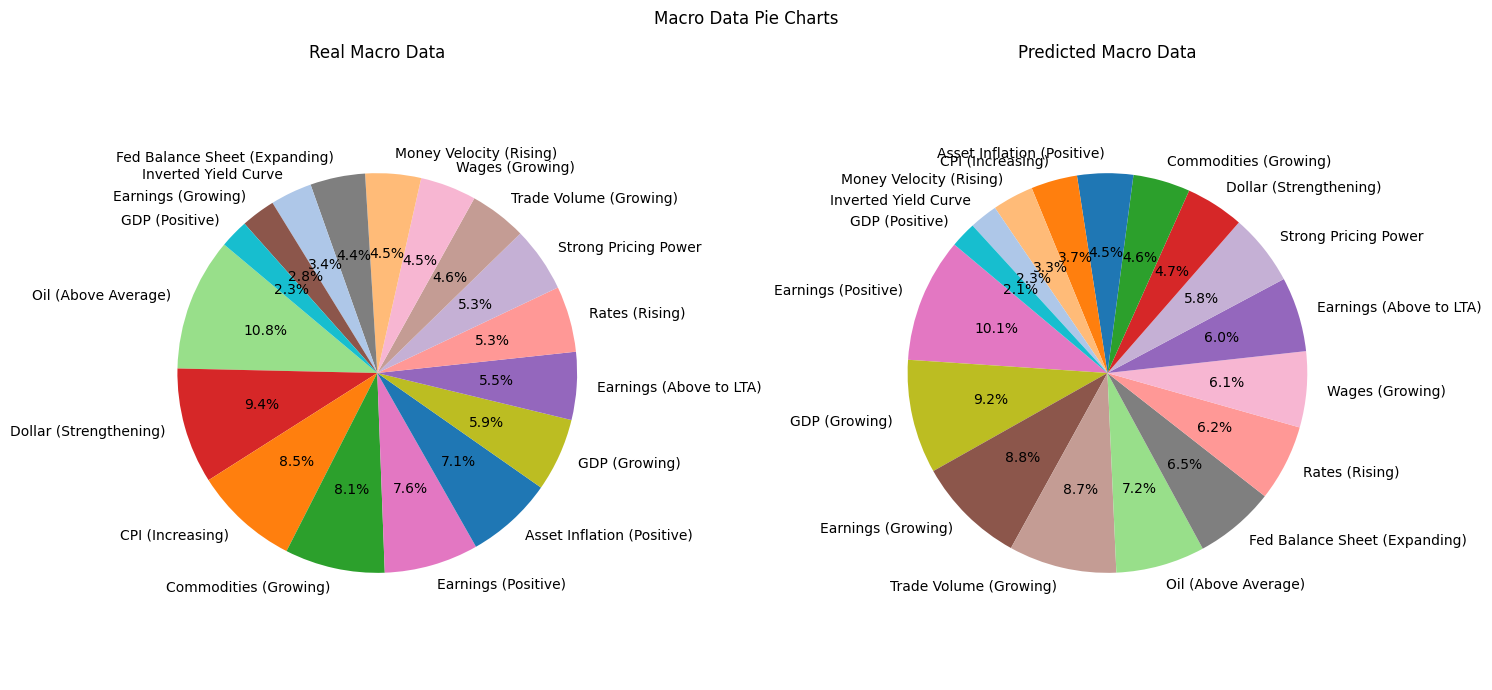

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Manually define a set of distinct colors
distinct_colors = [
    '#1f77b4',  # Muted blue
    '#ff7f0e',  # Safety orange
    '#2ca02c',  # Cooked asparagus green
    '#d62728',  # Brick red
    '#9467bd',  # Muted purple
    '#8c564b',  # Chestnut brown
    '#e377c2',  # Raspberry yogurt pink
    '#7f7f7f',  # Middle gray
    '#bcbd22',  # Curry yellow-green
    '#17becf',  # Blue-teal
    '#aec7e8',  # Soft blue
    '#ffbb78',  # Melon orange
    '#98df8a',  # Pale green
    '#ff9896',  # Soft red
    '#c5b0d5',  # Light purple
    '#c49c94',  # Pale brown
    '#f7b6d2'   # Pink
]

# Identify all unique categories across both datasets and ensure we have enough colors
all_categories = sorted(set(sum_feature.index) | set(sum_feature2.index))
if len(all_categories) > len(distinct_colors):
    raise ValueError("Not enough distinct colors for the number of categories")

# Create a color map for all categories
color_map = dict(zip(all_categories, distinct_colors))


# Map colors according to the category
colors1 = [color_map[category] for category in sum_feature.index]
colors2 = [color_map[category] for category in sum_feature2.index]

# Create a larger figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Pie chart 1
axes[0].pie(sum_feature, labels=sum_feature.index, autopct='%1.1f%%', startangle=140, colors=colors1)
axes[0].set_title('Real Macro Data')
axes[0].axis('equal')

# Pie chart 2
axes[1].pie(sum_feature2, labels=sum_feature2.index, autopct='%1.1f%%', startangle=140, colors=colors2)
axes[1].set_title('Predicted Macro Data')
axes[1].axis('equal')

# Adding a main title
plt.suptitle('Macro Data Pie Charts')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot to a file
plt.savefig('PredictedMacro_ pie_chart.png')

# Display the charts
plt.show()

from google.colab import files
files.download('PredictedMacro_ pie_chart.png')

# CART Model Regression

In [ ]:
file_path = '/content/drive/MyDrive/AFP project/Fund Universe.xlsx'
tab_name = 'Monthly Total Return'

return_total= pd.read_excel(file_path, sheet_name=tab_name, header=4)

return_total = return_total.rename(columns={'Unnamed: 0': 'Date'})
return_total['Date']=pd.to_datetime(return_total['Date']).dt.to_period('M')
return_total = return_total.set_index('Date')

return_total = return_total.drop(return_total.index[0])

## Train Test Data

In [ ]:
df_combined = pd.concat([data_classification, return_total], axis=1)
df_combined = df_combined.dropna()
df_arma = pd.concat([df_macro_predict, return_total], axis=1)
df_arma = df_arma.dropna()
equity_fund_columns = return_total.columns
df_combined.reset_index(inplace=True)
df_train = df_combined[df_combined['Date'] < '2015-06-30']
df_train = df_train.set_index('Date')
X_Train = df_train.iloc[:, :17]
y_Train = df_train.iloc[:, 17:]

df_arma.reset_index(inplace=True)
df_test = df_arma[df_arma['Date'] >= '2015-06-30']
df_test = df_test.set_index('Date')
X_Test = df_test.iloc[:, :17]
y_Test = df_test.iloc[:, 17:]

## CART

In [ ]:
df_combined = pd.concat([data_classification, return_total], axis=1)
df_combined = df_combined.dropna()

models = {}
mse_dict = {}
predicted = {}
# Loop over each equity fund
for fund in equity_fund_columns:

    X_train = X_Train
    y_train = y_Train[fund]

    X_test = X_Test
    y_test = y_Test[fund]

    # Initializing the Decision Tree Classifier
    model = DecisionTreeRegressor(max_depth = 6,random_state=40)


    # Training the model on the training data
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_dict[fund] = mse

    # Store the model
    models[fund] = model
    predicted[fund] = y_pred

df_predicted = pd.DataFrame(predicted, index = df_combined.index[-100:])
df_predicted_SPX = df_predicted.iloc[:, :1]  # Select the first column
df_predicted = df_predicted.iloc[:, 1:]  # Select the rest of the columns
df_predictedCART = df_predicted
mse_CART = sum(mse_dict.values())
print(f"Sum of MSE for all funds CART model: {mse_CART}")

Sum of MSE for all funds CART model: 0.4897161823964049


#### CART Graph

<ipython-input-50-e5da1b553cb5>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CART_Regression['SPX Index'] = cumulative_SPX


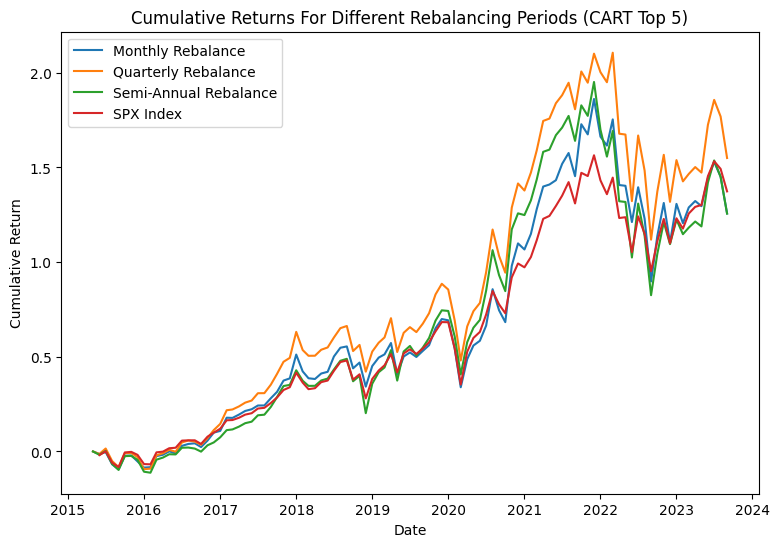

In [ ]:
CART_Regression = pd.DataFrame()
# Monthly Rebalance (m = 1)
cumulative_returns_monthly = []
portfolio_monthly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
for i in range(0, len(df_predictedCART.index), 1):
    dates_monthly = df_predictedCART.index[i:i+1]
    top_performing_funds_monthly = df_predictedCART.loc[dates_monthly[-1]].nlargest(5).index
    weights_monthly = np.arange(1, 5 + 1)[::-1] / sum(np.arange(1, 5 + 1))
    portfolio_monthly.loc[dates_monthly, top_performing_funds_monthly] = weights_monthly
portfolio_returns_monthly = (portfolio_monthly * df_combined[equity_fund_columns]).sum(axis=1)
cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod() - 1

# Quarterly Rebalance (m = 3)
cumulative_returns_quarterly = []
portfolio_quarterly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
for i in range(0, len(df_predictedCART.index), 3):
    dates_quarterly = df_predictedCART.index[i:i+3]
    top_performing_funds_quarterly = df_predictedCART.loc[dates_quarterly[-1]].nlargest(5).index
    weights_quarterly = np.arange(1, 5 + 1)[::-1] / sum(np.arange(1, 5 + 1))
    portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = weights_quarterly
portfolio_returns_quarterly = (portfolio_quarterly * df_combined[equity_fund_columns]).sum(axis=1)
cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod() - 1

# Semi-Annual Rebalance (m = 6)
cumulative_returns_semi_annual = []
portfolio_semi_annual = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
for i in range(0, len(df_predictedCART.index), 6):
    dates_semi_annual = df_predictedCART.index[i:i+6]
    top_performing_funds_semi_annual = df_predictedCART.loc[dates_semi_annual[-1]].nlargest(5).index
    weights_semi_annual = np.arange(1, 5 + 1)[::-1] / sum(np.arange(1, 5 + 1))
    portfolio_semi_annual.loc[dates_semi_annual, top_performing_funds_semi_annual] = weights_semi_annual
portfolio_returns_semi_annual = (portfolio_semi_annual * df_combined[equity_fund_columns]).sum(axis=1)
cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod() - 1

# Fill the CART_Regression DataFrame
CART_Regression['Monthly Rebalance'] = cumulative_returns_monthly
CART_Regression['Quarterly Rebalance'] = cumulative_returns_quarterly
CART_Regression['Semi-Annual Rebalance'] = cumulative_returns_semi_annual
CART_Regression = CART_Regression[-101:]
cumulative_SPX = (1+return_fund[return_fund.index>='2015-06']['SPX Index']).cumprod() - 1
CART_Regression['SPX Index'] = cumulative_SPX

plt.figure(figsize=(9, 6))

# Plot each column (cumulative returns)

CART_Regression.index = CART_Regression.index.to_timestamp()

for column in CART_Regression.columns:
    plt.plot(CART_Regression.index, CART_Regression[column], label=column)

# Set labels and title
plt.title('Cumulative Returns For Different Rebalancing Periods (CART Top 5)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

plt.legend()

plt.savefig('cum_ret_diff_rebalance.png')

# Show the plot
plt.show()

# Download the file to your local machine
#files.download('cum_ret_diff_rebalance.png')

               Top 1     Top 3     Top 5    Top 10    Top 20    Top 91  \
Date                                                                     
2015-05-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2015-06-01 -0.017520 -0.013652 -0.013896 -0.014049 -0.015700 -0.018653   
2015-07-01 -0.008555 -0.004157 -0.002814 -0.000823 -0.001340 -0.000276   
2015-08-01 -0.069876 -0.069985 -0.067887 -0.064810 -0.063180 -0.061972   
2015-09-01 -0.098703 -0.095285 -0.094763 -0.094394 -0.092042 -0.088290   
...              ...       ...       ...       ...       ...       ...   
2023-05-01  1.494170  1.449536  1.295585  1.198418  1.122686  1.164604   
2023-06-01  1.640673  1.606489  1.443985  1.362178  1.276610  1.309488   
2023-07-01  1.716939  1.683258  1.528942  1.446223  1.354506  1.386164   
2023-08-01  1.608293  1.586272  1.451250  1.385822  1.305231  1.345670   
2023-09-01  1.347603  1.349467  1.257257  1.231445  1.174241  1.229897   

            SPX Index  
Date         

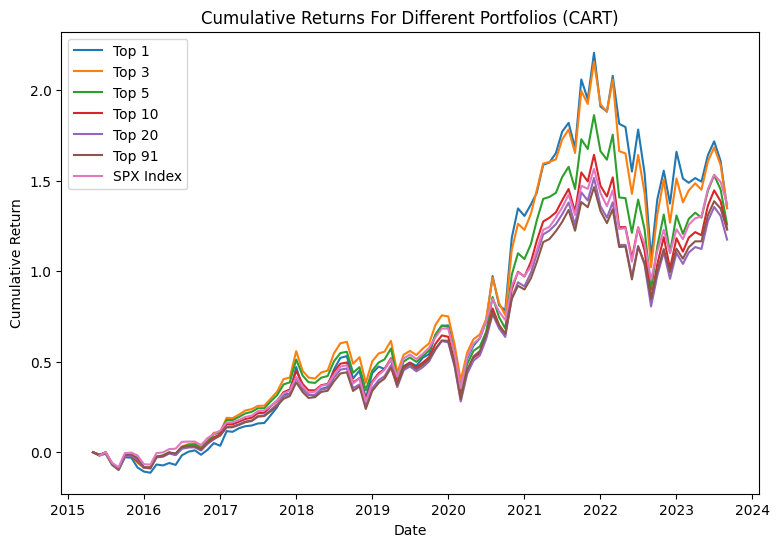

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Assuming df_combined is your DataFrame and df_predictedCART is your prediction DataFrame
equity_fund_columns = df_combined.columns
top_n_values = [1, 3, 5, 10, 20, 91]

CART_Regression = pd.DataFrame()

for top_n in top_n_values:
    cumulative_returns = []
    portfolio = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)

    for i in range(0, len(df_predictedCART.index), 1):
        dates = df_predictedCART.index[i:i+1]
        top_performing_funds = df_predictedCART.loc[dates[-1]].nlargest(top_n).index
        weights = np.arange(1, top_n + 1)[::-1] / sum(np.arange(1, top_n + 1))
        portfolio.loc[dates, top_performing_funds] = weights

    portfolio_returns = (portfolio * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns = (1 + portfolio_returns).cumprod() - 1

    CART_Regression[f'Top {top_n}'] = cumulative_returns

cumulative_SPX = (1+return_fund[return_fund.index>='2015-06']['SPX Index']).cumprod() - 1
CART_Regression['SPX Index'] = cumulative_SPX
# Display the result_df
CART_Regression = CART_Regression[-101:]

plt.figure(figsize=(9, 6))
CART_Regression.index = CART_Regression.index.to_timestamp()
print(CART_Regression)
for column in CART_Regression.columns:
    plt.plot(CART_Regression.index, CART_Regression[column], label=column)

# Set labels and title
plt.title('Cumulative Returns For Different Portfolios (CART)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

plt.legend()

plt.savefig('cum_ret_diff_rebalance.png')

# Show the plot
plt.show()

# Download the file to your local machine
files.download('cum_ret_diff_rebalance.png')


all 6 portfolios

                CART  Random Forest   XGBoost  SPX Index
Date                                                    
2015-06-01 -0.019559      -0.023078 -0.020287  -0.019358
2015-07-01 -0.002250       0.002588  0.009493   0.001191
2015-08-01 -0.063299      -0.081748 -0.057780  -0.059228
2015-09-01 -0.085648      -0.106449 -0.081139  -0.082502
2015-10-01 -0.011897      -0.033565 -0.009977  -0.005109
...              ...            ...       ...        ...
2023-05-01  1.121617       1.325143  1.771321   1.301850
2023-06-01  1.248555       1.562311  2.055086   1.453942
2023-07-01  1.323864       1.688561  2.205329   1.532775
2023-08-01  1.286216       1.602783  2.111114   1.492449
2023-09-01  1.181081       1.403765  1.867217   1.373612

[100 rows x 4 columns]


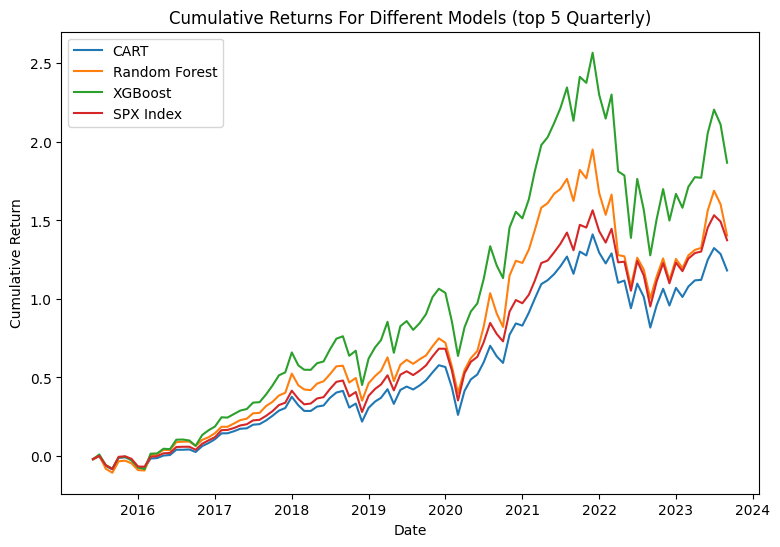

In [ ]:
df3 = pd.DataFrame(index=df_predictedCARTt.index)
column_names = ['CART', 'Random Forest', 'XGBoost']
pred_dataframe=[df_predictedCARTt,df_predictedRF,df_predictedXGBt]
result=[]
x=0
# Quarterly Rebalance (m = 3)
for df in pred_dataframe:
  portfolio_returns_all_quarterly = []
  portfolio_quarterly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
  for i in range(0, len(df.index), 3):
      dates_quarterly = df.index[i:i+3]
      top_performing_funds_quarterly = df.loc[dates_quarterly[-1]].nlargest(5).index
      weights_quarterly = np.arange(1, 5 + 1)[::-1] / sum(np.arange(1, 5 + 1))
      portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = weights_quarterly
  portfolio_returns_quarterly = (portfolio_quarterly * df_combined[equity_fund_columns]).sum(axis=1)
  cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod() - 1
  cumulative_returns_quarterly = cumulative_returns_quarterly[-100:]
  df3[column_names[x]]=cumulative_returns_quarterly
  x+=1

cumulative_SPX = (1+return_fund[return_fund.index>='2015-06']['SPX Index']).cumprod() - 1
df3['SPX Index'] = cumulative_SPX

plt.figure(figsize=(9, 6))
df3.index = df3.index.to_timestamp()
print(df3)
for column in df3.columns:
    plt.plot(df3.index, df3[column], label=column)

# Set labels and title
plt.title('Cumulative Returns For Different Models (top 5 Quarterly)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

plt.legend()

plt.savefig('cum_ret_diff_rebalance.png')

# Show the plot
plt.show()

# Download the file to your local machine
#files.download('cum_ret_diff_rebalance.png')

CART  Random Forest   XGBoost
Date                                      
2015-06  0.980441       0.976922  0.979713
2015-07  0.997750       1.002588  1.009493
2015-08  0.936701       0.918252  0.942220
2015-09  0.914352       0.893551  0.918861
2015-10  0.988103       0.966435  0.990023
...           ...            ...       ...
2023-05  2.121617       2.325143  2.771321
2023-06  2.248555       2.562311  3.055086
2023-07  2.323864       2.688561  3.205329
2023-08  2.286216       2.602783  3.111114
2023-09  2.181081       2.403765  2.867217

[100 rows x 3 columns]

In [ ]:
# Monthly Rebalance (m = 1) for Random Forest
cumulative_returns_monthly_RF = []
portfolio_monthly_RF = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
for i in range(0, len(df_predictedRF.index), 1):
    dates_monthly_RF = df_predictedRF.index[i:i+1]
    top_performing_funds_monthly_RF = df_predictedRF.loc[dates_monthly_RF[-1]].nlargest(5).index
    weights_monthly_RF = np.arange(1, 5 + 1)[::-1] / sum(np.arange(1, 5 + 1))
    portfolio_monthly_RF.loc[dates_monthly_RF, top_performing_funds_monthly_RF] = weights_monthly_RF

portfolio_monthly_RF = (portfolio_monthly_RF * df_combined[equity_fund_columns]).sum(axis=1)
cumulative_returns_monthly_RF = (1 + portfolio_monthly_RF).cumprod() - 1
df_predictedRF = pd.DataFrame({'Monthly Rebalance': cumulative_returns_monthly_RF})

ValueError: ignored

In [ ]:
dates_monthly_RF

Date
2003-01    0.000000
2003-02    0.000000
2003-03    0.000000
2003-04    0.000000
2003-05    0.000000
             ...   
2023-05    0.005624
2023-06    0.063280
2023-07    0.030442
2023-08   -0.031905
2023-09   -0.076464
Freq: M, Length: 249, dtype: float64

equal weight on selected funds

CART model weight by rank


In [ ]:
result_df = pd.DataFrame(index=range(1, 92), columns=['Monthly Rebalance', 'Quarterly Rebalance', 'Semi-Annual Rebalance'])

for top_n in range(1, 92):
    # Monthly Rebalance (m = 1)
    portfolio_returns_all_monthly = []
    portfolio_monthly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedCART.index), 1):
        dates_monthly = df_predictedCART.index[i:i+1]
        top_performing_funds_monthly = df_predictedCART.loc[dates_monthly[-1]].nlargest(top_n).index
        weights_monthly = np.arange(1, top_n + 1)[::-1] / sum(np.arange(1, top_n + 1))
        portfolio_monthly.loc[dates_monthly, top_performing_funds_monthly] = weights_monthly
    portfolio_returns_monthly = (portfolio_monthly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod() - 1
    portfolio_returns_all_monthly.append(cumulative_returns_monthly.iloc[-1])

    # Quarterly Rebalance (m = 3)
    portfolio_returns_all_quarterly = []
    portfolio_quarterly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedCART.index), 3):
        dates_quarterly = df_predictedCART.index[i:i+3]
        top_performing_funds_quarterly = df_predictedCART.loc[dates_quarterly[-1]].nlargest(top_n).index
        weights_quarterly = np.arange(1, top_n + 1)[::-1] / sum(np.arange(1, top_n + 1))
        portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = weights_quarterly
    portfolio_returns_quarterly = (portfolio_quarterly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod() - 1
    portfolio_returns_all_quarterly.append(cumulative_returns_quarterly.iloc[-1])

    # Semi-Annual Rebalance (m = 6)
    portfolio_returns_all_semi_annual = []
    portfolio_semi_annual = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedCART.index), 6):
        dates_semi_annual = df_predictedCART.index[i:i+6]
        top_performing_funds_semi_annual = df_predictedCART.loc[dates_semi_annual[-1]].nlargest(top_n).index
        weights_semi_annual = np.arange(1, top_n + 1)[::-1] / sum(np.arange(1, top_n + 1))
        portfolio_semi_annual.loc[dates_semi_annual, top_performing_funds_semi_annual] = weights_semi_annual
    portfolio_returns_semi_annual = (portfolio_semi_annual * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod() - 1
    portfolio_returns_all_semi_annual.append(cumulative_returns_semi_annual.iloc[-1])

    # Assign the results to the DataFrame
    result_df.loc[top_n, 'Monthly Rebalance'] = portfolio_returns_all_monthly[-1]
    result_df.loc[top_n, 'Quarterly Rebalance'] = portfolio_returns_all_quarterly[-1]
    result_df.loc[top_n, 'Semi-Annual Rebalance'] = portfolio_returns_all_semi_annual[-1]

# Display the result_df
result_df


Monthly Rebalance Quarterly Rebalance Semi-Annual Rebalance
1           2.419755            2.969706              2.627095
2           2.361664            2.726888              2.512135
3           2.277229            2.601733              2.363033
4           2.200357             2.47772              2.274211
5           2.185346              2.4095              2.234656
..               ...                 ...                   ...
87          2.238152            2.245185              2.222273
88          2.238364            2.245384              2.222784
89          2.238524              2.2455              2.223168
90          2.238585            2.245459              2.223501
91          2.238641             2.24538              2.223868

[91 rows x 3 columns]

### CART Tuning

CART tuning

In [ ]:
models = {}
mse_dict = {}
predicted = {}

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 6, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Dictionary to store the best hyperparameters
best_params_dict = {}

# Loop over each equity fund
for fund in equity_fund_columns:
    X_train = X_Train
    y_train = y_Train[fund]
    X_test = X_Test
    y_test = y_Test[fund]

    # Initializing the Decision Tree Regressor
    model = DecisionTreeRegressor()

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    best_params_dict[fund] = best_params

    # Train the model with the best hyperparameters
    best_model = DecisionTreeRegressor(**best_params)
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_dict[fund] = mse

    # Store the best model
    models[fund] = best_model
    predicted[fund] = y_pred

    # Plot the best decision tree
    # plt.figure(figsize=(10, 6))
    # plot_tree(best_model, filled=True, feature_names=X_train.columns, rounded=True, fontsize=8)
    # plt.title(f'Best Decision Tree for {fund}')
    # plt.show()

# Print the best hyperparameters for each fund
#print("Best hyperparameters for each fund:")
#print(best_params_dict)

df_predicted = pd.DataFrame(predicted, index=df_combined.index[-100:])
df_predicted_SPX = df_predicted.iloc[:, :1]  # Select the first column
df_predicted = df_predicted.iloc[:, 1:]  # Select the rest of the columns
df_predictedCARTt = df_predicted
mse_CART = sum(mse_dict.values())
print(f"Sum of MSE for all funds CART model: {mse_CART}")

Sum of MSE for all funds CART model: 0.2686254167583986


In [ ]:
CART_Regression = pd.DataFrame(index=range(1, 92), columns=['Monthly Rebalance', 'Quarterly Rebalance', 'Semi-Annual Rebalance'])

for top_n in range(1, 92):
    # Monthly Rebalance (m = 1)
    portfolio_returns_all_monthly = []
    portfolio_monthly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedCARTt.index), 1):
        dates_monthly = df_predictedCARTt.index[i:i+1]
        top_performing_funds_monthly = df_predictedCARTt.loc[dates_monthly[-1]].nlargest(top_n).index
        portfolio_monthly.loc[dates_monthly, top_performing_funds_monthly] = 1 / len(top_performing_funds_monthly)
    portfolio_returns_monthly = (portfolio_monthly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod()
    portfolio_returns_all_monthly.append(cumulative_returns_monthly.iloc[-1])

    # Quarterly Rebalance (m = 3)
    portfolio_returns_all_quarterly = []
    portfolio_quarterly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedCARTt.index), 3):
        dates_quarterly = df_predictedCARTt.index[i:i+3]
        top_performing_funds_quarterly = df_predictedCARTt.loc[dates_quarterly[-1]].nlargest(top_n).index
        portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = 1 / len(top_performing_funds_quarterly)
    portfolio_returns_quarterly = (portfolio_quarterly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod()
    portfolio_returns_all_quarterly.append(cumulative_returns_quarterly.iloc[-1])

    # Semi-Annual Rebalance (m = 6)
    portfolio_returns_all_semi_annual = []
    portfolio_semi_annual = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedCARTt.index), 6):
        dates_semi_annual = df_predictedCARTt.index[i:i+6]
        top_performing_funds_semi_annual = df_predictedCARTt.loc[dates_semi_annual[-1]].nlargest(top_n).index
        portfolio_semi_annual.loc[dates_semi_annual, top_performing_funds_semi_annual] = 1 / len(top_performing_funds_semi_annual)
    portfolio_returns_semi_annual = (portfolio_semi_annual * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod()
    portfolio_returns_all_semi_annual.append(cumulative_returns_semi_annual.iloc[-1])

    # Assign the results to the DataFrame
    CART_Regression.loc[top_n, 'Monthly Rebalance'] = portfolio_returns_all_monthly[-1]
    CART_Regression.loc[top_n, 'Quarterly Rebalance'] = portfolio_returns_all_quarterly[-1]
    CART_Regression.loc[top_n, 'Semi-Annual Rebalance'] = portfolio_returns_all_semi_annual[-1]

# Display the result_df
CART_Regression


Monthly Rebalance Quarterly Rebalance Semi-Annual Rebalance
1           2.158982            2.245292               2.11008
2           2.344953            2.626129              2.410633
3            2.08106            2.457123               2.32848
4           2.316772            2.524928              2.272933
5           2.375122            2.576557              2.408246
..               ...                 ...                   ...
87          2.236795            2.245421              2.244937
88          2.239448            2.246102              2.246785
89          2.241436            2.244613              2.246834
90          2.244782            2.243791               2.24706
91           2.24143             2.24143               2.24143

[91 rows x 3 columns]

In [ ]:
CART_Regression = pd.DataFrame(index=range(1, 92), columns=['Monthly Rebalance', 'Quarterly Rebalance', 'Semi-Annual Rebalance'])

for top_n in range(1, 92):
    # Monthly Rebalance (m = 1)
    portfolio_returns_all_monthly = []
    portfolio_monthly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedCART.index), 1):
        dates_monthly = df_predictedCART.index[i:i+1]
        top_performing_funds_monthly = df_predictedCART.loc[dates_monthly[-1]].nlargest(top_n).index
        portfolio_monthly.loc[dates_monthly, top_performing_funds_monthly] = 1 / len(top_performing_funds_monthly)
    portfolio_returns_monthly = (portfolio_monthly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod()
    portfolio_returns_all_monthly.append(cumulative_returns_monthly.iloc[-1])

    # Quarterly Rebalance (m = 3)
    portfolio_returns_all_quarterly = []
    portfolio_quarterly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedCART.index), 3):
        dates_quarterly = df_predictedCART.index[i:i+3]
        top_performing_funds_quarterly = df_predictedCART.loc[dates_quarterly[-1]].nlargest(top_n).index
        portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = 1 / len(top_performing_funds_quarterly)
    portfolio_returns_quarterly = (portfolio_quarterly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod()
    portfolio_returns_all_quarterly.append(cumulative_returns_quarterly.iloc[-1])

    # Semi-Annual Rebalance (m = 6)
    portfolio_returns_all_semi_annual = []
    portfolio_semi_annual = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedCART.index), 6):
        dates_semi_annual = df_predictedCART.index[i:i+6]
        top_performing_funds_semi_annual = df_predictedCART.loc[dates_semi_annual[-1]].nlargest(top_n).index
        portfolio_semi_annual.loc[dates_semi_annual, top_performing_funds_semi_annual] = 1 / len(top_performing_funds_semi_annual)
    portfolio_returns_semi_annual = (portfolio_semi_annual * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod()
    portfolio_returns_all_semi_annual.append(cumulative_returns_semi_annual.iloc[-1])

    # Assign the results to the DataFrame
    CART_Regression.loc[top_n, 'Monthly Rebalance'] = portfolio_returns_all_monthly[-1]
    CART_Regression.loc[top_n, 'Quarterly Rebalance'] = portfolio_returns_all_quarterly[-1]
    CART_Regression.loc[top_n, 'Semi-Annual Rebalance'] = portfolio_returns_all_semi_annual[-1]

# Display the result_df
CART_Regression

Monthly Rebalance Quarterly Rebalance Semi-Annual Rebalance
1           1.998211            2.213496              2.212947
2           2.309324            2.547015              2.668312
3           2.498162            2.554971              2.516447
4           2.407338            2.495743              2.481875
5           2.438272             2.51097              2.486978
..               ...                 ...                   ...
87          2.240791            2.246883              2.241905
88          2.238563            2.244203              2.238572
89          2.237823            2.243614              2.239713
90          2.241455            2.242414              2.240346
91           2.24143             2.24143               2.24143

[91 rows x 3 columns]

## Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming data_classification, return_total, X_Train, y_Train, X_Test, and y_Test are defined

# Concatenate the data into df_combined
df_combined = pd.concat([data_classification, return_total], axis=1)

# Drop NaN values if any
df_combined = df_combined.dropna()

# Get the list of equity fund columns
equity_fund_columns = return_total.columns

# Dictionary to store models and Mean Squared Errors (MSE)
models = {}
mse_dict = {}
predicted = {}

# Hyperparameters for the RandomForestRegressor
n_estimators = 50
max_depth = 5
random_state = 42

# Loop over each equity fund
for fund in equity_fund_columns:
    # Split the data into features (X) and target variable (y)
    X_train = X_Train
    y_train = y_Train[fund]

    X_test = X_Test
    y_test = y_Test[fund]

    # Initialize the RandomForestRegressor with hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state
    )

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_dict[fund] = mse

    # Store the model
    models[fund] = model
    predicted[fund] = y_pred

df_predicted = pd.DataFrame(predicted, index=df_combined.index[-100:])
df_predicted_SPX = df_predicted.iloc[:, :1]  # Select the first column
df_predicted = df_predicted.iloc[:, 1:]  # Select the rest of the columns
df_predictedRF = df_predicted
mse_RF = sum(mse_dict.values())
print(f"Sum of MSE for RF model: {mse_RF}")

Sum of MSE for RF model: 0.2515132973796456


In [ ]:
result_RF = pd.DataFrame(index=range(1, 92), columns=['Monthly Rebalance', 'Quarterly Rebalance', 'Semi-Annual Rebalance'])

for top_n in range(1, 92):
    # Monthly Rebalance (m = 1)
    portfolio_returns_all_monthly = []
    portfolio_monthly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedRF.index), 1):
        dates_monthly = df_predictedRF.index[i:i+1]
        top_performing_funds_monthly = df_predictedRF.loc[dates_monthly[-1]].nlargest(top_n).index
        weights_monthly = np.arange(1, top_n + 1)[::-1] / sum(np.arange(1, top_n + 1))
        portfolio_monthly.loc[dates_monthly, top_performing_funds_monthly] = weights_monthly
    portfolio_returns_monthly = (portfolio_monthly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod()
    portfolio_returns_all_monthly.append(cumulative_returns_monthly.iloc[-1])

    # Quarterly Rebalance (m = 3)
    portfolio_returns_all_quarterly = []
    portfolio_quarterly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedRF.index), 3):
        dates_quarterly = df_predictedRF.index[i:i+3]
        top_performing_funds_quarterly = df_predictedRF.loc[dates_quarterly[-1]].nlargest(top_n).index
        weights_quarterly = np.arange(1, top_n + 1)[::-1] / sum(np.arange(1, top_n + 1))
        portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = weights_quarterly
    portfolio_returns_quarterly = (portfolio_quarterly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod()
    portfolio_returns_all_quarterly.append(cumulative_returns_quarterly.iloc[-1])

    # Semi-Annual Rebalance (m = 6)
    portfolio_returns_all_semi_annual = []
    portfolio_semi_annual = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedRF.index), 6):
        dates_semi_annual = df_predictedRF.index[i:i+6]
        top_performing_funds_semi_annual = df_predictedRF.loc[dates_semi_annual[-1]].nlargest(top_n).index
        weights_semi_annual = np.arange(1, top_n + 1)[::-1] / sum(np.arange(1, top_n + 1))
        portfolio_semi_annual.loc[dates_semi_annual, top_performing_funds_semi_annual] = weights_semi_annual
    portfolio_returns_semi_annual = (portfolio_semi_annual * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod()
    portfolio_returns_all_semi_annual.append(cumulative_returns_semi_annual.iloc[-1])

    # Assign the results to the DataFrame
    result_RF.loc[top_n, 'Monthly Rebalance'] = portfolio_returns_all_monthly[-1]
    result_RF.loc[top_n, 'Quarterly Rebalance'] = portfolio_returns_all_quarterly[-1]
    result_RF.loc[top_n, 'Semi-Annual Rebalance'] = portfolio_returns_all_semi_annual[-1]

# Display the result_df
result_RF

Monthly Rebalance Quarterly Rebalance Semi-Annual Rebalance
1           1.902427            2.132783              2.042586
2           2.070995            2.503671              2.292449
3           2.212635            2.593104              2.424236
4           2.300119            2.654323              2.404475
5           2.349752             2.68687              2.397505
..               ...                 ...                   ...
87          2.314894            2.310241              2.269244
88          2.313358            2.308945              2.268675
89          2.311705            2.307528              2.268031
90          2.310214            2.306136              2.267488
91          2.308702            2.304715              2.266924

[91 rows x 3 columns]

### Random Forest Tuning

In [ ]:

# Get the list of equity fund columns
equity_fund_columns = return_total.columns

# Dictionary to store models and Mean Squared Errors (MSE)
rf_models = {}
rf_mse_dict = {}
rf_predicted = {}

# Loop over each equity fund
for fund in equity_fund_columns:
    # Split the data into features (X) and target variable (y)
    X_train = X_Train
    y_train = y_Train[fund]

    X_test = X_Test
    y_test = y_Test[fund]

    # Initialize the RandomForestRegressor
    rf_model = RandomForestRegressor()

    # Define the hyperparameter grid for tuning
    rf_param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [3,5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    # Initialize RandomizedSearchCV
    rf_grid_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid,
                                        scoring='neg_mean_squared_error', n_iter=5, cv=3, random_state=42)

    # Fit the Random Forest model to the training data with hyperparameter tuning
    rf_grid_search.fit(X_train, y_train)

    # Get the best Random Forest model from the grid search
    best_rf_model = rf_grid_search.best_estimator_

    # Predict on the test set
    y_rf_pred = best_rf_model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    rf_mse = mean_squared_error(y_test, y_rf_pred)
    rf_mse_dict[fund] = rf_mse

    # Store the best Random Forest model
    rf_models[fund] = best_rf_model
    rf_predicted[fund] = y_rf_pred

# Access the best hyperparameters for each fund
best_rf_params_dict = {fund: rf_models[fund].get_params() for fund in equity_fund_columns}
print("Best hyperparameters for each fund (Random Forest):")
print(best_rf_params_dict)

# Create a DataFrame for predicted returns
df_predicted_rf = pd.DataFrame(rf_predicted, index=X_Test.index)
df_predicted_rf_SPX = df_predicted_rf.iloc[:, :1]  # Select the first column (SPX Index)
df_predicted_rf = df_predicted_rf.iloc[:, 1:]  # Select the rest of the columns

# Display the sum of MSE for the best Random Forest model
mse_rf_sum = sum(rf_mse_dict.values())
print(f"Sum of MSE for Random Forest model: {mse_rf_sum}")


Best hyperparameters for each fund (Random Forest):
{'SPX Index': {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}, 'ALBAX US Equity': {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}, 'ANCFX US Equity': {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None

In [ ]:
result_RF = pd.DataFrame(index=range(1, 92), columns=['Monthly Rebalance', 'Quarterly Rebalance', 'Semi-Annual Rebalance'])

for top_n in range(1, 92):
    # Monthly Rebalance (m = 1)
    portfolio_returns_all_monthly = []
    portfolio_monthly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedRF.index), 1):
        dates_monthly = df_predictedRF.index[i:i+1]
        top_performing_funds_monthly = df_predictedRF.loc[dates_monthly[-1]].nlargest(top_n).index
        weights_monthly = np.arange(1, top_n + 1)[::-1] / sum(np.arange(1, top_n + 1))
        portfolio_monthly.loc[dates_monthly, top_performing_funds_monthly] = weights_monthly
    portfolio_returns_monthly = (portfolio_monthly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod()
    portfolio_returns_all_monthly.append(cumulative_returns_monthly.iloc[-1])

    # Quarterly Rebalance (m = 3)
    portfolio_returns_all_quarterly = []
    portfolio_quarterly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedRF.index), 3):
        dates_quarterly = df_predictedRF.index[i:i+3]
        top_performing_funds_quarterly = df_predictedRF.loc[dates_quarterly[-1]].nlargest(top_n).index
        portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = 1 / len(top_performing_funds_quarterly)
    portfolio_returns_quarterly = (portfolio_quarterly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod()
    portfolio_returns_all_quarterly.append(cumulative_returns_quarterly.iloc[-1])

    # Semi-Annual Rebalance (m = 6)
    portfolio_returns_all_semi_annual = []
    portfolio_semi_annual = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedRF.index), 6):
        dates_semi_annual = df_predictedRF.index[i:i+6]
        top_performing_funds_semi_annual = df_predictedRF.loc[dates_semi_annual[-1]].nlargest(top_n).index
        weights_quarterly = np.arange(1, top_n + 1)[::-1] / sum(np.arange(1, top_n + 1))
        portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = weights_quarterly
    portfolio_returns_semi_annual = (portfolio_semi_annual * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod()
    portfolio_returns_all_semi_annual.append(cumulative_returns_semi_annual.iloc[-1])

    # Assign the results to the DataFrame
    result_RF.loc[top_n, 'Monthly Rebalance'] = portfolio_returns_all_monthly[-1]
    result_RF.loc[top_n, 'Quarterly Rebalance'] = portfolio_returns_all_quarterly[-1]
    result_RF.loc[top_n, 'Semi-Annual Rebalance'] = portfolio_returns_all_semi_annual[-1]

# Display the result_df
result_RF

Monthly Rebalance Quarterly Rebalance Semi-Annual Rebalance
1           1.902427            2.132783              2.042586
2           2.154367            2.701914              2.418607
3           2.358011            2.679132              2.556987
4           2.433773            2.744901              2.370421
5           2.449012            2.750191              2.379701
..               ...                 ...                   ...
87          2.248841            2.251813              2.239267
88          2.247348            2.253113              2.243867
89          2.239944            2.245876              2.239732
90          2.244604            2.244868              2.243273
91           2.24143             2.24143               2.24143

[91 rows x 3 columns]

## XGBoost

In [ ]:
# Assuming df_combined, return_total, and other necessary dataframes are defined

# Concatenate the data into df_combined
df_combined = pd.concat([data_classification, return_total], axis=1)

# Drop NaN values if any
df_combined = df_combined.dropna()

# Get the list of equity fund columns
equity_fund_columns = return_total.columns

# Dictionary to store models and Mean Squared Errors (MSE)
models = {}
mse_dict = {}
predicted = {}

# Loop over each equity fund
for fund in equity_fund_columns:
    # Split the data into features (X) and target variable (y)
    X_train = X_Train
    y_train = y_Train[fund]

    X_test = X_Test
    y_test = y_Test[fund]

    # Initialize the XGBRegressor
    model = XGBRegressor()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_dict[fund] = mse

    # Store the model
    models[fund] = model
    predicted[fund] = y_pred

df_predicted = pd.DataFrame(predicted, index=df_combined.index[-100:])
df_predicted_SPX = df_predicted.iloc[:, :1]  # Select the first column
df_predicted = df_predicted.iloc[:, 1:]  # Select the rest of the columns
df_predictedXGB = df_predicted
mse_XGB = sum(mse_dict.values())
print(f"Sum of MSE for XGB model: {mse_XGB}")


Sum of MSE for XGB model: 0.33239136935308283


In [ ]:
result_df = pd.DataFrame(index=range(1, 92), columns=['Monthly Rebalance', 'Quarterly Rebalance', 'Semi-Annual Rebalance'])

for top_n in range(1, 92):
    # Monthly Rebalance (m = 1)
    portfolio_returns_all_monthly = []
    portfolio_monthly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedXGB.index), 1):
        dates_monthly = df_predictedXGB.index[i:i+1]
        top_performing_funds_monthly = df_predictedXGB.loc[dates_monthly[-1]].nlargest(top_n).index
        portfolio_monthly.loc[dates_monthly, top_performing_funds_monthly] = 1 / len(top_performing_funds_monthly)
    portfolio_returns_monthly = (portfolio_monthly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod()
    portfolio_returns_all_monthly.append(cumulative_returns_monthly.iloc[-1])

    # Quarterly Rebalance (m = 3)
    portfolio_returns_all_quarterly = []
    portfolio_quarterly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedXGB.index), 3):
        dates_quarterly = df_predictedXGB.index[i:i+3]
        top_performing_funds_quarterly = df_predictedXGB.loc[dates_quarterly[-1]].nlargest(top_n).index
        portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = 1 / len(top_performing_funds_quarterly)
    portfolio_returns_quarterly = (portfolio_quarterly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod()
    portfolio_returns_all_quarterly.append(cumulative_returns_quarterly.iloc[-1])

    # Semi-Annual Rebalance (m = 6)
    portfolio_returns_all_semi_annual = []
    portfolio_semi_annual = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedXGB.index), 6):
        dates_semi_annual = df_predictedXGB.index[i:i+6]
        top_performing_funds_semi_annual = df_predictedXGB.loc[dates_semi_annual[-1]].nlargest(top_n).index
        portfolio_semi_annual.loc[dates_semi_annual, top_performing_funds_semi_annual] = 1 / len(top_performing_funds_semi_annual)
    portfolio_returns_semi_annual = (portfolio_semi_annual * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod()
    portfolio_returns_all_semi_annual.append(cumulative_returns_semi_annual.iloc[-1])

    # Assign the results to the DataFrame
    result_df.loc[top_n, 'Monthly Rebalance'] = portfolio_returns_all_monthly[-1]
    result_df.loc[top_n, 'Quarterly Rebalance'] = portfolio_returns_all_quarterly[-1]
    result_df.loc[top_n, 'Semi-Annual Rebalance'] = portfolio_returns_all_semi_annual[-1]

# Display the result_df
result_df

Monthly Rebalance Quarterly Rebalance Semi-Annual Rebalance
1           2.662649            2.012592               2.17599
2           2.461117            1.987872              2.192484
3           2.667492            2.159393              2.247661
4           2.506728            2.295765              2.177952
5           2.479027            2.297436              2.301911
..               ...                 ...                   ...
87          2.246633            2.261467              2.256598
88          2.239791            2.252069               2.24895
89          2.237009            2.245976              2.248108
90          2.244017            2.245176               2.24532
91           2.24143             2.24143               2.24143

[91 rows x 3 columns]

### XGBoost Tuning

In [ ]:
# Assuming df_combined, return_total, and other necessary dataframes are defined

# Concatenate the data into df_combined
df_combined = pd.concat([data_classification, return_total], axis=1)

# Drop NaN values if any
df_combined = df_combined.dropna()

# Get the list of equity fund columns
equity_fund_columns = return_total.columns

# Dictionary to store models and Mean Squared Errors (MSE)
models = {}
mse_dict = {}
predicted = {}

# Loop over each equity fund
for fund in equity_fund_columns:
    # Split the data into features (X) and target variable (y)
    X_train = X_Train
    y_train = y_Train[fund]

    X_test = X_Test
    y_test = y_Test[fund]

    # Initialize the XGBRegressor
    model = XGBRegressor()

    # Define the hyperparameter grid for tuning
    param_grid = {
        'n_estimators': [50,75],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1],
        'colsample_bytree': [0.8, 0.9,1 ],
    }

    # Initialize GridSearchCV
    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                       scoring='neg_mean_squared_error', n_iter=5, cv=3, random_state=42)

    # Fit the model to the training data with hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_dict[fund] = mse

    # Store the best model
    models[fund] = best_model
    predicted[fund] = y_pred

# Access the best hyperparameters for each fund
best_params_dict = {fund: models[fund].get_params() for fund in equity_fund_columns}
print("Best hyperparameters for each fund:")
print(best_params_dict)

df_predicted = pd.DataFrame(predicted, index=df_combined.index[-100:])
df_predicted_SPX = df_predicted.iloc[:, :1]  # Select the first column
df_predicted = df_predicted.iloc[:, 1:]  # Select the rest of the columns
df_predictedXGBt = df_predicted
mse_XGBt = sum(mse_dict.values())
print(f"Sum of MSE for XGBt model: {mse_XGBt}")


NameError: ignored

In [ ]:
result_df = pd.DataFrame(index=range(1, 92), columns=['Monthly Rebalance', 'Quarterly Rebalance', 'Semi-Annual Rebalance'])

for top_n in range(1, 92):
    # Monthly Rebalance (m = 1)
    portfolio_returns_all_monthly = []
    portfolio_monthly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedXGBt.index), 1):
        dates_monthly = df_predictedXGBt.index[i:i+1]
        top_performing_funds_monthly = df_predictedXGBt.loc[dates_monthly[-1]].nlargest(top_n).index
        portfolio_monthly.loc[dates_monthly, top_performing_funds_monthly] = 1 / len(top_performing_funds_monthly)
    portfolio_returns_monthly = (portfolio_monthly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod()
    portfolio_returns_all_monthly.append(cumulative_returns_monthly.iloc[-1])

    # Quarterly Rebalance (m = 3)
    portfolio_returns_all_quarterly = []
    portfolio_quarterly = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedXGBt.index), 3):
        dates_quarterly = df_predictedXGBt.index[i:i+3]
        top_performing_funds_quarterly = df_predictedXGBt.loc[dates_quarterly[-1]].nlargest(top_n).index
        portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = 1 / len(top_performing_funds_quarterly)
    portfolio_returns_quarterly = (portfolio_quarterly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod()
    portfolio_returns_all_quarterly.append(cumulative_returns_quarterly.iloc[-1])

    # Semi-Annual Rebalance (m = 6)
    portfolio_returns_all_semi_annual = []
    portfolio_semi_annual = pd.DataFrame(index=df_combined.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictedXGBt.index), 6):
        dates_semi_annual = df_predictedXGBt.index[i:i+6]
        top_performing_funds_semi_annual = df_predictedXGBt.loc[dates_semi_annual[-1]].nlargest(top_n).index
        portfolio_semi_annual.loc[dates_semi_annual, top_performing_funds_semi_annual] = 1 / len(top_performing_funds_semi_annual)
    portfolio_returns_semi_annual = (portfolio_semi_annual * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod()
    portfolio_returns_all_semi_annual.append(cumulative_returns_semi_annual.iloc[-1])

    # Assign the results to the DataFrame
    result_df.loc[top_n, 'Monthly Rebalance'] = portfolio_returns_all_monthly[-1]
    result_df.loc[top_n, 'Quarterly Rebalance'] = portfolio_returns_all_quarterly[-1]
    result_df.loc[top_n, 'Semi-Annual Rebalance'] = portfolio_returns_all_semi_annual[-1]

# Display the result_df
result_df[0:20]

Monthly Rebalance Quarterly Rebalance Semi-Annual Rebalance
1           2.466813            2.740694              2.927336
2           2.817008            2.724262              2.524899
3           2.792846            2.950204              2.628808
4           2.596765            2.903696              2.710221
5           2.484409            2.850794              2.737586
6           2.526345            2.806011              2.720198
7           2.514858            2.732272              2.637432
8            2.47904            2.607122              2.549756
9           2.442764            2.544311              2.495754
10          2.420795            2.490085              2.493096
11          2.421467            2.451314              2.487694
12          2.440325            2.427531              2.485532
13          2.424268            2.432253              2.452151
14          2.410739            2.436262               2.44191
15          2.384425            2.433485              2.437081
16          2.395313            2.415382              2.398656
17           2.38359            2.419477              2.389064
18           2.38002             2.40458              2.360165
19           2.37621            2.388188               2.35769
20          2.369982            2.381474               2.36447

# CART Classification

## Train Test Data

In [ ]:
df_combined2 = pd.concat([data_classification, return_fund_binary], axis=1)
df_combined2 = df_combined2.dropna()
df_arma = pd.concat([df_macro_predict, return_fund_binary], axis=1)
df_arma = df_arma.dropna()
equity_fund_columns = return_fund_binary.columns
df_combined2.reset_index(inplace=True)
df_train = df_combined2[df_combined2['Date'] < '2015-06-30']
df_train = df_train.set_index('Date')
X_Train = df_train.iloc[:, :17]
y_Train = df_train.iloc[:, 17:]

df_arma.reset_index(inplace=True)
df_test = df_arma[df_arma['Date'] >= '2015-06-30']
df_test = df_test.set_index('Date')
X_Test = df_test.iloc[:, :17]
y_Test = df_test.iloc[:, 17:]

## CART

In [ ]:
df_combined2 = pd.concat([data_classification, return_fund_binary], axis=1)
df_combined2 = df_combined2.dropna()

accuracy=[]

predict = {}

for fund in equity_fund_columns:

    # Load  dataset and Splitting the data into features (X) and target variable (y)
    X_train = X_Train
    y_train = y_Train[fund]

    X_test = X_Test
    y_test = y_Test[fund]

    # Initializing the Decision Tree Classifier(max_depth=)
    tree_classifier = DecisionTreeClassifier(max_depth = 6,random_state=42)

    # Training the model on the training data
    tree_classifier.fit(X_train, y_train)

    # Making predictions on the testing data
    y_pred = tree_classifier.predict(X_test)

    predict[fund] = y_pred

    # Evaluating the model's performance using classification metrics
    accuracy.append(accuracy_score(y_test, y_pred))

accuracy_series_CART = pd.Series(accuracy, index=return_fund_binary.columns, name='Accuracy')
accuracy_series_CART
print('Accuracy for CART is' ,accuracy_series_CART.mean())
df_predictCART = pd.DataFrame(predict, index = df_combined2.index[-100:])
df_predictCART


Accuracy for CART is 0.5439560439560439


ALBAX US Equity  ANCFX US Equity  BLPIX US Equity  DFELX US Equity  \
Date                                                                          
2015-06                0                0                0                0   
2015-07                0                0                0                0   
2015-08                0                0                0                0   
2015-09                0                0                0                0   
2015-10                0                0                0                0   
...                  ...              ...              ...              ...   
2023-05                1                1                1                1   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                1                1                1                1   
2023-09                1                1                1                1   

         DFUSX US Equity  DLQAX US Equity  DREVX US Equity  DRIPX US Equity  \
Date                                                                          
2015-06                0                1                0                0   
2015-07                0                0                0                1   
2015-08                0                1                0                0   
2015-09                0                1                0                0   
2015-10                0                0                0                1   
...                  ...              ...              ...              ...   
2023-05                1                1                1                1   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                1                1                1                1   
2023-09                1                1                1                1   

         DRTHX US Equity  DSPIX US Equity  ...  ULPIX US Equity  \
Date                                       ...                    
2015-06                0                0  ...                0   
2015-07                0                0  ...                0   
2015-08                1                0  ...                1   
2015-09                0                0  ...                0   
2015-10                0                0  ...                0   
...                  ...              ...  ...              ...   
2023-05                1                1  ...                1   
2023-06                1                1  ...                1   
2023-07                1                1  ...                1   
2023-08                1                1  ...                1   
2023-09                1                1  ...                1   

         USSPX US Equity  VADAX US Equity  VFINX US Equity  VINIX US Equity  \
Date                                                                          
2015-06                0                1                0                0   
2015-07                0                1                0                0   
2015-08                0                1                0                0   
2015-09                0                1                0                0   
2015-10                0                0                0                0   
...                  ...              ...              ...              ...   
2023-05                1                1                1                1   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                1                1                1                1   
2023-09                1                1                1                1   

         VOLMX US Equity  VQNPX US Equity  WFILX US E

In [ ]:
portfolio_returns_all = []
std_dev_list = []

df_predicted_returns = pd.DataFrame(df_predictCART, index=df_predictCART.index)

portfolio = pd.DataFrame(index=df_predictCART.index, columns=equity_fund_columns)

for i in range(0, len(df_predictCART.index), 1):
    dates = df_predictCART.index[i:i+1]

    # Select the top N performing funds for the current quarter
    selected_funds = df_predicted_returns.loc[dates[-1]][df_predicted_returns.loc[dates[-1]] == 1].index

    if len(selected_funds) == 0:
        selected_funds = equity_fund_columns
        weight_per_fund = 1 / len(selected_funds)
    else:
        weight_per_fund = 1 / len(selected_funds)

    # Set the portfolio holdings for the current quarter
    portfolio.loc[dates, selected_funds] = weight_per_fund

portfolio_returns = (portfolio * return_total[equity_fund_columns]).sum(axis=1)
# standard deviation
std_dev = np.std(portfolio_returns)
std_dev_list.append(std_dev)

cumulative_returns = (1 + portfolio_returns).cumprod()

portfolio_returns_all.append(cumulative_returns)

df_strategy_returns = pd.concat(portfolio_returns_all, axis=1)
#df_returns = df_strategy_returns.iloc[-1]
df_strategy_returns

0
Date             
2003-01  1.000000
2003-02  1.000000
2003-03  1.000000
2003-04  1.000000
2003-05  1.000000
...           ...
2023-05  2.178635
2023-06  2.321005
2023-07  2.398226
2023-08  2.359080
2023-09  2.247674

[249 rows x 1 columns]

In [ ]:
result_df = pd.DataFrame(index=range(1, 92), columns=['Monthly Rebalance', 'Quarterly Rebalance', 'Semi-Annual Rebalance'])
equity_fund_columns = return_fund_binary.columns
for top_n in range(1, 92):
    # Monthly Rebalance (m = 1)
    portfolio_returns_all_monthly = []
    portfolio_monthly = pd.DataFrame(index=df_combined2.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictCART.index), 1):
        dates_monthly = df_predictCART.index[i:i+1]
        top_performing_funds_monthly = df_predictCART.loc[dates_monthly[-1]].nlargest(top_n).index

        # If all funds have a weight of 0, select all funds with equal weights
        if len(top_performing_funds_monthly) == 0:
            top_performing_funds_monthly = equity_fund_columns
            weight_per_fund = 1 / len(top_performing_funds_monthly)
        else:
            weight_per_fund = 1 / len(top_performing_funds_monthly)

        portfolio_monthly.loc[dates_monthly, top_performing_funds_monthly] = weight_per_fund

    portfolio_returns_monthly = (portfolio_monthly * df_combined2[equity_fund_columns]).sum(axis=1)
    cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod()
    portfolio_returns_all_monthly.append(cumulative_returns_monthly.iloc[-1])

    # Quarterly Rebalance (m = 3)
    portfolio_returns_all_quarterly = []
    portfolio_quarterly = pd.DataFrame(index=df_combined2.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictCART.index), 3):
        dates_quarterly = df_predictCART.index[i:i+3]
        top_performing_funds_quarterly = df_predictCART.loc[dates_quarterly[-1]].nlargest(top_n).index

        # If all funds have a weight of 0, select all funds with equal weights
        if len(top_performing_funds_quarterly) == 0:
            top_performing_funds_quarterly = equity_fund_columns
            weight_per_fund = 1 / len(top_performing_funds_quarterly)
        else:
            weight_per_fund = 1 / len(top_performing_funds_quarterly)

        portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = weight_per_fund

    portfolio_returns_quarterly = (portfolio_quarterly * df_combined2[equity_fund_columns]).sum(axis=1)
    cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod()
    portfolio_returns_all_quarterly.append(cumulative_returns_quarterly.iloc[-1])

    # Semi-Annual Rebalance (m = 6)
    portfolio_returns_all_semi_annual = []
    portfolio_semi_annual = pd.DataFrame(index=df_combined2.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictCART.index), 6):
        dates_semi_annual = df_predictCART.index[i:i+6]
        top_performing_funds_semi_annual = df_predictCART.loc[dates_semi_annual[-1]].nlargest(top_n).index

        # If all funds have a weight of 0, select all funds with equal weights
        if len(top_performing_funds_semi_annual) == 0:
            top_performing_funds_semi_annual = equity_fund_columns
            weight_per_fund = 1 / len(top_performing_funds_semi_annual)
        else:
            weight_per_fund = 1 / len(top_performing_funds_semi_annual)

        portfolio_semi_annual.loc[dates_semi_annual, top_performing_funds_semi_annual] = weight_per_fund

    portfolio_returns_semi_annual = (portfolio_semi_annual * df_combined2[equity_fund_columns]).sum(axis=1)
    cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod()
    portfolio_returns_all_semi_annual.append(cumulative_returns_semi_annual.iloc[-1])

    # Assign the results to the DataFrame
    result_df.loc[top_n, 'Monthly Rebalance'] = portfolio_returns_all_monthly[-1]
    result_df.loc[top_n, 'Quarterly Rebalance'] = portfolio_returns_all_quarterly[-1]
    result_df.loc[top_n, 'Semi-Annual Rebalance'] = portfolio_returns_all_semi_annual[-1]

# Display the result_df
result_df


Monthly Rebalance      Quarterly Rebalance    Semi-Annual Rebalance
1   295147905179352825856.0  147573952589676412928.0  147573952589676412928.0
2   373546567492618420224.0  105059972107298930688.0  105059972107298930688.0
3   351446884501401108480.0  146436201875583762432.0  175723442250700554240.0
4   271648531342059110400.0  155227732195462348800.0  186273278634554818560.0
5   573744224444786212864.0  269838553530763673600.0  249850512528484892672.0
..                      ...                      ...                      ...
87  155612370532908466176.0  150782992247296000000.0  157423639014343049216.0
88  156557036033192132608.0  153557666384708108288.0  159115694556737011712.0
89  156872199057379852288.0  156545248291736944640.0  159498932221769678848.0
90  156667671823928557568.0  158516241930916560896.0  159048406052625416192.0
91  159009985087262621696.0  159009985087262621696.0  159009985087262621696.0

[91 rows x 3 columns]

### CART Tuning

find the best parameter

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Assuming X_Train, y_Train, X_Test, y_Test are defined

# Get the list of equity fund columns
equity_fund_columns = return_fund_binary.columns

# Dictionary to store models and accuracy
models = {}
accuracy_dict = {}
predict = {}

# Loop over each equity fund
for fund in equity_fund_columns:
    # Split the data into features (X) and target variable (y)
    X_train = X_Train
    y_train = y_Train[fund]

    X_test = X_Test
    y_test = y_Test[fund]

    # Define the hyperparameter grid for tuning
    param_grid = {
        'max_depth': [3, 6, 9],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }

    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                       param_distributions=param_grid, scoring='accuracy', n_iter=5, cv=3, random_state=42)

    # Fit the model to the training data with hyperparameter tuning
    random_search.fit(X_train, y_train)

    # Get the best model from the grid search
    best_model = random_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[fund] = accuracy

    # Store the best model and predicted values
    models[fund] = best_model
    predict[fund] = y_pred

# Access the best hyperparameters for each fund
# best_params_dict = {fund: models[fund].get_params() for fund in equity_fund_columns}
# print("Best hyperparameters for each fund:")
# print(best_params_dict)

# Print accuracy for each fund
accuracy_series_CARTt = pd.Series(accuracy_dict, name='Accuracy')

# Print predicted values for each fund
df_predictCARTt = pd.DataFrame(predict, index=X_test.index)
df_predictCARTt
print('Accuracy for CART Tuning is' ,accuracy_series.mean())

Accuracy for CART Tuning is 0.5483516483516484


## Random Forest

In [ ]:
df_combined2 = pd.concat([data_classification, return_fund_binary], axis=1)
df_combined2 = df_combined2.dropna()

accuracy=[]

predict = {}

for fund in equity_fund_columns:

    # Load  dataset and Splitting the data into features (X) and target variable (y)
    X_train = X_Train
    y_train = y_Train[fund]

    X_test = X_Test
    y_test = y_Test[fund]

    # Initializing the Decision Tree Classifier(max_depth=)
    tree_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Training the model on the training data
    tree_classifier.fit(X_train, y_train)

    # Making predictions on the testing data
    y_pred = tree_classifier.predict(X_test)

    predict[fund] = y_pred

    # Evaluating the model's performance using classification metrics
    accuracy.append(accuracy_score(y_test, y_pred))

accuracy_series_RF = pd.Series(accuracy, index=return_fund_binary.columns, name='Accuracy')
accuracy_series_RF

df_predictRF = pd.DataFrame(predict, index = df_combined2.index[-100:])
df_predictRF
print('Accuracy for RF is' ,accuracy_series_RF.mean())

Accuracy for RF is 0.5686813186813188


In [ ]:
accuracy_series_RF

ALBAX US Equity    0.55
ANCFX US Equity    0.64
BLPIX US Equity    0.61
DFELX US Equity    0.58
DFUSX US Equity    0.61
                   ... 
VOLMX US Equity    0.52
VQNPX US Equity    0.60
WFILX US Equity    0.59
WFSPX US Equity    0.57
WTRCX US Equity    0.52
Name: Accuracy, Length: 91, dtype: float64

In [ ]:
result_df = pd.DataFrame(index=range(1, 92), columns=['Monthly Rebalance', 'Quarterly Rebalance', 'Semi-Annual Rebalance'])

for top_n in range(1, 92):
    # Monthly Rebalance (m = 1)
    portfolio_returns_all_monthly = []
    portfolio_monthly = pd.DataFrame(index=df_combined2.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictRF.index), 1):
        dates_monthly = df_predictRF.index[i:i+1]
        top_performing_funds_monthly = df_predictRF.loc[dates_monthly[-1]].nlargest(top_n).index

        # If all funds have a weight of 0, select all funds with equal weights
        if len(top_performing_funds_monthly) == 0:
            top_performing_funds_monthly = equity_fund_columns
            weight_per_fund = 1 / len(top_performing_funds_monthly)
        else:
            weight_per_fund = 1 / len(top_performing_funds_monthly)

        portfolio_monthly.loc[dates_monthly, top_performing_funds_monthly] = weight_per_fund

    portfolio_returns_monthly = (portfolio_monthly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod()
    portfolio_returns_all_monthly.append(cumulative_returns_monthly.iloc[-1])

    # Quarterly Rebalance (m = 3)
    portfolio_returns_all_quarterly = []
    portfolio_quarterly = pd.DataFrame(index=df_combined2.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictRF.index), 3):
        dates_quarterly = df_predictRF.index[i:i+3]
        top_performing_funds_quarterly = df_predictRF.loc[dates_quarterly[-1]].nlargest(top_n).index

        # If all funds have a weight of 0, select all funds with equal weights
        if len(top_performing_funds_quarterly) == 0:
            top_performing_funds_quarterly = equity_fund_columns
            weight_per_fund = 1 / len(top_performing_funds_quarterly)
        else:
            weight_per_fund = 1 / len(top_performing_funds_quarterly)

        portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = weight_per_fund

    portfolio_returns_quarterly = (portfolio_quarterly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod()
    portfolio_returns_all_quarterly.append(cumulative_returns_quarterly.iloc[-1])

    # Semi-Annual Rebalance (m = 6)
    portfolio_returns_all_semi_annual = []
    portfolio_semi_annual = pd.DataFrame(index=df_combined2.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictRF.index), 6):
        dates_semi_annual = df_predictRF.index[i:i+6]
        top_performing_funds_semi_annual = df_predictRF.loc[dates_semi_annual[-1]].nlargest(top_n).index

        # If all funds have a weight of 0, select all funds with equal weights
        if len(top_performing_funds_semi_annual) == 0:
            top_performing_funds_semi_annual = equity_fund_columns
            weight_per_fund = 1 / len(top_performing_funds_semi_annual)
        else:
            weight_per_fund = 1 / len(top_performing_funds_semi_annual)

        portfolio_semi_annual.loc[dates_semi_annual, top_performing_funds_semi_annual] = weight_per_fund

    portfolio_returns_semi_annual = (portfolio_semi_annual * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod()
    portfolio_returns_all_semi_annual.append(cumulative_returns_semi_annual.iloc[-1])

    # Assign the results to the DataFrame
    result_df.loc[top_n, 'Monthly Rebalance'] = portfolio_returns_all_monthly[-1]
    result_df.loc[top_n, 'Quarterly Rebalance'] = portfolio_returns_all_quarterly[-1]
    result_df.loc[top_n, 'Semi-Annual Rebalance'] = portfolio_returns_all_semi_annual[-1]

# Display the result_df
result_df

Monthly Rebalance Quarterly Rebalance Semi-Annual Rebalance
1           2.115572            2.378224              2.248721
2           2.101619            2.242492              2.206458
3            2.09009            2.125986              2.070695
4           2.105547            2.135727              2.096739
5           2.199016            2.212058              2.152814
..               ...                 ...                   ...
87          2.249834            2.248365              2.248244
88          2.249156            2.247707              2.248444
89          2.250589            2.246126              2.247553
90           2.24924            2.246681              2.246836
91           2.24143             2.24143               2.24143

[91 rows x 3 columns]

### Random Forest Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50,75],
    'max_depth': [3,5],
    'min_samples_split': [2,4],
    'min_samples_leaf': [1,2]
}

# Dictionary to store models and accuracy
models = {}
accuracy=[]
predict = {}
# Loop over each equity fund
for fund in equity_fund_columns:
    # Split the data into features (X) and target variable (y)
    X_train = X_Train
    y_train = y_Train[fund]

    X_test = X_Test
    y_test = y_Test[fund]

    # Initialize the RandomForestClassifier
    model = RandomForestClassifier(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

    # Fit the model to the training data with hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_Test)
    predict[fund] = y_pred

    # Calculate accuracy
    accuracy.append(accuracy_score(y_test, y_pred))

accuracy_series_RF = pd.Series(accuracy, index=return_fund_binary.columns, name='Accuracy')
print(accuracy_series_RF.mean())

df_predictRFt = pd.DataFrame(predict, index = df_combined2.index[-100:])


0.6418681318681319


## XGBoost

In [ ]:
df_combined2 = pd.concat([data_classification, return_fund_binary], axis=1)
df_combined2 = df_combined2.dropna()

accuracy=[]

predict = {}

for fund in equity_fund_columns:

    # Load dataset and Splitting the data into features (X) and target variable (y)
    X_train = X_Train
    y_train = y_Train[fund]

    X_test = X_Test
    y_test = y_Test[fund]

    # Initializing the Decision Tree Classifier()
    model = XGBClassifier()

    # Training the model on the training data
    model.fit(X_train, y_train)

    # Making predictions on the testing data
    y_pred = model.predict(X_test)

    predict[fund] = y_pred

    # Evaluating the model's performance using classification metrics
    accuracy.append(accuracy_score(y_test, y_pred))

accuracy_series_XGB = pd.Series(accuracy, index=return_fund_binary.columns, name='Accuracy')
accuracy_series_XGB
print('Accuracy for XGB is' ,accuracy_series_XGB.mean())
df_predictXGB = pd.DataFrame(predict, index = df_combined2.index[-100:])
df_predictXGB

Accuracy for XGB is 0.5499999999999999


ALBAX US Equity  ANCFX US Equity  BLPIX US Equity  DFELX US Equity  \
Date                                                                          
2015-06                0                1                0                0   
2015-07                1                1                1                1   
2015-08                1                1                1                1   
2015-09                0                1                0                0   
2015-10                1                0                0                0   
...                  ...              ...              ...              ...   
2023-05                1                1                1                1   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                1                1                1                1   
2023-09                1                1                1                1   

         DFUSX US Equity  DLQAX US Equity  DREVX US Equity  DRIPX US Equity  \
Date                                                                          
2015-06                0                1                0                0   
2015-07                1                1                0                1   
2015-08                1                1                1                1   
2015-09                0                1                0                0   
2015-10                0                0                0                1   
...                  ...              ...              ...              ...   
2023-05                1                1                1                1   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                1                1                1                1   
2023-09                1                1                1                1   

         DRTHX US Equity  DSPIX US Equity  ...  ULPIX US Equity  \
Date                                       ...                    
2015-06                0                0  ...                0   
2015-07                0                1  ...                1   
2015-08                1                1  ...                1   
2015-09                0                0  ...                0   
2015-10                0                0  ...                0   
...                  ...              ...  ...              ...   
2023-05                1                1  ...                1   
2023-06                1                1  ...                1   
2023-07                1                1  ...                1   
2023-08                1                1  ...                1   
2023-09                1                1  ...                1   

         USSPX US Equity  VADAX US Equity  VFINX US Equity  VINIX US Equity  \
Date                                                                          
2015-06                0                1                0                1   
2015-07                1                1                1                1   
2015-08                1                1                1                1   
2015-09                0                1                1                1   
2015-10                0                1                0                0   
...                  ...              ...              ...              ...   
2023-05                1                1                1                1   
2023-06                1                1                1                1   
2023-07                1                1                1                1   
2023-08                1                1                1                1   
2023-09                1                1                1                1   

         VOLMX US Equity  VQNPX US Equity  WFILX US E

In [ ]:
result_df = pd.DataFrame(index=range(1, 92), columns=['Monthly Rebalance', 'Quarterly Rebalance', 'Semi-Annual Rebalance'])

for top_n in range(1, 92):
    # Monthly Rebalance (m = 1)
    portfolio_returns_all_monthly = []
    portfolio_monthly = pd.DataFrame(index=df_combined2.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictXGB.index), 1):
        dates_monthly = df_predictXGB.index[i:i+1]
        top_performing_funds_monthly = df_predictXGB.loc[dates_monthly[-1]].nlargest(top_n).index

        # If all funds have a weight of 0, select all funds with equal weights
        if len(top_performing_funds_monthly) == 0:
            top_performing_funds_monthly = equity_fund_columns
            weight_per_fund = 1 / len(top_performing_funds_monthly)
        else:
            weight_per_fund = 1 / len(top_performing_funds_monthly)

        portfolio_monthly.loc[dates_monthly, top_performing_funds_monthly] = weight_per_fund

    portfolio_returns_monthly = (portfolio_monthly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_monthly = (1 + portfolio_returns_monthly).cumprod() - 1
    portfolio_returns_all_monthly.append(cumulative_returns_monthly.iloc[-1])

    # Quarterly Rebalance (m = 3)
    portfolio_returns_all_quarterly = []
    portfolio_quarterly = pd.DataFrame(index=df_combined2.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictXGB.index), 3):
        dates_quarterly = df_predictXGB.index[i:i+3]
        top_performing_funds_quarterly = df_predictXGB.loc[dates_quarterly[-1]].nlargest(top_n).index

        # If all funds have a weight of 0, select all funds with equal weights
        if len(top_performing_funds_quarterly) == 0:
            top_performing_funds_quarterly = equity_fund_columns
            weight_per_fund = 1 / len(top_performing_funds_quarterly)
        else:
            weight_per_fund = 1 / len(top_performing_funds_quarterly)

        portfolio_quarterly.loc[dates_quarterly, top_performing_funds_quarterly] = weight_per_fund

    portfolio_returns_quarterly = (portfolio_quarterly * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_quarterly = (1 + portfolio_returns_quarterly).cumprod() - 1
    portfolio_returns_all_quarterly.append(cumulative_returns_quarterly.iloc[-1])

    # Semi-Annual Rebalance (m = 6)
    portfolio_returns_all_semi_annual = []
    portfolio_semi_annual = pd.DataFrame(index=df_combined2.index, columns=equity_fund_columns)
    for i in range(0, len(df_predictXGB.index), 6):
        dates_semi_annual = df_predictXGB.index[i:i+6]
        top_performing_funds_semi_annual = df_predictXGB.loc[dates_semi_annual[-1]].nlargest(top_n).index

        # If all funds have a weight of 0, select all funds with equal weights
        if len(top_performing_funds_semi_annual) == 0:
            top_performing_funds_semi_annual = equity_fund_columns
            weight_per_fund = 1 / len(top_performing_funds_semi_annual)
        else:
            weight_per_fund = 1 / len(top_performing_funds_semi_annual)

        portfolio_semi_annual.loc[dates_semi_annual, top_performing_funds_semi_annual] = weight_per_fund

    portfolio_returns_semi_annual = (portfolio_semi_annual * df_combined[equity_fund_columns]).sum(axis=1)
    cumulative_returns_semi_annual = (1 + portfolio_returns_semi_annual).cumprod() - 1
    portfolio_returns_all_semi_annual.append(cumulative_returns_semi_annual.iloc[-1])

    # Assign the results to the DataFrame
    result_df.loc[top_n, 'Monthly Rebalance'] = portfolio_returns_all_monthly[-1]
    result_df.loc[top_n, 'Quarterly Rebalance'] = portfolio_returns_all_quarterly[-1]
    result_df.loc[top_n, 'Semi-Annual Rebalance'] = portfolio_returns_all_semi_annual[-1]

# Display the result_df
result_df

Monthly Rebalance Quarterly Rebalance Semi-Annual Rebalance
1           2.081736            2.290248              2.440042
2           2.076708            2.295217              2.340185
3           2.088784            2.182435              2.184991
4           2.055052            2.182973              2.190814
5           2.123199            2.229409                2.2316
..               ...                 ...                   ...
87          2.245386            2.251572               2.24725
88          2.245351            2.247437              2.246117
89          2.245437            2.247556              2.246491
90          2.247001            2.247367              2.245911
91           2.24143             2.24143               2.24143

[91 rows x 3 columns]

In [ ]:
portfolio_returns_all = []
std_dev_list = []

df_predicted_returns = pd.DataFrame(df_predict, index=df_predict.index)

portfolio = pd.DataFrame(index=df_predict.index, columns=equity_fund_columns)

for i in range(0, len(df_predict.index), 1):
    dates = df_predict.index[i:i+1]

    # Select the top N performing funds for the current quarter
    selected_funds = df_predicted_returns.loc[dates[-1]][df_predicted_returns.loc[dates[-1]] == 1].index

    if len(selected_funds) == 0:
        selected_funds = equity_fund_columns
        weight_per_fund = 1 / len(selected_funds)
    else:
        weight_per_fund = 1 / len(selected_funds)

    # Set the portfolio holdings for the current quarter
    portfolio.loc[dates, selected_funds] = weight_per_fund

portfolio_returns = (portfolio * return_total[equity_fund_columns]).sum(axis=1)
# standard deviation
std_dev = np.std(portfolio_returns)
std_dev_list.append(std_dev)

cumulative_returns = (1 + portfolio_returns).cumprod()

portfolio_returns_all.append(cumulative_returns)

df_strategy_returns = pd.concat(portfolio_returns_all, axis=1)
#df_returns = df_strategy_returns.iloc[-1]
df_strategy_returns

### XGBoost Tuning

In [ ]:
df_combined2 = pd.concat([data_classification, return_fund_binary], axis=1)
df_combined2 = df_combined2.dropna()

accuracy=[]

predict = {}

# Define the hyperparameter grid
param_grid = {
        'n_estimators': [50,75],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1],
        'colsample_bytree': [0.8, 0.9,1 ],
    }

# Dictionary to store models and accuracy
models = {}
accuracy=[]
predict = {}
# Loop over each equity fund
for fund in equity_fund_columns:
    # Split the data into features (X) and target variable (y)
    X_train = X_Train
    y_train = y_Train[fund]

    X_test = X_Test
    y_test = y_Test[fund]

    # Initialize the RandomForestClassifier
    model = XGBClassifier(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

    # Fit the model to the training data with hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_Test)
    predict[fund] = y_pred

    # Calculate accuracy
    accuracy.append(accuracy_score(y_test, y_pred))

accuracy_series_XBGt = pd.Series(accuracy, index=return_fund_binary.columns, name='Accuracy')
print(accuracy_series_XBGt.mean())

df_predictXBGt = pd.DataFrame(predict, index = df_combined2.index[-100:])


Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7f4aab2bdfc0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 640, in _next_wrapper
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 556, in _handle_exception
    return fn()
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 640, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/data.py", line 1280, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 623, in input_data
    new, cat_codes, feature_names, feature_types = _proxy

0.6485714285714286


# Optimization

In [ ]:
def get_mv_weights(df):
    """
    Compute the mean-variance optimal portfolio weights.

    Parameters:
    ret: DataFrame of asset returns. Columns represent different assets.

    Returns:
    weights (np.array): Optimal weights for the assets in the portfolio.
    """

    # Calculate mean returns and covariance matrix
    mean_returns = ret.mean()
    cov_matrix = ret.cov()

    # Define objective function (negative of portfolio return)
    def objective(weights):
        return -np.dot(weights, mean_returns)

    # Define constraint function (portfolio volatility <= x)
    def constraint(weights):
        return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Initial guess for weights (equal weighting)
    num_assets = len(mean_returns)
#     w0 = np.ones(df.shape[1]) / df.shape[1]
    w0 = np.random.rand(df.shape[1])
    w0 /= np.sum(w0)  # 归一化以确保总和为1

    # Define optimization problem
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for w in range(len(w0)))

    # Optimize
    result = minimize(objective, w0, method='SLSQP', bounds=bounds, constraints=constraints)

    # Extract optimal weights
    w = result.x

    return w

select low tracking error and turnover

In [ ]:
Cluster

In [ ]:
return_fund=return_fund[return_fund.index >= '2013-05-01']

In [ ]:
selected_funds = Cluster[(Cluster['TRACKING_ERROR_Cluster'] == 3) &
                           (Cluster['FUND_TURNOVER_Cluster'] == 3) & (Cluster['STANDARD_DEVIATION_5YR_Cluster'] == 3)]['Ticker\n']
# Assuming selected_funds is a list or a Series of ticker names
selected_columns = return_fund.loc[:, return_fund.columns.isin(selected_funds)]

portfolio_returns=(selected_columns*(1/len(selected_funds))).sum(axis=1)
cum_returns=(1 + portfolio_returns).cumprod()
cum_returns

Date
2002-12     1.000000
2003-01     0.936261
2003-02     0.900850
2003-03     0.905099
2003-04     1.052880
             ...    
2023-05    10.825779
2023-06    12.204910
2023-07    12.916903
2023-08    12.400378
2023-09    11.161001
Freq: M, Length: 250, dtype: float64

In [ ]:
selected_funds


In [ ]:
selected_funds = Cluster[(Cluster['TRACKING_ERROR_Cluster'] == 3) ]['Ticker\n']
# Assuming selected_funds is a list or a Series of ticker names
selected_columns = return_fund.loc[:, return_fund.columns.isin(selected_funds)]

portfolio_returns=(selected_columns*(1/len(selected_funds))).sum(axis=1)
cum_returns=(1 + portfolio_returns).cumprod()
print(selected_funds)
cum_returns

30    HSUAX US Equity
36    LEXCX US Equity
37    MISEX US Equity
65    RYTNX US Equity
81    ULPIX US Equity
Name: Ticker\n, dtype: object


Date
2002-12    1.000000
2003-01    0.941880
2003-02    0.907024
2003-03    0.923574
2003-04    1.017976
             ...   
2023-05    8.117324
2023-06    8.841469
2023-07    9.360000
2023-08    9.194926
2023-09    8.652294
Freq: M, Length: 250, dtype: float64

In [ ]:
selected_funds = Cluster[(Cluster['TRACKING_ERROR_Cluster'] == 2) &
                           (Cluster['FUND_TURNOVER_Cluster'] == 2)& (Cluster['STANDARD_DEVIATION_5YR_Cluster'] ==1) ]['Ticker\n']
# Assuming selected_funds is a list or a Series of ticker names
selected_columns = return_fund.loc[:, return_fund.columns.isin(selected_funds)]

portfolio_returns=(selected_columns*(1/len(selected_funds))).sum(axis=1)
cum_returns=(1 + portfolio_returns).cumprod()
print(selected_funds)

cum_returns

40    MSOAX US Equity
Name: Ticker\n, dtype: object


Date
2013-05    1.029782
2013-06    1.015464
2013-07    1.071019
2013-08    1.032073
2013-09    1.069301
             ...   
2023-05    2.856243
2023-06    3.092784
2023-07    3.182131
2023-08    3.104238
2023-09    3.009164
Freq: M, Length: 125, dtype: float64

In [ ]:
selected_funds = Cluster[(Cluster['TRACKING_ERROR_Cluster'] == 2) &
                           (Cluster['FUND_TURNOVER_Cluster'] == 2) ]['Ticker\n']
# Assuming selected_funds is a list or a Series of ticker names
selected_columns = return_fund.loc[:, return_fund.columns.isin(selected_funds)]

portfolio_returns=(selected_columns*(1/len(selected_funds))).sum(axis=1)
cum_returns=(1 + portfolio_returns).cumprod()
print(selected_funds)

cum_returns

In [ ]:
selected_funds = Cluster[(Cluster['TRACKING_ERROR_Cluster'] == 3) &
                           (Cluster['FUND_TURNOVER_Cluster'] == 3) ]['Ticker\n']
# Assuming selected_funds is a list or a Series of ticker names
selected_columns = return_fund.loc[:, return_fund.columns.isin(selected_funds)]

portfolio_returns=(selected_columns*(1/len(selected_funds))).sum(axis=1)
cum_returns=(1 + portfolio_returns).cumprod()
print(selected_funds)

cum_returns

In [ ]:
selected_funds = Cluster[(Cluster['TRACKING_ERROR_Cluster'] == 0) &
                           (Cluster['STANDARD_DEVIATION_5YR_Cluster'] == 1) ]['Ticker\n']
# Assuming selected_funds is a list or a Series of ticker names
selected_columns = return_fund.loc[:, return_fund.columns.isin(selected_funds)]

portfolio_returns=(selected_columns*(1/len(selected_funds))).sum(axis=1)
cum_returns=(1 + portfolio_returns).cumprod()
cum_returns

In [ ]:
selected_funds = Cluster[(Cluster['FUND_TURNOVER_Cluster'] == 3)  ]['Ticker\n']
# Assuming selected_funds is a list or a Series of ticker names
selected_columns = return_fund.loc[:, return_fund.columns.isin(selected_funds)]

portfolio_returns=(selected_columns*(1/len(selected_funds))).sum(axis=1)
cum_returns=(1 + portfolio_returns).cumprod()
print(selected_funds)

cum_returns

# Portfolio construction and optimization

In [ ]:
df_predictedCART

ALBAX US Equity  ANCFX US Equity  BLPIX US Equity  DFELX US Equity  \
Date                                                                          
2015-06        -0.017299        -0.071693         0.000293         0.002387   
2015-07         0.057951        -0.045909         0.000293         0.002387   
2015-08         0.022374         0.017601         0.000293         0.002387   
2015-09        -0.017299        -0.071693         0.000293         0.002387   
2015-10         0.022374         0.017601        -0.078187        -0.073316   
...                  ...              ...              ...              ...   
2023-05         0.021982         0.005672         0.025329         0.025093   
2023-06         0.021982         0.005672         0.025329         0.025093   
2023-07         0.021982         0.034350         0.031126         0.031732   
2023-08         0.037918         0.014074         0.062397         0.065232   
2023-09         0.056571         0.055161         0.062397         0.065232   

         DFUSX US Equity  DLQAX US Equity  DREVX US Equity  DRIPX US Equity  \
Date                                                                          
2015-06         0.001754        -0.013465        -0.008200        -0.031901   
2015-07         0.001754        -0.037099        -0.036954        -0.023910   
2015-08         0.001754         0.026726         0.020379         0.005972   
2015-09         0.001754        -0.013465        -0.008200        -0.031901   
2015-10        -0.075466        -0.095276        -0.082663         0.005972   
...                  ...              ...              ...              ...   
2023-05         0.025735         0.056237         0.026840         0.016962   
2023-06         0.025735         0.056237         0.026840         0.016962   
2023-07         0.032258         0.056237         0.033727         0.016962   
2023-08         0.064456         0.039813         0.047014         0.043904   
2023-09         0.064456         0.061423         0.047014         0.043904   

         DRTHX US Equity  DSPIX US Equity  ...  ULPIX US Equity  \
Date                                       ...                    
2015-06        -0.073616         0.001799  ...         0.000867   
2015-07        -0.050250         0.001799  ...         0.000867   
2015-08         0.017175         0.001799  ...         0.000867   
2015-09        -0.073616         0.001799  ...         0.000867   
2015-10         0.017175        -0.075821  ...        -0.165843   
...                  ...              ...  ...              ...   
2023-05         0.060958         0.025374  ...         0.046821   
2023-06         0.060958         0.025374  ...         0.046821   
2023-07         0.060958         0.032542  ...         0.059793   
2023-08         0.034734         0.064698  ...         0.129060   
2023-09         0.072109         0.064698  ...         0.129060   

         USSPX US Equity  VADAX US Equity  VFINX US Equity  VINIX US Equity  \
Date                                                                          
2015-06         0.001695        -0.054374         0.001842         0.001930   
2015-07         0.001695         0.103600         0.001842         0.001930   
2015-08         0.001695         0.004808         0.001842         0.001930   
2015-09         0.001695        -0.054374         0.001842         0.001930   
2015-10        -0.076303        -0.096568        -0.075838        -0.075719   
...                  ...              ...              ...              ...   
2023-05         0.025690         0.062920         0.025567         0.025752   
2023-06         0.025690         0.062920         0.025567         0.025752   
2023-07         0.032484         0.062920         0.032553         0.032530   
2023-08         0.064595         0.045113         0.064582         0.064715   
2023-09         0.064595         0.092895         0.064582         0.064715   

         VOLMX US Equity  VQNPX US Equity  WFILX US E

### Strategy
adopt the strategy using the following process:

1. Fund selection & Portfolio construction
  * cluster into quartile using predicted monthly return of each fund
  * select the funds from the top quartile to process a second time cluster by tracking error -- provided data in the fund universe
2. Optimization
  * after the two times of clustering, we would get a group of funds, now process the optimization of the funds by mean-variance to get the different weight of each fund
3. rebalance the portfolio in a quarter frequency
4. form the final portfolio and backtest for the performance analysis

#### First clustering

In [ ]:
print(type(df_predictedCART.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
df_predictedCART.index = df_predictedCART.index.to_timestamp()

AttributeError: ignored

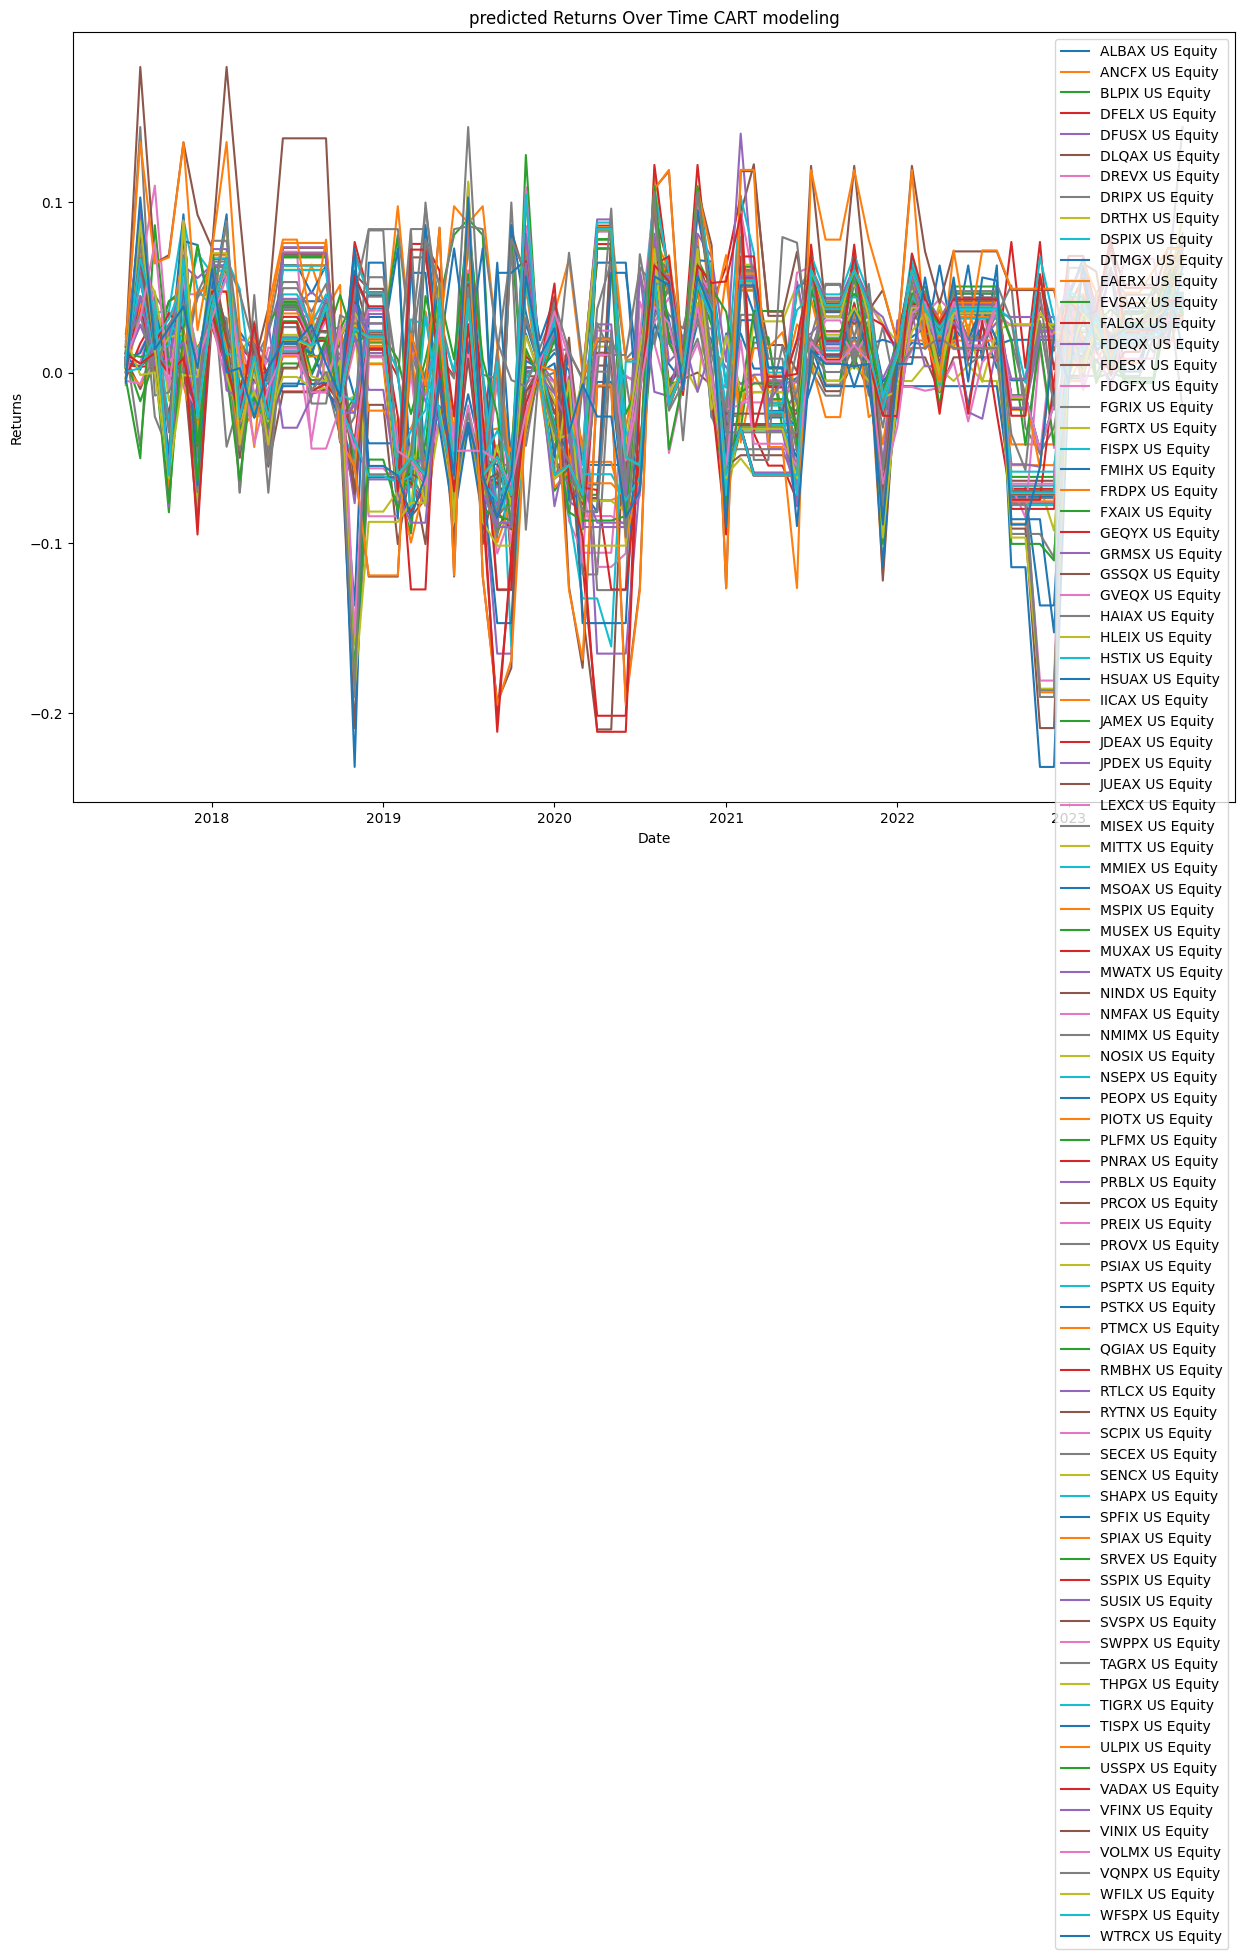

In [ ]:
# 1st cluster: based on the predicted returns
# Plotting the clusters for the predict returns

plt.figure(figsize = (15, 10))

#Plot the predicted returns
for column in df_predictedCART.columns:
  plt.plot(df_predictedCART.index, df_predictedCART[column], label = column)

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('predicted Returns Over Time CART modeling')
plt.legend()
plt.show()

* Hierarchical Clustering
Given the apparent complexity of the data, where many stocks are moving in similar patterns with subtle differences, hierarchical clustering would be a good initial approach. It can help you understand the nested relationships and provide insights into the natural groupings without having to pre-specify the number of clusters. The dendrogram produced will help in visualizing how the stocks are grouped at different levels of similarity.

try clustering using this method first

other 2 methods to clustering:

* Dynamic Time Warping (DTW)
If you observe that some stocks have similar patterns that are out of phase with each other, DTW could be beneficial. It's particularly useful for financial data where the pattern recognition is more important than the exact timing of returns. However, given the computational intensity, it might be practical to pre-filter the number of stocks or time points before applying DTW, possibly using another clustering method first to reduce the dataset.

* K-Means Clustering
K-Means clustering might be challenging with this dataset due to the high variability and overlap in the stock return patterns. If the returns are highly volatile and the patterns are not distinct, K-Means may struggle to find meaningful clusters without further preprocessing of the data (like dimensionality reduction or smoothing the time series).

In [ ]:
# hierarchical clustering
# package import
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# standardize data
scaler = StandardScaler()
scaledData = scaler.fit_transform(df_predictedCART.T)

# compute the distance matrix
linked = linkage(scaledData, 'ward')# Using the Ward variance minimization algorithm

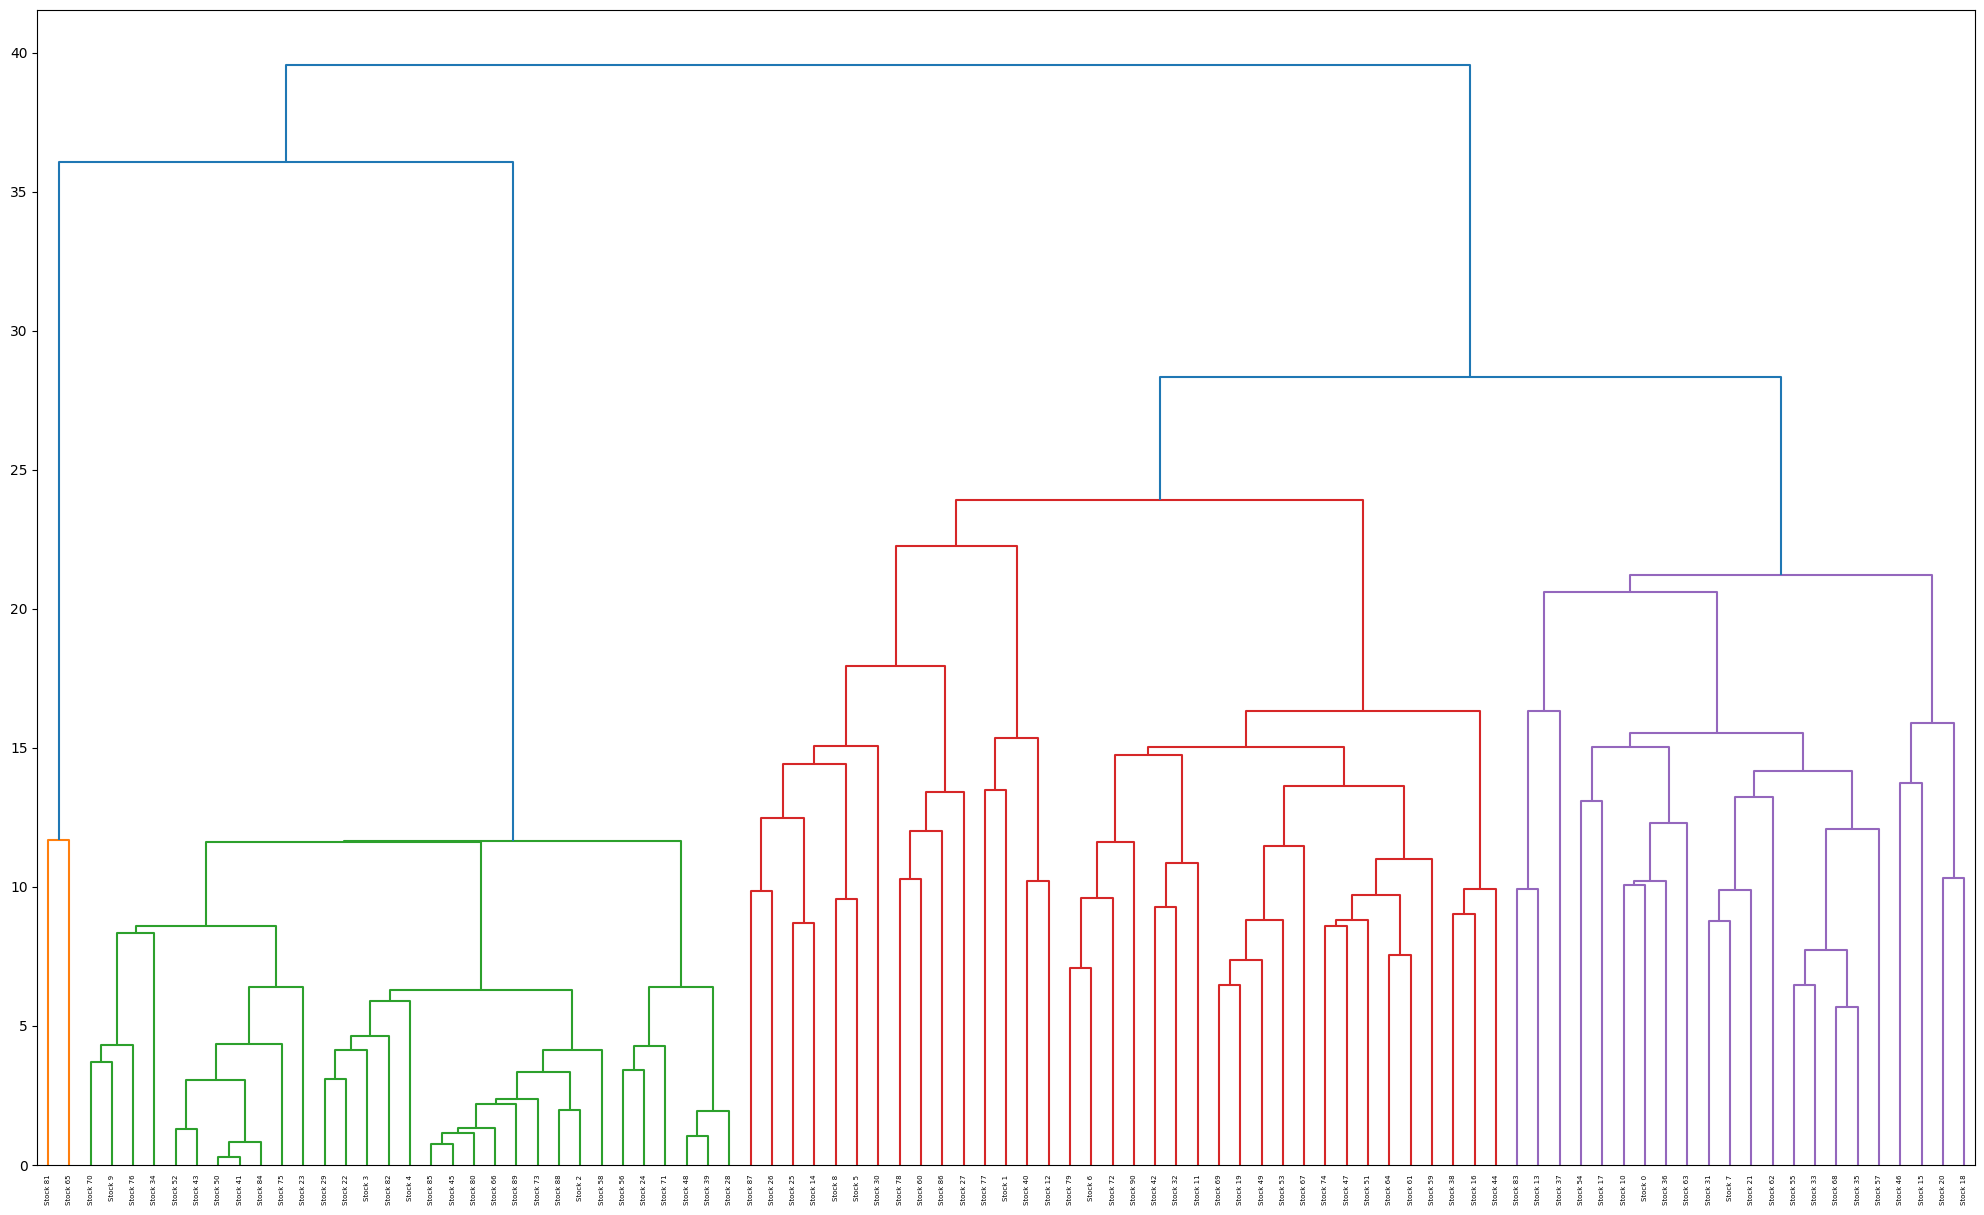

In [ ]:
# Step 4: Perform Hierarchical Clustering (done as part of Step 3)

# Step 5: Create a Dendrogram
plt.figure(figsize=(25, 15))
dendrogram(linked,
           orientation='top',
           labels=[f'Stock {i}' for i in range(len(linked) + 1)],  # Generate labels based on the linkage matrix
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

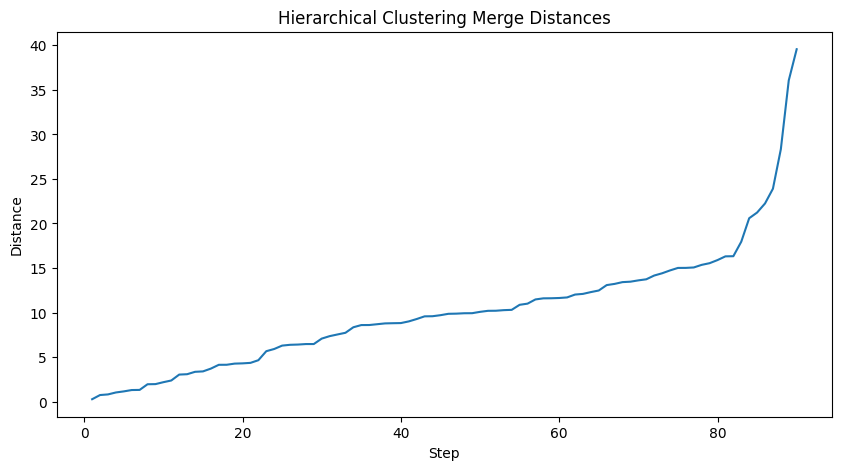

In [ ]:
# The Elbow Method
# In hierarchical clustering, an 'elbow' cannot be easily spotted in the same way as in k-means since the dendrogram is not a plot of the total within-cluster variation against the number of clusters.
# However, we can still look at the distribution of merge distances to visually determine a potential elbow.

# Extracting the distances between merges directly from the linkage matrix
distances = linked[:, 2]
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(distances) + 1), distances)
plt.title('Hierarchical Clustering Merge Distances')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.show()

# This plot might help us visually find a point where the increase in distance starts to slow down (an 'elbow').


In [ ]:
# Cluster Composition
# To decide on a cut-off based on cluster composition, we can try several cut-offs and see how the clusters form

# Let's pick an arbitrary cut-off distance to start, for example, the 70th percentile of the merge distances
cut_off_distance = np.percentile(distances, 70)
clusters = fcluster(linked, cut_off_distance, criterion='distance')

# Check how many unique clusters we have
num_clusters = len(np.unique(clusters))
print(f'Number of clusters at the 70th percentile cut-off: {num_clusters}')


Number of clusters at the 70th percentile cut-off: 28


In [ ]:
# For silhouette score, we need the cluster labels and the original data points
# Calculate silhouette score for the clustering at the chosen cut-off
silhouette_avg = silhouette_score(df_predicted.T, clusters)
print(f'The average silhouette score for the clusters at 70th percentile cut-off is: {silhouette_avg}')


The average silhouette score for the clusters at 70th percentile cut-off is: 0.25149744749069214


In [ ]:

# We may want to loop over several cut-off points to find the best average silhouette score
silhouette_scores = []
for p in range(20, 100, 5):
    cut_off_distance = np.percentile(distances, p)
    clusters = fcluster(linked.T, cut_off_distance, criterion='distance')
    silhouette_avg = silhouette_score(df_predicted.T, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f'For cut-off at the {p}th percentile (distance {cut_off_distance}), the average silhouette score is: {silhouette_avg}')



ValueError: ignored

In [ ]:
# Plot the silhouette scores over different cut-off percentiles
plt.figure(figsize=(10, 5))
plt.plot(range(20, 100, 5), silhouette_scores)
plt.title('Silhouette Scores for Different Cut-Off Percentiles')
plt.xlabel('Percentile of Distance for Cut-Off')
plt.ylabel('Average Silhouette Score')
plt.show()

# The peak of this plot suggests an optimal clustering cut-off in terms of silhouette score
# The corresponding percentile will be where we might set our cut-off for clustering
